In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import sklearn
from sklearn import tree
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Содержание
* 1. [Классическое машинное обучение](#Классическое-машинное-обучение)<br>
    * 1.1 [Экспертные системы (**Rule-based systems**)](#hhh)<br>
    * 1.2 [Классическое машинное обучение](#Классическое-машинное-обучение1)<br>
    * 1.3 [Глубокое машинное обучение](#Глубокое-машинное-обучение)<br>
    * 1.4 [Необходимость методов классического машинного обучения](#Необходимость-методов-классического-машинного-обучения)<br>
* 2. [Деревья решений](#Деревья-решений)<br>
    * 2.1 [Принцип работы дерева решений](#Принцип-работы-дерева-решений)<br>
    * 2.2 [Деревья решений (классификация)](#Деревья-решений-(классификация))<br>
    * 2.3 [Как построить дерево решений?](#Как-построить-дерево-решений?)<br>
        * 2.3.1 [Для бинарных признаков](#Для-бинарных-признаков)<br>
        * 2.3.2 [Для вещественных признаков](#Для-вещественных-признаков)<br>
        * 2.3.3 [Для категориальных признаков](#Для-категориальных-признаков)<br>
    * 2.4 [Деревья решений (Регрессия)](#Деревья-решений-(Регрессия))<br>
    * 2.5 [Деревья решений и работа с пропущенными значениями](#Деревья-решений-и-работа-с-пропущенными-значениями)<br>
    * 2.6 [Почему деревья - очень мощный метод?](#Почему-деревья---очень-мощный-метод?)<br>
    * 2.7 [Неустойчивость деревьев решений](#Неустойчивость-деревьев-решений)<br>
    * 2.8 [Переобучение деревьев](#Переобучение-деревьев)<br>
* 3. [Bias-variance tradeoff](#Bias-variance-tradeoff)<br>
    * 3.1 [Bias](#Bias)<br>
    * 3.2 [Variance](#Variance)<br>
    * 3.3 [Irreducible error](#Irreducible-error)<br>
    * 3.4 [Bias vs variance](#Bias-vs-variance)<br>
    * 3.5 [Применительно к деревьям](#Применительно-к-деревьям)<br>
* 4. [Бутстрэп](#Бутстрэп)<br>
    * 4.1 [Корреляция и построение доверительного интервала для нее](#Корреляция-и-построение-доверительного-интервала-для-нее)<br>
        * 4.1.1 [Пример 1](#Пример-1)<br>
        * 4.1.2 [Пример 2](#Пример-2)<br>
    * 4.2 [Построение доверительного интервала для качества метрики](#Построение-доверительного-интервала-для-качества-метрики)<br>
        * 4.2.1 [Пример 1 (искусственный)](#Пример-1-(искусственный))<br>
        * 4.2.2 [Пример 2 (классифицируем людей с больным сердцем и нет)](#Пример-2-(классифицируем-людей-с-больным-сердцем-и-нет))<br>
* 5. [Ансамбли](#Ансамбли)<br>
    * 5.1 [Error coorrection codes](#Error-coorrection-codes)<br>
    * 5.2 [Постановка задачи](#Постановка-задачи)<br>
    * 5.3 [Простое голосование](#Простое-голосование)<br>
        * 5.3.1 [Эксперимент: зависимость качества ансамбля от качество индивидуального предсказателя и от числа предсказателей](#Эксперимент:-зависимость-качества-ансамбля-от-качество-индивидуального-предсказателя-и-от-числа-предсказателей)<br>
        * 5.3.2 [Эксперимент: коррелированность моделей](#Эксперимент:-коррелированность-моделей)<br>
    * 5.4 [Bagging  = Bootstrap aggregation](#Bagging--=-Bootstrap-aggregation)<br>
        * 5.4.1 [Пишем свой bagging](#Пишем-свой-bagging)<br>
        * 5.4.2 [Эксперимент1:  Классифицируем людей с больным сердцем и нет](#Эксперимент1:--Классифицируем-людей-с-больным-сердцем-и-нет)<br>
        * 5.4.3 [Эксперимент2:  Сравним разделяющие плоскости дерева решений и бэггинга на деревьях решений](#Эксперимент2:--Сравним-разделяющие-плоскости-дерева-решений-и-бэггинга-на-деревьях-решений)<br>
    * 5.5 [Метод случайных подпространств (RSM, random subspace method)](#Метод-случайных-подпространств-(RSM,-random-subspace-method))<br>
        * 5.5.1 [Пишем свой RSM](#Пишем-свой-RSM)<br>
        * 5.5.2 [Эксперимент1: Классифицируем людей с больным сердцем и нет](#Эксперимент1:-Классифицируем-людей-с-больным-сердцем-и-нет)<br>
    * 5.6 [Комбинация RSM и Bagging](#Комбинация-RSM-и-Bagging)<br>
    * 5.7 [Почему для одних классов моделей работает, а для других - нет](#Почему-для-одних-классов-моделей-работает,-а-для-других---нет)<br>
    * 5.8 [Случайный лес](#Случайный-лес)<br>
        * 5.8.1 [Зависимость качества случайного леса от числа деревьев](#Зависимость-качества-случайного-леса-от-числа-деревьев)<br>
        * 5.8.2 [Зависимость качества случайного леса от глубины дерева](#Зависимость-качества-случайного-леса-от-глубины-дерева)<br>
        * 5.8.3 [Минимальное число объектов в листе.](#Минимальное-число-объектов-в-листе.)<br>
        * 5.8.4 [Переобучается ли случайный лес?](#Переобучается-ли-случайный-лес?)<br>
        * 5.8.5 [Случайный лес и variance](#Случайный-лес-и-variance)<br>
    * 5.9 [Взвешенное голосование](#Взвешенное-голосование)<br>
    * 5.10 [Boosting](#Boosting)<br>
    * 5.11 [AdaBoost (Freund & Schapire, 1996)](#AdaBoost-(Freund-&-Schapire,-1996))<br>
        * 5.11.1 [Переобучается ли AdaBoost?](#Переобучается-ли-AdaBoost?)<br>
        * 5.11.2 [Применимость AdaBoost](#Применимость-AdaBoost)<br>
    * 5.12 [Gradient boosting (градиентный бустинг)](#Gradient-boosting-(градиентный-бустинг))<br>
        * 5.12.1 [Переобучение](#Переобучение)<br>
        * 5.12.2 [Shrinkage (learning rate)](#Shrinkage-(learning-rate))<br>
        * 5.12.3 [Число деревьев в ансамбле](#Число-деревьев-в-ансамбле)<br>
        * 5.12.4 [Глубина деревьев в градиентном бустинге](#Глубина-деревьев-в-градиентном-бустинге)<br>
        * 5.12.5 [Минимальное число объектов в листе](#Минимальное-число-объектов-в-листе)<br>
        * 5.12.6 [Subsampling-and-max_features and max_features](#Subsampling-and-max_features)<br>
        * 5.12.7 [Понижение learning rate](#Понижение-learning-rate)<br>
    * 5.13 [Модификации градиентного бустинга](#Модификации-градиентного-бустинга)<br>
        * 5.13.1 [XGBoost](#XGBoost)<br>
        * 5.13.2 [min_child_weight](#min_child_weight)<br>
        * 5.13.3 [LightGBM](#LightGBM)<br>
        * 5.13.4 [Максимальное число листьев в дереве](#Максимальное-число-листьев-в-дереве)<br>
        * 5.13.5 [CatBoost-(Categorical-Boosting) (Categorical Boosting)](#CatBoost-(Categorical-Boosting))<br>
        * 5.13.6 [Про другие реализации случайного леса](#Про-другие-реализации-случайного-леса)<br>
        * 5.13.7 [Про подбор параметров модифицированных бустингов](#Важно,-про-подбор-параметров-модифицированных-бустингов)<br>
    * 5.14 [Смесь экспертов](#Смесь-экспертов)<br>
        * 5.14.1 [Blending (Блендинг)](#Blending-(Блендинг))<br>
        * 5.14.2 [Стэкинг](#Стэкинг)<br>
        * 5.14.3 [Стэкинг vs блендинг](#Стэкинг-vs-блендинг)<br>
* 6. [Нейронные сети пытаются в табличные данные](#Нейронные-сети-пытаются-в-табличные-данные)<br>
* 7. [Ссылки на материалы для самостоятельного изучения](#Ссылки-на-материалы-для-самостоятельного-изучения)<br>
    * 7.1 [Общие источники](#Общие-источники)<br>
    * 7.2 [Про деревья решений](#Про-деревья-решений)<br>
    * 7.3 [Про ансамбли](#Про-ансамбли)<br>
    * 7.4 [XGBoost](#XGBoost1)<br>
    * 7.5 [CatBoost](#CatBoost)<br>
    * 7.6 [LightGBM](#LightGBM1)<br>
    * 7.7 [Дисбаланс классоов](#Дисбаланс-классоов)<br>
    * 7.8 [Нейронные сети и бустинг](#Нейронные-сети-и-бустинг)<br>


# Классическое машинное обучение<a class="anchor" style="autocontent" id="Классическое-машинное-обучение"/>

Помимо нейронных сетей, обучение работе с которыми являются основной задачей курса, есть и другие подходы к проблеме создания систем, помогающих решать те или иные проблемы.

<img src="http://edunet.kea.su/repo/src/L03_Classic_ML/img/p/classic.png" alt="alttext" width=400/>

### Экспертные системы (**Rule-based systems**)<a class="anchor" style="autocontent" id="Экспертные-системы-(**Rule-based-systems**)"/><br>

Самым первым подходом к созданию системы, способной на основе входных данных делать какие-то выводы были так называемые **Rule-based systems**. В этих системах и за описании объекта — выделении значимых признаков — и за выработку правил, по которым система должна принимать то или иное решение отвечал человек. 

В современности такие системы до сих пор используются, например, в определителях растений. Такие опрелители представляют собой набор утверждений, например, "Растение имеет стержневую корневую систему", "Плод растения - костянка", на основе согласия/несогласия с которыми книга отсылает вас к другим утвреждениям или, в конце концов, к названию растения. 

Очевидно, что результативность такого подхода зависит от: 
1. наличия базовых знаний у того, кто определителем пользуется;
2. качества и охвата самого набора правил — к примеру, может ли этот набор правил справиться с ситуацией, когда какой-то признак отсутствует. В приведенном выше примере — растение плодоносит не весь год, потому не всегда можно четко ответить, какой у него плод.

Единственная выгода такой системы по сравнению с подходом "позови нормального специалиста" является то, что в большинстве случаев, требования к уменияем пользователя все же меньше.

Игрушечный пример такой схемы: 

<img src="http://edunet.kea.su/repo/src/L03_Classic_ML/img/p/expert_system.jpg" alt="alttext" width=500/>

### Классическое машинное обучение<a class="anchor" style="autocontent" id="Классическое-машинное-обучение1"/><br>

Классическое машинное обучение избавляет нас от необходимости вручную составлять какие-то правила. 

<img src="http://edunet.kea.su/repo/src/L03_Classic_ML/img/p/cl_ml.png" alt="alttext" width=700/>

В этом подходе от нас все равно требуется описание нашего объекта определенными признаками — мы должны получать это описание либо вручную, либо обрабатывая объект какими-то программами. Чтобы отличать такие признаки от признаков, которые автоматически выделяют нейронные сети, их называют **hand-designed features**. 

Но затем эти описанные объекты передаются алгоритму, который уже сам формирует набор правил, по которому он должен решать поставленную задачу. Уже разобранные вами линейная регрессия и SVM сами выбирают, какие признаки и с какими весами им учивать при принятии финального решения. В некоторых случаях (например, SVM), признаки могут дополнительно (явно или неявно) преобразовываться внутри самой модели и на их основе могут формироваться новые признаки. 

Но главное ограничение всегда остается - за описание объекта отвечает какой-то внешний источник и то, какие признаки в принципе подавать алгоритму на вход решает человек. А набор возможных преобразований признаков, как правило, строго фиксирован. 

И составление таких признаков требует от исследователя очень хорошего знания изучаемой темы, знания специфики работы используемого алгоритма — к примеру, подавать алгоритму на вход попарные произведения всех признаков, или алгоритм сам в ходе работы их явно или неявно получит. 

И очевидно, на больших объемах данных, когда в принципе можно использовать очень малоинформативные признаки (данных-то много, все коэффициенты при них оценим), которые и не придут исследователю в голову, классическое машинное обучение будет проигрывать. 




### Глубокое машинное обучение<a class="anchor" style="autocontent" id="Глубокое-машинное-обучение"/><br>

В глубоком же машинном обучение признаки за нас выделяет нейросеть.

<img src="http://edunet.kea.su/repo/src/L03_Classic_ML/img/p/dl.png" alt="alttext" width=700/>

Это позволяет нейросети самой решать, какие признаки для данных объектов и для данной задачи важны и итеративно выделять сначала простые признаки, а затем комбинировать их в более сложные. За счет этого в то время как качество подходов классического машинного обучения по мере увеличения размера обучающей выборки со временем выходит на плато, для нейросетей это плато наступает сильно позже или вообще не наступает.

<img src="http://edunet.kea.su/repo/src/L03_Classic_ML/img/p/scalability.png" alt="alttext" width=700/>

Потенциально такой подход позволяет почти не применять человеческую экспертизу при построении модели под задачу. Однако в реальности, человеческая экспертиза теперь переходит на уровень подбора архитектуры нейросети. 

### Необходимость методов классического машинного обучения<a class="anchor" style="autocontent" id="Необходимость-методов-классического-машинного-обучения"/><br>

Казалось бы, если все так классно, то зачем нам вообще знать и использовать стандартные методы машинного обучения? 

Оказывается, что существует целый спектр задач, в которых либо объем данных недостаточен для использования нейронных сетей, либо сама структура данных не предполагает каких-либо внутренних повторяющихся паттернов, на которые и заточены нейронные сети. 


В ситуации, когда у вас есть просто таблица с признаками каждого объекта (**данные табулярного формата**), каждый признак не особо связан как-то с другими и взаиморасположение признаков в таблице не играет никакой роли:
1. По крайней мере в начале вам придется использовать полносвясзные слои, что очень сильно увеличивает число параметров нейросети
2. Полученные нейросети как правило не сильно превосходят методы классического обучения, а могут и вести себя хуже (из-за переобучения)

Кроме того, стоит учитывать, что часто для того, чтобы достигнуть качество top-of-the-art методов классического машинного обучения, необходимо долгое время подбирать архитектуры нейросети и настраивать ее параметры.

Время же получение решений при помощи классических методов часто исчисляется часами. Таким образом, даже в худшем случае, вы сможете оценить, насколько проблема хорошо решаема в принципе и получить хороший бейзлайн для сравнения. 

Помимо этого, методы машинного обучения дают более трактуемые предсказания - как правило, из них легче получить важность каждого отдельно взятого признака. 

Кроме того, в современных задачах часто используются комбинации нейронных сетей и алгоритмов классического машинного обучения. Например, можно нейронные сети в качестве генераторов признаков для методов классического обучения. 


# Деревья решений<a class="anchor" style="autocontent" id="Деревья-решений"/><br>

Деревья решений — это одна из первых моделей машинного обучения, которая была известна человеку. Изначально их строили без специальных алгоритмов, а прочто вручную. 

Когда требовалось принять решение по проблеме, для которой построено дерево, человек брал и проходился по этому дереву.

<img src ="http://edunet.kea.su/repo/src/L03_Classic_ML/img/L03_Classic_ML-1.jpg" width="700">

Как оно устроено? В каждом узле есть какой-то вопрос. Например, нормальное ли у человека слезоотделение, есть ли него астигматизм и так далее. И, отвечая на каждый из этих вопросов, мы подбираем человеку линзы.
Опять же, такое дерево решений можно построить без использования моделей машинного обучения, просто на основании опыта многих врачей.
По сути это как раз те самые экспертные системы

Понятно, что вручную такие деревья строить тяжело, для большого объема данных их руками и не построишь. 
Также возникает вопрос: зачем вообще нужна такая старая модель? 

Оказывается, что эти модели могут быть неожиданно эффективны и их можно автоматически строить с помощью специально разработанных алгоритмов. Причем, это можно делать достаточно быстро даже на больших объемах данных.  

<img src ="http://edunet.kea.su/repo/src/L03_Classic_ML/img/L03_Classic_ML-2.jpg" width="700">

По словам Энтони Голдблум, одного из наиболее известных участников kaggle, на соревнованиях побеждают hand-crafted алгоритмы и нейронные сети. Под hand-crafted Энтони понимает алгоритмы, основанные на деревьях решений. 

<img src ="http://edunet.kea.su/repo/src/L03_Classic_ML/img/L03_Classic_ML-3.jpg" width="600">

В принципе, до недавнего времени деревья решений побеждали практически везде — в рекомендательных системах, в задачах ранжирования, задачах релевантной выдачи для поиска, на предсказаниях, какую рекламу выберет пользователь и так далее.  В любой задаче, где нет какой-то локальный связанности - которая есть в изображениях, текстах и других областях, захваченных нейронными сетями.


## Принцип работы дерева решений<a class="anchor" style="autocontent" id="Принцип-работы-дерева-решений"/><br>
<img src ="http://edunet.kea.su/repo/src/L03_Classic_ML/img/L03_Classic_ML-4.jpg" width="700">

Принцип работы дерева решений можно проиллюстрировать на данном примере. Есть 2 признака, в данном случае вещественных. Для каждой точки мы создаем вопрос: 1 признак — больше 0.7 или меньше? Если больше 0.7, то это красная точка. Если меньше 0.7, то идем во второй внутренний узел T2 и спрашиваем: x2 меньше 0.5 или больше? Если меньше 0.5, то точка будет красная, в другом случае — синяя. 

<img src ="http://edunet.kea.su/repo/src/L03_Classic_ML/img/L03_Classic_ML-5.png" width="550">

Фактически, дерево решений бьет пространство признаков с помощью плоскостей на области, и в каждой из этих областей предсказывается какая-то константная величина.

## Деревья решений (классификация)<a class="anchor" style="autocontent" id="Деревья-решений-(классификация)"/><br>
Деревья решений как правило используются при решении 2-х типов задач — классификации и регрессии.
Первая — классификация. Например, предсказание типа линз.


<img src ="http://edunet.kea.su/repo/src/L03_Classic_ML/img/L03_Classic_ML-6.png" width="700">

Особенно актуальны модели, которые могут предсказывать вероятности классов. Жесткие предсказания — не самый удачный вариант, лучше оставить человеку возможность выбирать. К примеру, лекарства всегда действует с какой-то вероятностью, потому что невозможно учесть все факторы. Например, мы говорим, что человеку подойдут мягкие линзы с вероятностью 90%. Это лучше, чем 

Как нам поступить в этом случае? 

<img src ="http://edunet.kea.su/repo/src/L03_Classic_ML/img/L03_Classic_ML-7.png" width="700">

На самом деле в деревьях решений в каждом листе находятся разные объекты, то есть каждому листу могут соответствовать объекты разных классов, а предсказать нужно один. Как предсказать вероятность этого класса? Нужно понять, что дерево решений выделило область пространства и пытается эту область описать эффективно (с точки зрения решения текущей задачи).

У нас есть небольшая выборка, и мы хотим оценить вероятность. Как это сделать: число представителей данного класса делим на общее число объектов в клетке.  

Это согласуется с тем, как мы делаем в статистике. При построении дерева мы видим только обучающую выборку. А хотим делать выводы о генеральной совокупности. Конкретно здесь мы оцениваем, какая доля из объектов, попадающих в данный узел, принадлежит нужному классу. 

Оценка доли объектов классов в популяции - здесь 
$$\hat{p} = \dfrac n N$$

Эта оценка имеет дисперсию - величину, в некотором роде характеризующую то, насколько сильно мы можем ошибиться с оценкой доли. 

$$D(\hat{p}) = \dfrac {p \cdot (1 - p)} {N}$$

Это сразу дает нам одну важную интуицию - желательно, чтобы в листе дерева было не очень мало объектов. Чем объектов меньше - тем больше дисперсия и больше возможная ошибка. 

## Как построить дерево решений?<a class="anchor" style="autocontent" id="Как-построить-дерево-решений?"/><br>

### Для бинарных признаков<a class="anchor" style="autocontent" id="Для-бинарных-признаков"/><br>

<img src ="http://edunet.kea.su/repo/src/L03_Classic_ML/img/L03_Classic_ML-9.png" width="700">

Допустим, у нас есть табличка, в ней пока нет никаких вещественных признаков. 
Также есть много данных. Мы хотим построить дерево решений по этой табличке. 
Предсказывать будем, есть у человека инфаркт или нет. Возьмем в качестве признака боль в груди. В 1-ом и во 2-ом листе получается разное распределение людей. В левом листе инфаркт более вероятен, в правом — менее вероятен. Другим признаком может быть “как хорошо циркулирует кровь”, в таком случае тоже получится неплохое разделение. 3 признак — “есть ли атеросклероз”.

В результате все при разбиении выглядят хорошо, кроме последнего, но вдруг мы что-то не учитываем.

Что с этим делать? Как из этих 3 разделений что-то выбрать? Логично выбрать такое разбиение, дает нам "хорошие" узлы - те, в которых преимуущественно сосредоточенны объекты одного класса

Одна из используемых метрик называется Gini. Она считается по следующей формуле:

$$Gini = 1 - \sum_ip_i^2$$

Фактически, она показывает, какова вероятность того, что два объекта, попавшие в один узел, принадлежат разным классам. Соответственно, чем она ниже, тем лучше получившийся узел

<img src ="http://edunet.kea.su/repo/src/L03_Classic_ML/img/L03_Classic_ML-10.png" width="700">

Такую метрику можно посчитать для каждого узла. Дальше можно посчитать метрику для узла, который мы били. Дальше посчитать, насколько стал лучше результат в зависимости от используемого признака.

<img src ="http://edunet.kea.su/repo/src/L03_Classic_ML/img/L03_Classic_ML-11.png" width="600">

<img src ="http://edunet.kea.su/repo/src/L03_Classic_ML/img/L03_Classic_ML-12.png" width="700">

Оказывается, что наибольший impurity_decrease в признаке “боль в груди”. Значит, мы возьмем “боль в груди”, как признак, на основании которого продолжим строить дерево. 

Теперь каждое из этих листьев, которые у нас получились, мы можем разбить. Имеет ли смысл их бить, используя тот же признак (“боль в груди”)? Очевидно, нет, потому что мы по нему уже все разделили. Но можно использовать 2 других признака. 

<img src ="http://edunet.kea.su/repo/src/L03_Classic_ML/img/L03_Classic_ML-13.png" width="700">

Каждый раз мы будем выбирать новые признаки. В одном листе один признак лучше бьет его на 2, в другом — другой. В результате получим итоговое дерево, где все признаки используются по одному разу. 

Можно ли остановиться раньше? В принципе да. Например, когда у нас получатся листья, в которых есть объекты только 1 класса. В этом случае не имеет смысла использовать другие разбиения. Либо может сложиться ситуация, когда разбиение по признаку, которое мы дополнительно взяли, ситуацию никак не улучшает, и дерево предсказывает настолько же плохо, как если бы мы его не использовали. Но это редкая ситуация. 

### Для вещественных признаков<a class="anchor" style="autocontent" id="Для-вещественных-признаков"/><br>

<img src ="http://edunet.kea.su/repo/src/L03_Classic_ML/img/L03_Classic_ML-14.png" width="700">

<img src ="http://edunet.kea.su/repo/src/L03_Classic_ML/img/L03_Classic_ML-15.png" width="700">


Допустим, у нас есть вещественные примеры (например, измерения). Что делать с ними? Берем сетевой угол переменной, для каждого порога делаем разбиение (как делали ранее для бинарного признака) и считаем impurity_decrease. Из всех этих разбиений можно выбрать то, которое дает наилучший результат.

Дальше мы среди всех вещественных признаков можем выбрать тот, у которого наилучшее разбиение дает наилучший impurity. 

### Для категориальных признаков<a class="anchor" style="autocontent" id="Для-категориальных-признаков"/><br>
Мы разобрали бинарные и вещественные признаки.

Также существуют категориальные признаки — это когда признаки принимают несколько значений, но при этом мы не можем их как-то упорядочить. Например, цвет, порода собаки, город и так далее. 
Нельзя сказать, что зеленый больше красного.
Но с такими признаками тоже надо как-то работать. 

Нейронные сети работают с категориальными признаками плохо, обычно необходимо специальным образом предобработать данные, чтобы нейронная сеть смогла с ними работать. Напрямую закодировать 

Если у нас есть категориальной признак, у которого N возможных значений (например, N цветов), то есть мы можем разбить наши объекты на 2 группы 2^N возможных способов. То есть красный и синий идут в одну сторону, а белый и желтый в другую. Таким образом мы можем выбрать, идет какой-то цвет в определенный лист или нет. Отсюда получается  порядка 2^N возможных разбиенией. Перебирать все возможные разбиения - долго и для категориальных признаков с большим числом возможных категорий неприменимо. 

<img src ="http://edunet.kea.su/repo/src/L03_Classic_ML/img/L03_Classic_ML-19.png" >

Но мы не предсказываем категориальный признак, а используем категориальный признак для предсказания чего-то. Можем взять и посчитать для каждой категории категориального признака среднее значение целевой переменной. Дальше отсортировать эти категории по полученному среднему значению. Окажется, что оптимальное разбиение будет одним из тех, которые мы получим в данном случае. Все остальные разбиения гарантированно не являются оптимальными. Получается, что для категориальных переменных мы легко находим правильный способ разбиения.

## Деревья решений (Регрессия)<a class="anchor" style="autocontent" id="Деревья-решений-(Регрессия)"/><br>


<img src ="http://edunet.kea.su/repo/src/L03_Classic_ML/img/L03_Classic_ML-16.png" width="500">

Для решения задач регрессии дерево строится практически точно так же, но есть несколько нюансов. Во первых, в листе нужно предсказывать не класс, а какое-то значение. Тут опять возникает вопрос: в области пространства мы знаем какие-то объекты. Им соответствует какое-то значение. Как лучше всего одним числом охарактеризовать все эти объекты? 

<img src ="http://edunet.kea.su/repo/src/L03_Classic_ML/img/L03_Classic_ML-17.png" width="600">

Если мы вспомним статистику, у нас нет однозначного ответа. То есть мы можем для распределения всех этих y предсказывать наиболее частое значение, медиану, среднее значение. 
Обычно предсказывают среднее значение, потому что с ним легче всего работать и, опять же, среднее чаще всего используют в статистике

Опять же, фактически хотим оценить среднее всех объектов генеральной совокупности, попадающих в данный узел, используя объекты из тренировочной выборки, попавшие в данный узел

$$\overline{x} = \dfrac {\sum_i X_i} {n}$$

Опять же, у нашей оценки будет дисперсия, которая показывает, насколько сильно мы можем ошибаться по сравнению с реальным средним. 

$$D(\overline{x}) = \dfrac {\sigma^2} {n} $$

Опять же, полученная формула говорит нам о том, что желательно иметь в каждом листе достаточное число объектов, чтобы дисперсия оценки была меньше 

Теперь надо сформулировать критерий качества узла для регрессионного дерева. Что мы хотим? Мы хотим, чтобы значения в узле отличались как можно меньше. В этом случае наше среднее будет предсказывать значение для объекта, попавшего в узел, с меньшей ошибкой. В идеале, мы хотим, чтобы все значения были одинаковы.

Какую меру можно использовать? Для этого подумаем, а как мы в итоге обычно оцениваем качество регрессии? При помощи MSE. MSE на тренировочной выборке, если мы предсказываем ее среднее, будет таким:

$$\frac 1 n \sum (X_i - \overline{X})^2 = \dfrac {n} {n - 1} D(X)$$

То есть, фактически, нам надо минимизировать дисперсию выборки. Разбиние, которое лучше всех уменьшает дисперсию выборки - то, что нам нужно. Единственное - будем взвешивать дисперсии на размер узла. Иначе самыми выгодными будут разбиения, отправляющие в один из злов только один объект. Те из вас, кто помнит формулу объединения дисперсии двух выборок, могут найти в таком взвешивании и статистический смысл. 

<img src ="http://edunet.kea.su/repo/src/L03_Classic_ML/img/L03_Classic_ML-18.png" width="700">


## Деревья решений и работа с пропущенными значениями<a class="anchor" style="autocontent" id="Деревья-решений-и-работа-с-пропущенными-значениями"/><br>

<img src ="http://edunet.kea.su/repo/src/L03_Classic_ML/img/L03_Classic_ML-20.png" >


Очень сложно, в том числе и в нейронных сетях, бороться с пропущенными значениями. Если значение какого-то признака неизвестно, то любая непрерывная модель, в том числе и нейронные сети, будет без дополнительных ухищрений вести себя очень плохо. Потому что надо как-то объяснить модели, что значения какого-то признака нет. 

Это сложно сделать, поскольку с этим признаком должны производиться некие математические операции. И потому обычно отсутствующий признак нельзя оставить так как есть. Обычно его:
 1. на место пропущенных значений записать какие-то числа (заполнить пропущенные значения);
 2. либо удаляют все объекты с пропущенными значениями. 

Чаще всего в науке так сделать нельзя, потому что данные стоят очень дорого, и потому выбрасывают объекты только потому, что у них нет какого-либо признака, достаточно редко. 

Потому обычно прибегают к первому варианту. Как это можно сделать? Можно предположить, что данные не очень сложные, признаки не зависят друг от друга, и заполнить пропущенные значения средними значениями соответствющего признака. Например, если средний возраст людей 30 лет, то для людей, чей возраст неизвестен, будем писать это же значение. 

Но бывают случаи, когда этот способ (среднее, медиана или любая другая взятая величина, которую мы считаем по известным значениям признаков) не работает. 

Можно сделать иначе - накидываем дополнительные блоки / модели, которые будут предсказывать пропущенные значения. Если пропущено много признаков, то возникает много проблем, связанных с тем, что надо обучить много моделей: каждая из них совершает ошибки, в итоговым датасете получается много зашумленных данных, не факт, что модель вообще обучится. 
 
Третий вариант — использовать алгоритм, который умеет справляться с пропуском. Можно сделать нейросеть, которая будет устойчива к отсутствию какого-то признака. Один из таких алгоритмов — KNN. Можно брать ближайших соседей по известным признакам и на место неизвестного признака поставить среднее значение. Способ рабочий.

Деревья решений могут бороться с этой проблемой двумя способами. 
Первый — мы не можем сказать, что это значение какое-то особое для нейронных сетей. Засунуть None в нейросеть нельзя. Дереву можно сказать, что для какого-то значения признака нет, трактуя это как особое правило (выделим такие объекты в особую группу). Это действительно будет работать.


<img src ="http://edunet.kea.su/repo/src/L03_Classic_ML/img/L03_Classic_ML-21.png" width="700">

Второй вариант: если мы в этом узле разбивали объекты по данному признаку и для текущего объекта он неизвестен, то можно поискать среди нашей обучающей выборки признаки, которые дают разбиение, похожее на признак с неизвестным значением. Это не надо делать вручную, в некоторых пакетах это реализовано за вас. Это работающее решение, которое явно лучше, чем заполнение пропусков вручную. 

## Почему деревья - очень мощный метод?<a class="anchor" style="autocontent" id="Почему-деревья---очень-мощный-метод?"/><br>

<img src ="http://edunet.kea.su/repo/src/L03_Classic_ML/img/L03_Classic_ML-24.png" width="700">


У деревьев решений есть еще одно хорошее свойство. На первом занятии вы познакомились с замечательный теоремой об универсальном аппроксиматоре. Ее суть в том, что если взять нейросеть, и у нее будет 2 скрытых слоя, то она сможет аппроксимировать в любую заданную гладкую функцию. 

Для деревьев решений есть аналогичная теорема, говорящая о том, что дерево может аппроксимировать в любую заданную кусочно-постоянную функцию. 

Дерево решений, в отличие от нейронной сети, может адаптироваться к выборке любого размера, любому количеству признаков. Для нейронной сети эта теорема предполагает, что можно бесконечно увеличивать скрытые слои. В реальной жизни так не делают. 

В случае же с деревьями решений лист разбивается еще на 2 части. Это можно делать бесконечно до тех пор, пока в каждом листе не окажется по одному объекту. Это приведет к сильному переобучению, но в принципе, если бы у нас была вся генеральная совокупность, мы бы выучили ее гораздо легче деревом решений, чем нейронной сетью.

## Неустойчивость деревьев решений<a class="anchor" style="autocontent" id="Неустойчивость-деревьев-решений"/><br>

<img src ="http://edunet.kea.su/repo/src/L03_Classic_ML/img/p/dt_instability.png" width="700">

Деревья решений не используется в чистом виде, потому что они неустойчивы. Если у нас есть данные, и мы выкинем из данных 2 объекта, то дерево решений может очень сильно поменяться. Красивого дерева, как на примере в самом начале, у нас не получится. Будет мешанина, которая может в любой момент поменяться, если мы выкинем пару объектов.  



Продемонстриуем неустойчивость решения, получаемого при помощи деревьев решений на примере датасета iris ([ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)). 

Ирисы Фишера состоят из данных о 150 экземплярах ириса, по 50 экземпляров из трёх видов — Ирис щетинистый (Iris setosa), Ирис виргинский (Iris virginica) и Ирис разноцветный (Iris versicolor)

Для каждого экземпляра измерялись четыре характеристики (в сантиметрах):

1. Длина наружной доли околоцветника (англ. sepal length);
2. Ширина наружной доли околоцветника (англ. sepal width);
3. Длина внутренней доли околоцветника (англ. petal length);
4. Ширина внутренней доли околоцветника (англ. petal width).

Будем учиться отделять Ирис виргинаский (versicolor) от остальных видов. 

In [38]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target != 1 # 0 for setosa, 1 - versicolor, 2 - virginica

Сделаем два разных разбиения на обучение и тест. И посмотрим, будут ли отличаться деревья, построенные для данных разбиений. 

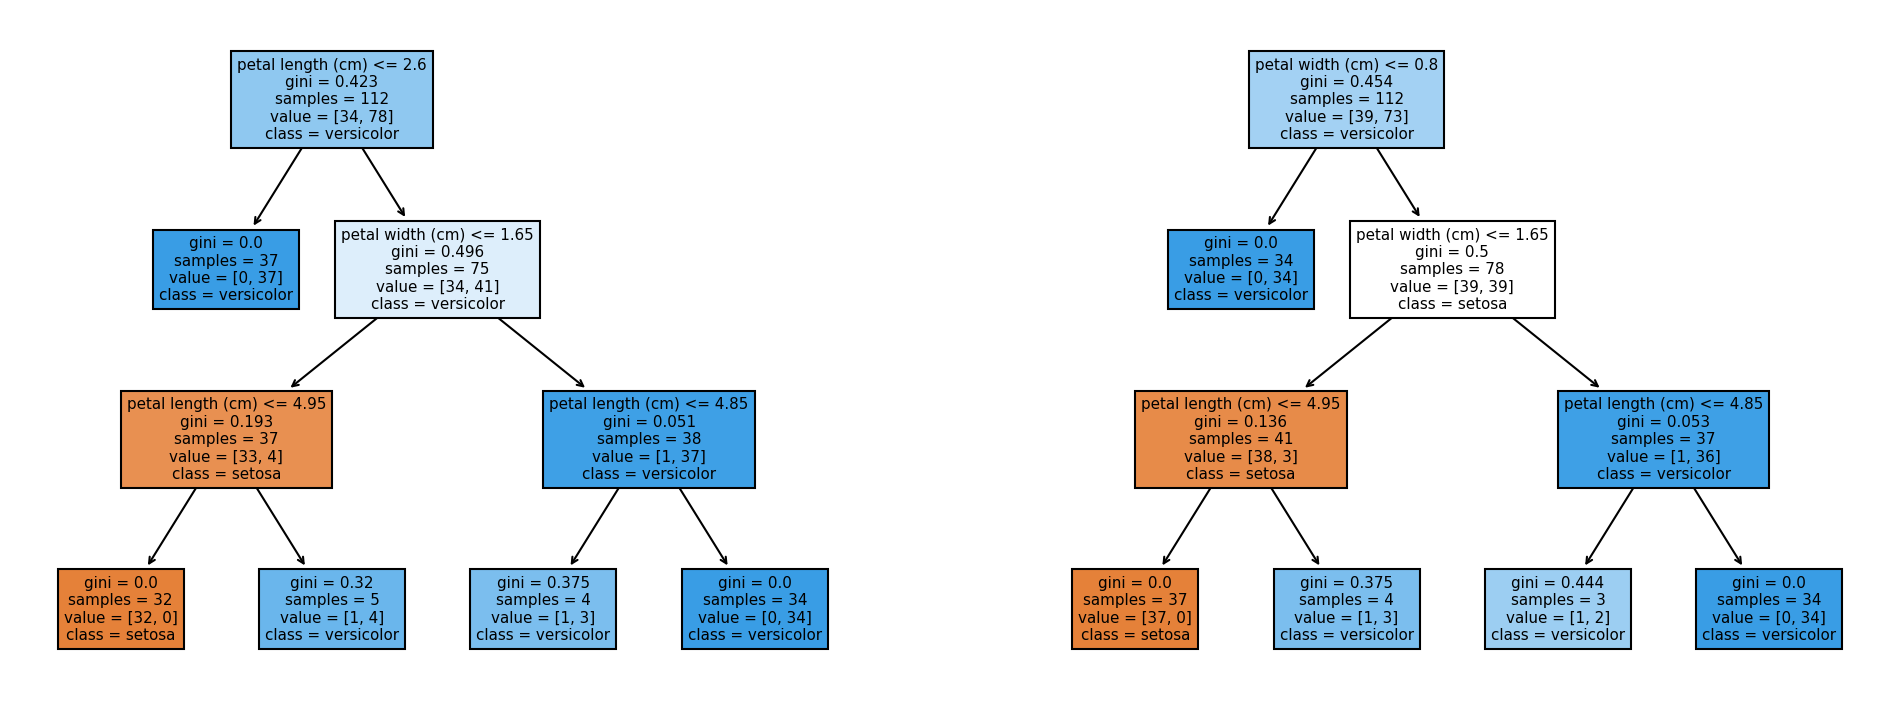

In [40]:
# первый набор точек 
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(df[data.feature_names], df['target'], random_state=1)
clf1 = DecisionTreeClassifier(max_depth = 3)
clf1.fit(X_train1, Y_train1)

# второй набор точек 
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(df[data.feature_names], df['target'], random_state=2)
clf2 = DecisionTreeClassifier(max_depth = 3)
clf2.fit(X_train2, Y_train2)


fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16,6), dpi=150)
tree.plot_tree(clf1,
               feature_names = fn, 
               class_names=cn,
               filled = True, ax=axes[0])
tree.plot_tree(clf2,
               feature_names = fn, 
               class_names=cn,
               filled = True, ax=axes[1])
plt.show()

Видим, что даже деревья максимальной глубины 3 уже не совпадают между собой. Конечно, у нас маленький датасет - как правило, чем датасет больше, чем устойчивее будет получаться дерево на первых уроввнях. Но часто и деревья используют куда большей глубины. 

Если использовать деревья бОльшей глубины, то и структура деревьев (то, как они выглядят даже если не обращать внимания на конкретные признаки в узлах), будет отличаться

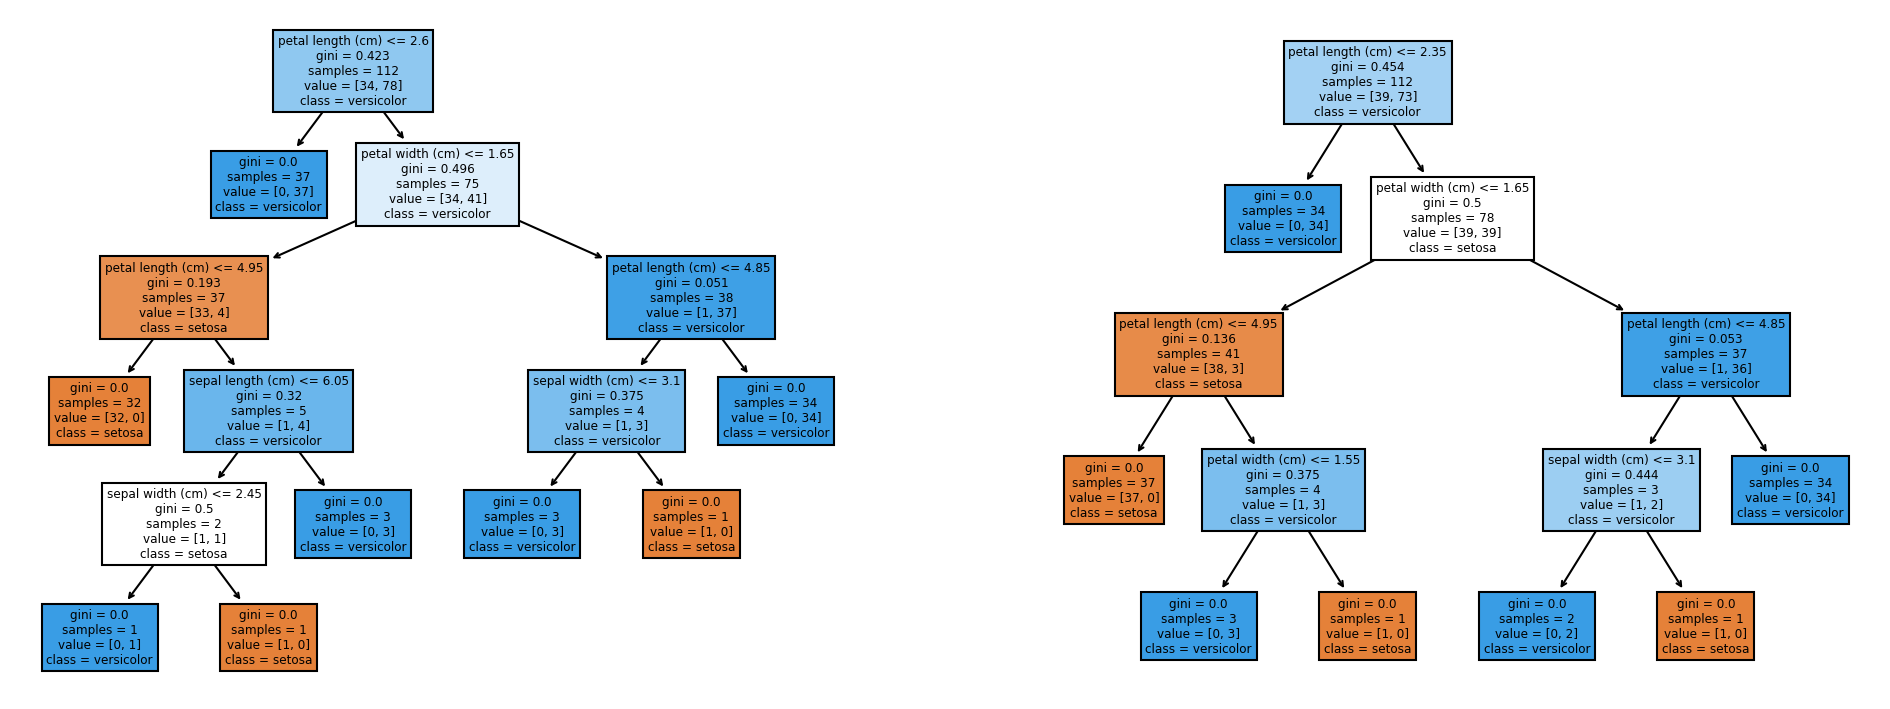

In [41]:
# первый набор точек 
clf1 = DecisionTreeClassifier(max_depth = 10, random_state = 42)
clf1.fit(X_train1, Y_train1)

# второй набор точек 
clf2 = DecisionTreeClassifier(max_depth = 10, random_state = 42)
clf2.fit(X_train2, Y_train2)


fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16,6), dpi=150)
tree.plot_tree(clf1,
               feature_names = fn, 
               class_names=cn,
               filled = True, ax=axes[0])
tree.plot_tree(clf2,
               feature_names = fn, 
               class_names=cn,
               filled = True, ax=axes[1])
plt.show()

## Переобучение деревьев<a class="anchor" style="autocontent" id="Переобучение-деревьев"/><br>

Если алгоритм при небольшом изменении признаков сильно меняет свое решение, это, как правило, указывает на переобучение. Алгоритм сильно реагируют на любой шум в данных - доверять его решениям опасно. 

Покажем это на синтетическом датасете 

In [17]:
#handson-ml
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    from matplotlib.colors import ListedColormap
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

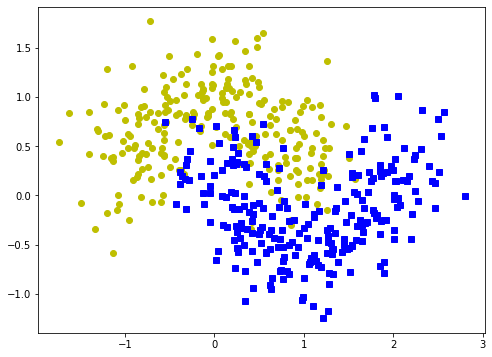

In [28]:
X, y = sklearn.datasets.make_moons(n_samples=500, noise=0.30, random_state = 42)

plt.figure(figsize=(8, 6))
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.show()

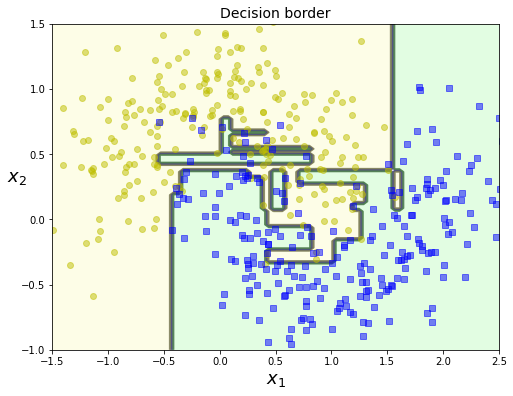

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

plt.figure(figsize=(8,6))
clf = DecisionTreeClassifier(max_depth = 20, random_state = 42)
clf.fit(X_train, y_train)
plot_decision_boundary(clf, X, y)
plt.title("Decision border", fontsize=14)
plt.show()

В областях, покрашенных в желтый, модель будет класссифицироать точки как точки из 0 класса. В зеленый - как точки из 1го класса. 

Обратите внимание на странные, рваные области на рисунке. В этих областях из-за шума, присутствующего в данных, оказались точки  неправильного класса. Дерево не смогло их распознать как неправильные и просто выучило очевидно неверные правила. 

Что произойдет, если мы возьмем точки из того же датасета, но другие? 

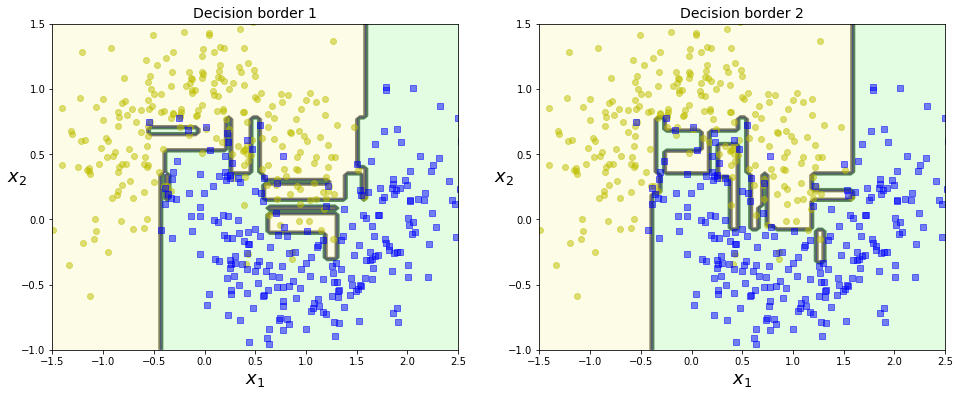

In [46]:
# первый набор точек 
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state = 1)
clf1 = DecisionTreeClassifier(max_depth = 20, random_state = 42) 
clf1.fit(X_train1, y_train1)

# второй набор точек
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, random_state = 2)
clf2 = DecisionTreeClassifier(max_depth = 20, random_state = 42) 
clf2.fit(X_train2, y_train2)

plt.figure(figsize=(16,6))
plt.subplot(121)
plot_decision_boundary(clf1, X, y)
plt.title("Decision border 1", fontsize=14)
plt.subplot(122)
plot_decision_boundary(clf2, X, y)
plt.title("Decision border 2", fontsize=14)
plt.show()

Границы решений поменялись, причем сильно. Исчезли одни "рваные" границы и появились другие. Опять же, наше дерево неустойчиво, из-за малейшего шума в данных оно может поменять свое предсказания. Оно переобучается на шум в данных. 

Говорят, что у нашего дерева высокий **variance**. 

Можно ли что-то поправить? Ну, у нас в настройках максимальная глубина дерева поставлена равной 20. Это очевидно много. Давайте сделаем дерево глубины 1

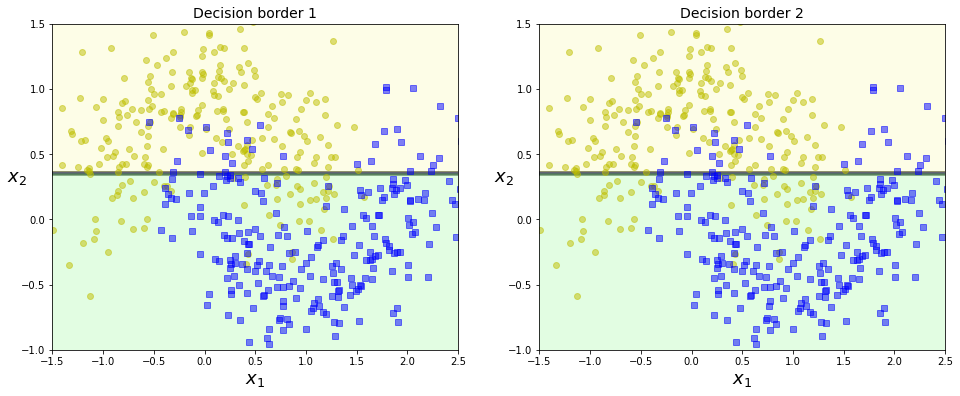

In [49]:
# первый набор точек 
clf1 = DecisionTreeClassifier(max_depth = 1, random_state = 42)
clf1.fit(X_train1, y_train1)

# второй набор точек 
clf2 = DecisionTreeClassifier(max_depth = 1, random_state = 42)
clf2.fit(X_train2, y_train2)

plt.figure(figsize=(16,6))
plt.subplot(121)
plot_decision_boundary(clf1, X, y)
plt.title("Decision border 1", fontsize=14)
plt.subplot(122)
plot_decision_boundary(clf2, X, y)
plt.title("Decision border 2", fontsize=14)
plt.show()

Или глубины 2

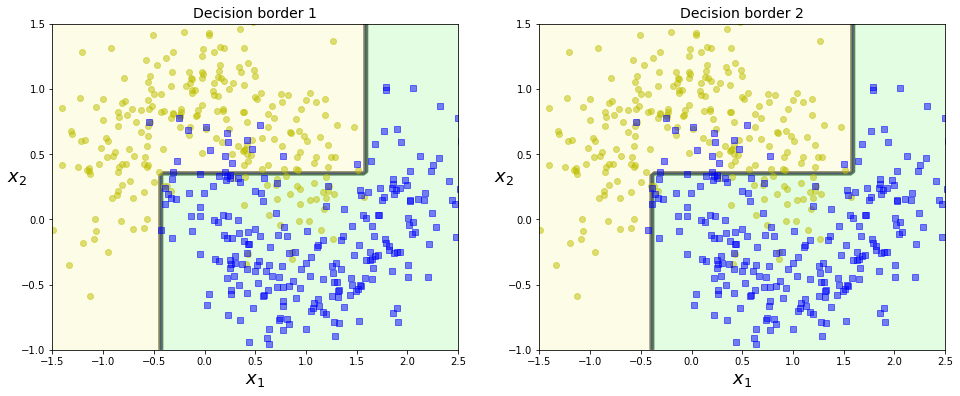

In [50]:
# первый набор точек 
clf1 = DecisionTreeClassifier(max_depth = 2, random_state = 42)
clf1.fit(X_train1, y_train1)

# первый набор точек 
clf2 = DecisionTreeClassifier(max_depth = 2, random_state = 42)
clf2.fit(X_train2, y_train2)

plt.figure(figsize=(16,6))
plt.subplot(121)
plot_decision_boundary(clf1, X, y)
plt.title("Decision border 1", fontsize=14)
plt.subplot(122)
plot_decision_boundary(clf2, X, y)
plt.title("Decision border 2", fontsize=14)
plt.show()

Теперь полученные границы решений (почти) совпадают. Но что мы видим? Наше дерево абсолютно не в состоянии(в обоих случаях) уловить закономерность в исходных данных. Если мы отложим только тренировочный датасет, то увидим следующее 

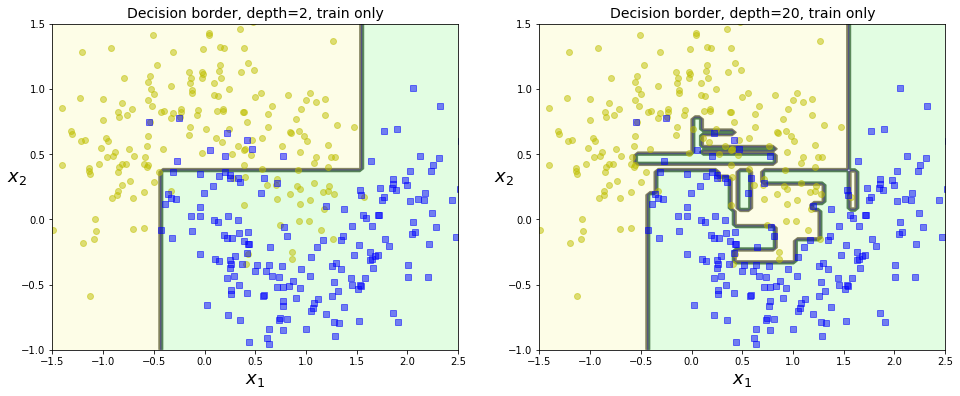

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

clf1 = DecisionTreeClassifier(max_depth = 2, random_state = 42)
clf1.fit(X_train, y_train)

clf2 = DecisionTreeClassifier(max_depth = 20, random_state = 42)
clf2.fit(X_train, y_train)

plt.figure(figsize=(16,6))
plt.subplot(121)
plot_decision_boundary(clf1, X_train, y_train)
plt.title("Decision border, depth=2, train only", fontsize=14)
plt.subplot(122)
plot_decision_boundary(clf2, X_train, y_train)
plt.title("Decision border, depth=20, train only", fontsize=14)
plt.show()

Мы видим, что в то время как дерево большой глубины выучило нашу тренировочную выборку почти идеально, дерево малой глубины для многих объектов из тренировочной выборки предсказывает не тот класс. Причем, оно не может исправиться просто в силу оганичения на глубину. 

В случае дерева с малой глубиной нам не хватает **сложности модели**, чтобы уловить **внутреннюю структуру данных**. Говорят, что у нашей модели высокий **bias**. 

# Bias-variance tradeoff<a class="anchor" style="autocontent" id="Bias-variance-tradeoff"/><br>

Можно показать, что ошибка любой модели раскладывается в сумму трех компонент:

$$ Model\_error = Bias^2 + Variance + Irreducible\_error $$

## Bias<a class="anchor" style="autocontent" id="Bias"/><br>
Обычно, высокий bias имеют недообученные модели. Например, реальная зависимость, которую мы наблюдаем - нелинейная, а мы пытаемся аппроксимировать ее линией. В этом случае наше решение заведомо смещено (biassed) в сторону линейной модели и мы всегда будем ошибаться в сравнении с реальной моделью данных

<img src ="http://edunet.kea.su/repo/src/L03_Classic_ML/img/p/bias.png" width="700">

## Variance<a class="anchor" style="autocontent" id="Variance"/><br>
Можно получить и обратную ситуацию. Реальная закономерность имеет линейный вид, а мы пытаемся ее аппроксимировать нелинейной моделью. 
В этом случае мы будем выучивать любой шум в данных и пытаться объяснить его нашей моделью. 
Малое изменение в данных будет приводить к большим изменениям в прогнозе модели. 

<img src ="http://edunet.kea.su/repo/src/L03_Classic_ML/img/p/variance.png" width="700">

Иногда bias и variance представляет еще таким образом:
1. можно быть очень точным и попадать всегда в центр мишени - это соответствует низкому bias и низкому variance;
2. можно попадать примерно в центр мишени, но при этом с большим разбросом - низкий bias, но высокий variance;
3. можно стрелять кучно, но не туда) - это высокий bias и низкий variance;
4. ну а можно просто стрелять наугад куда душа зовет - это высокий bias и высокий variance.



<img src ="http://edunet.kea.su/repo/src/L03_Classic_ML/img/p/bias_variance_2.png" width="500">

## Irreducible error<a class="anchor" style="autocontent" id="Irreducible-error"/><br>
В идеальном для нас случае - когда мы угадали с моделью наших данных, гипотетически можно получить. $$Bias=0, Variance=0$$. 
Однако, у нас есть ошибки в измерении самой предсказываемой величины. Из-за этого наша модель всегда будет иметь некий уровень ошибки, ниже которого опуститься нельзя. 




## Bias vs variance<a class="anchor" style="autocontent" id="Bias-vs-variance"/><br>

В реальности же, когда реальную модель данных угадать в точности почти невозможно, есть bias-variance tradeoff - нельзя бесконечно уменьшать и Bias, и Variance. Есть какая-то точка оптимума. С какого-то момента при уменьшении Bias начнет увеличиваться Variance, и наоборот. 
При этом, можно построить  связь этих величин с увеличинием сложности модели (capacity)

<img src ="http://edunet.kea.su/repo/src/L03_Classic_ML/img/p/bias_variance_tradeoff.png" width="1000">


## Применительно к деревьям<a class="anchor" style="autocontent" id="Применительно-к-деревьям"/><br>
Дерева малой глубины имеет малую сложнось - и высокий bias. 
Дерево большой глубины имеет высокую сложность - и высокий variance. 

Можно подобрать для дерева идеальную capacity, когда Bias и Variance будут суммарно давать наименьший вклад в ошибку. Этим мы занимаемся при подборе параметров. 
Но оказывается, есть и другие способы борьбы с variance и/или bias, которые мы разберем позже.

Заметим, что если бы могли говорить не просто решение дерева, а привязывать к этому какую-то статистик, например, сколько деревьев, построенных по подобной процедуре, приняли такое же решение - было бы легче.

Если наложить решающие границы 100 решающих деревьев, построенных на разных выборках из X, y, то мы увидим, что "хорошие области", соответствующие реальному разделению данных будут общими между деревьями, а плохие - индивидуальны. 
К сожалению, в реальности, мы не можем брать бесконечное число наборов данных из генеральной совокупности (представленной в данном случае X, y)


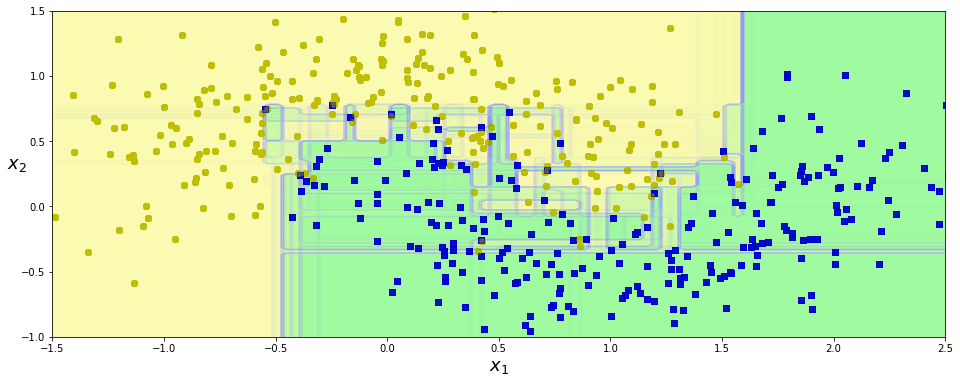

In [52]:
plt.figure(figsize=(16,6))
 
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split( X, y, random_state = i)
    clf = DecisionTreeClassifier(max_depth = 20, random_state = 0)
    clf.fit(X_train, y_train)
    plot_decision_boundary(clf, X, y, alpha = 0.02, contour=False)

plt.show()

# Бутстрэп<a class="anchor" style="autocontent" id="Бутстрэп"/><br>

Часто мы хотим получить какое-то представление о точности какой-либо нашей оценки - медианы выборки, качества модели, корреляции между двумя переменными и тд. И мы не знаем, как распределена характеристика: которую мы оцениваем. 

Есть много подходов к тому, как получить такую оценкуу и один из них - бутстрэп. 

<img src ="http://edunet.kea.su/repo/src/L03_Classic_ML/img/p/bootstrap1.png" width="1000">

Что мы делаем: 

1. Делаем из нашего исходного датасета N выборок такого же размера с повторениями. 

2. Для каждой полученной выборки (обычно их называют **псевдовыборками**) считаем характеристику, для которой хотим получить оценку. 

3. В результате такой процедуры получаем N значений характеристики. Строим гистограмму этих значений. Получили примерное распределение нашей характеристики. 

4. Можем построить 95% доверительный интервал для нашей характеристики - для этого отрезаем 2.5% самых больших значений и самых малых. 

Давайте попробуем сделать это на двух практических примерах


## Корреляция и построение доверительного интервала для нее<a class="anchor" style="autocontent" id="Корреляция-и-построение-доверительного-интервала-для-нее"/><br>


Часто мы хотим понять, как взаимосвязаны две переменные. И часто для оценки этой взаимосвязи используется корреляция. Например, корреляция Пирсона позволяет оценить линейную заисимость между двумя переменными. 



### Пример 1<a class="anchor" style="autocontent" id="Пример-1"/><br>
Подсчет корреляции пирсона реализован в Python с помощью функции *scipy.stats.pearsonr*. Посчитаем при помощи этой функции корреляцию между длиной наружной доли околоцветника и внутренней доли околоцветника. 

In [53]:
import scipy.stats

cor_value, pval = scipy.stats.pearsonr(df['sepal length (cm)'], df['petal length (cm)'])
print(f"Correlation coefficient is {cor_value}")
print(f"P-value is {pval}")

Correlation coefficient is 0.8717537758865831
P-value is 1.0386674194498099e-47


Функция выдает нам одновременно и коэффициент, и его значимость - вероятность наблюдать такое или более критическое значение. Однако на основе чего она считала p-value? 

Можно обратиться к документации

In [54]:
?scipy.stats.pearsonr

p-value считается в предположении, что наши переменные распределены нормально. 

Аналогично, при тех же предположениях, при помощи приведенной ниже функции можно подсчитать доверительный интервал для нашего коэффициента корреляции, который дает нам интервальную, а не точечную оценку для значения корреляции.

In [55]:
def pearsonr_ci(x, y, alpha = 0.05):
    ''' calculate Pearson correlation along with the confidence interval using scipy and numpy
    Parameters
    ----------
    x, y : iterable object such as a list or np.array
      Input for correlation calculation
    alpha : float
      Significance level. 0.05 by default
    Returns
    -------
    r : float
      Pearson's correlation coefficient
    pval : float
      The corresponding p value
    lo, hi : float
      The lower and upper bound of confidence intervals
    '''

    r, p = scipy.stats.pearsonr(x, y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(x.size - 3)
    z = scipy.stats.norm.ppf(1 - alpha / 2)
    lo_z, hi_z = r_z - z * se, r_z + z * se
    lo, hi = np.tanh((lo_z, hi_z))
    return lo, hi

In [56]:
pearsonr_ci(df['sepal length (cm)'], df['petal length (cm)'])

(0.8270363296643621, 0.9055080488214541)

А что, если мы не хотим делать предположения о нормальности? 
Или знаем, что они не выполняются? 
Или не хотим писать сложных функций на каждый случай - если x распределено так-то, то считай так-то, если так-то, то так-то и т.д.?

В этом случае нам и поможет бутстрэп. Напишем функцию, которая будет нам для любой характеристики, считаемой для пар из x и y, выдавать значения этой характеристики, посчитанные на псевдовыборках. 

In [57]:
def bootstrap_metric(x, 
                     y,
                     metric_fn,
                     samples_cnt = 1000,
                     alpha = 0.05,
                     random_state = 42):
    size = len(x)
    
    np.random.seed(random_state)
    b_metric = np.zeros(samples_cnt)
    for it in range(samples_cnt):
        poses = np.random.choice(x.shape[0], size=x.shape[0], replace=True)
        
        x_boot = x[poses]
        y_boot = y[poses]
        
        m_val = metric_fn(x_boot, y_boot)
        b_metric[it] = m_val
    
    return b_metric

Посчитаем значение корреляции Пирсона на бутстрэп-репликах:

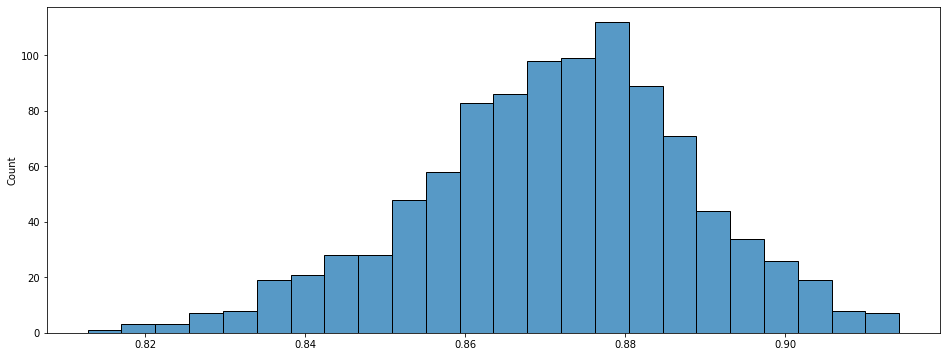

In [59]:
boot_cor = bootstrap_metric(x = df['sepal length (cm)'],
                            y=df['petal length (cm)'],
                            metric_fn=lambda x, y: scipy.stats.pearsonr(x, y)[0])

# Построим гистограмму полученных значений:
plt.figure(figsize=(16, 6))
sns.histplot(boot_cor)
plt.show()

Чтобы получить bootstrap 1-alpha доверительный интервал, просто посчитаем alpha/2 и  1-alpha квантили в полученном массиве:

In [60]:
alpha = 0.05
np.quantile(boot_cor, q=[alpha/2, 1 - alpha/2])

array([0.8361068 , 0.90348593])

Получили доверительный интервал, полученный при помощи бутстрапа. Заметим, что точность интервала зависит от числа реплик, которые вы сделаете — чем больше, тем точнее интервал. 

Сравнивая с интервалом, подсчитанным в предположении нормальности, видим, что они почти друг от друга не отличаются. 

### Пример 2<a class="anchor" style="autocontent" id="Пример-2"/><br>
Загрузим данные о людях с подозрением на сердечные заболевания. 
Допустим, мы хотим узнать, есть ли связь между уровнем холестерина (колонка chol) и возрастом (age)

In [61]:
!pip install gdown

In [62]:
!gdown  --id 1VFbDK-Ad-hpf0_GGCBzn4thdn9mkQ-Y- -O heart.csv 

Downloading...
From: https://drive.google.com/uc?id=1VFbDK-Ad-hpf0_GGCBzn4thdn9mkQ-Y-
To: /content/heart.csv
100% 11.3k/11.3k [00:00<00:00, 4.56MB/s]


In [63]:
heart_dataset = pd.read_csv("/content/heart.csv")

In [64]:
pearsonr_ci(heart_dataset['age'], heart_dataset['chol'])

(0.10349166489938495, 0.3186831235829968)

In [65]:
scipy.stats.pearsonr(heart_dataset['age'], heart_dataset['chol'])

(0.2136779565595619, 0.00017862864341450013)

Видим, что корреляция есть (доверительный интервал не включает 0). Или где-то есть подвох? На самом деле - да. Возраст точно не распределен нормально. Потому считать доверительный интервал с предположениями о нормальности переменных - не очень хорошо. 
Посмотрим, что скажет нам bootstrap-интервал:

In [66]:
boot_cor = bootstrap_metric(x=heart_dataset['age'],
                            y=heart_dataset['chol'],
                            metric_fn=lambda x, y: scipy.stats.pearsonr(x, y)[0])
np.quantile(boot_cor, q=[alpha/2, 1 - alpha/2])

array([0.10081424, 0.31257145])

Видим, что, действительно, полученная корреляция значима. Но теперь этот результат получен без очевидно неверных предположений. 

## Построение доверительного интервала для качества метрики<a class="anchor" style="autocontent" id="Построение-доверительного-интервала-для-качества-метрики"/><br>

Представим теперь, что мы сравнить поведение двух моделей на тестовом датасете. Допустим, нам интересует F1-score. Как нам это сделать? 



### Пример 1 (искусственный)<a class="anchor" style="autocontent" id="Пример-1-(искусственный)"/><br>

In [67]:
size = 1500
y = np.random.choice([0, 1], size=size, replace=True)
y[0:10]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0])

Напишем функцию, которая имитирует поведение модели, котоорая угадывает правильный класс в p проценте случаев:

In [68]:
def guess_model(y_real, p):
    guessed = np.random.choice([True, False], size=size, replace=True, p=[p, 1-p])
    y_predicted = np.zeros_like(y_real)
    y_predicted[guessed] = y_real[guessed]
    y_predicted[~guessed] = 1 - y_real[~guessed]
    return y_predicted

Пусть у нас две модели обладают одинаковым качеством, а третья - лучшим:

In [71]:
model1 = lambda y: guess_model(y, p=0.7)
model2 = lambda y: guess_model(y, p=0.7)
model3 = lambda y: guess_model(y, p=0.75)

np.random.seed(42)
y_pred1 = model1(y)
y_pred2 = model2(y)
y_pred3 = model3(y)

Первый вариант - просто посчитать f1-score каждой модели и проранжировать их в соответствии с f1-score:

In [73]:
from sklearn.metrics import f1_score

qual1 = f1_score(y_true=y, y_pred=y_pred1)
qual2 = f1_score(y_true=y, y_pred=y_pred2)
qual3 = f1_score(y_true=y, y_pred=y_pred3)

qual1, qual2, qual3

(0.6943498978897209, 0.697951090548579, 0.764505119453925)

Очевидная проблема - да, нужная нам модель выбрана, но почему мы считаем различие между первой и второй моделью значимыми, а между второй и третьей - нет?

In [74]:
qual2 - qual1, qual3 - qual2

(0.0036011926588580545, 0.06655402890534601)

Получается, такой способ (при помощи точечной оценки), может привести к ошибке, так как не дает нам судить о **значимости** отличий.

Существует много способов посчитать значимость данного отличия. Мы рассмотрим способ сравнения на основе bootstrap. Об остальных можете почитать в обзоре, приведенном в списке литературы. 

Способ, собственно состоит в применении бутстрэпа к предсказаниям модели и реальным меткам. 

In [75]:
boot_f1score_m1 = bootstrap_metric(y, y_pred1, metric_fn=lambda x, y: f1_score(y_true=x, y_pred=y))
boot_f1score_m2 = bootstrap_metric(y, y_pred2, metric_fn=lambda x, y: f1_score(y_true=x, y_pred=y))
boot_f1score_m3 = bootstrap_metric(y, y_pred3, metric_fn=lambda x, y: f1_score(y_true=x, y_pred=y))

Построим 90% доверительный интервал качества для каждой модели:

In [76]:
alpha = 0.10
print("F1 score for the 1st model: ", np.quantile(boot_f1score_m1, q=[alpha/2, 1 - alpha/2]))
print("F1 score for the 2st model: ", np.quantile(boot_f1score_m2, q=[alpha/2, 1 - alpha/2]))
print("F1 score for the 3st model: ", np.quantile(boot_f1score_m3, q=[alpha/2, 1 - alpha/2]))

F1 score for the 1st model:  [0.6706605  0.71665785]
F1 score for the 2st model:  [0.67613252 0.71965134]
F1 score for the 3st model:  [0.74469469 0.78326985]


Теперь мы видим, что доверительные интервалы для качества первой и второй модели практически одинаковы, в то время как доверительный интервал для качества третьей модели от них сильно отличается и не пересекается. 

Можем построить боксплот:

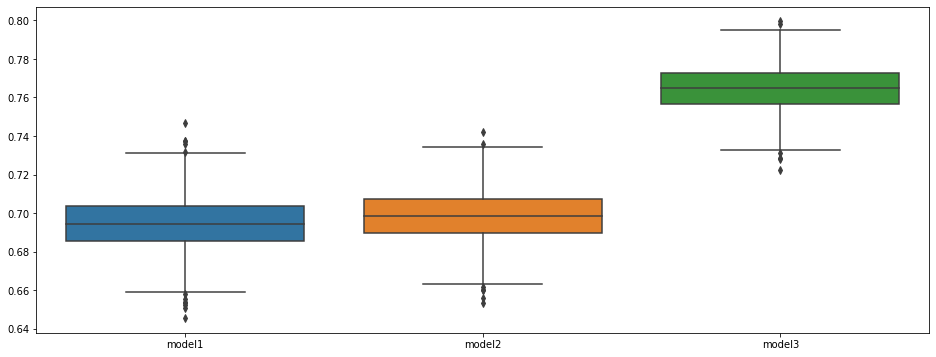

In [77]:
plt.figure(figsize=(16,6))
sns.boxplot(y=np.concatenate([boot_f1score_m1, boot_f1score_m2, boot_f1score_m3]),
            x=["model1"] * 1000 + ['model2'] * 1000 + ['model3'] * 1000)
plt.show()

### Пример 2 (классифицируем людей с больным сердцем и нет)<a class="anchor" style="autocontent" id="Пример-2-(классифицируем-людей-с-больным-сердцем-и-нет)"/><br>

In [78]:
X = heart_dataset.drop("target", axis=1)
y = heart_dataset['target'] > 0
X_train, X_test, y_train, y_test = train_test_split(X, y.values, random_state = 42)

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import average_precision_score # PR-AUC
from sklearn.model_selection import GridSearchCV

In [80]:
svc_model = GridSearchCV(SVC(), {'kernel':('linear',
                                           'rbf'),
                                 'C':[0.01, 0.1, 1, 10]}
                         ).fit(X_train, y_train)

logr_model = GridSearchCV(LogisticRegression(solver='liblinear', max_iter=100000), 
                          {'penalty':('l1', 
                                      'l2'),
                            'C':[0.01, 0.1, 1, 10, 100]}
                          ).fit(X_train, y_train)

#  мало объектов в листе - плохие оценки вероятностей класса - модель переобучается
dt_model = GridSearchCV(DecisionTreeClassifier(), 
                          {'max_depth':[1, 3, 5, 7, 10],
                           'min_samples_leaf': [1, 3, 5, 10]}
                        ).fit(X_train, y_train)


In [81]:
y_pred1 = svc_model.decision_function(X_test) # by default, SVM gives score to each object instead of probabilities
y_pred2 = logr_model.predict_proba(X_test)[:, 1]
y_pred3 = dt_model.predict_proba(X_test)[:, 1]

qual1 = average_precision_score(y_true=y_test, y_score=y_pred1)
qual2 = average_precision_score(y_true=y_test, y_score=y_pred2)
qual3 = average_precision_score(y_true=y_test, y_score=y_pred3)

In [82]:
print(f"Logistic regression pr-auc: {qual1:.03f}")
print(f"SVC pr-auc: {qual2:.03f}")
print(f"DecisionTreeClassifier pr-auc: {qual3:.03f}")

Logistic regression pr-auc: 0.893
SVC pr-auc: 0.902
DecisionTreeClassifier pr-auc: 0.801


Теперь подсчитаем бутстрэп-оценки. Обратите внимание - теперь мы передаем не предсказания, а вероятности.

In [84]:
boot_score_logreg = bootstrap_metric(y_test, 
                                   y_pred1, 
                                   metric_fn=lambda x, y: average_precision_score(y_true=x, y_score=y))
boot_score_svc = bootstrap_metric(y_test,
                                   y_pred2,
                                   metric_fn=lambda x, y: average_precision_score(y_true=x, y_score=y))
boot_score_dt = bootstrap_metric(y_test,
                                   y_pred3,
                                   metric_fn=lambda x, y: average_precision_score(y_true=x, y_score=y))

alpha=0.10
print("Logistic regression pr-auc 90%-ci: ", np.quantile(boot_score_logreg, q=[alpha/2, 1 - alpha/2]))
print("SVC pr-auc 90%-ci:", np.quantile(boot_score_svc, q=[alpha/2, 1 - alpha/2]))
print("DecisionTreeClassifier pr-auc 90%-ci:", np.quantile(boot_score_dt, q=[alpha/2, 1 - alpha/2]))

Logistic regression pr-auc 90%-ci:  [0.80793003 0.97363727]
SVC pr-auc 90%-ci: [0.8276533  0.97115084]
DecisionTreeClassifier pr-auc 90%-ci: [0.70049707 0.90513571]


Видим, что качество SVC и логистической регрессии почти не отличается, а дерево решений уступает обеим моделям.

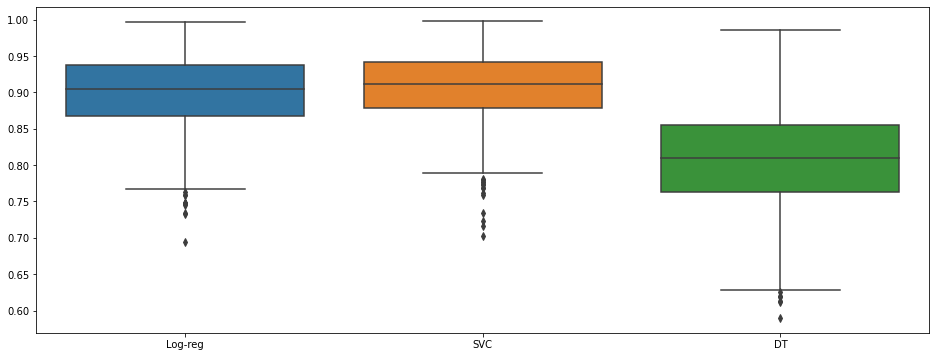

In [85]:
plt.figure(figsize=(16,6))
sns.boxplot(y=np.concatenate([boot_score_logreg,
                              boot_score_svc, 
                              boot_score_dt]),
            x=["Log-reg"] * 1000 + ['SVC'] * 1000 + ['DT'] * 1000)
plt.show()

# Ансамбли<a class="anchor" style="autocontent" id="Ансамбли"/><br>

## Error coorrection codes<a class="anchor" style="autocontent" id="Error-coorrection-codes"/><br>

Пусть у нас есть сигнал: 


<font color=blue size=30>1110110011</font>

Но при передаче на другое устройство в нем могут возникать ошибки.

<font color=blue size=30>1</font><font color=red size=30>0</font><font color=blue size=30>1011</font><font color=red size=30>1</font><font color=blue size=30>011</font>

Самое простое решение возникшей проблемы:

 1. Шум, который вносит ошибки, скорее всего не зависит от места в сигнале;
 2. Передадим 3 раза один и тот же сигнал;

<font color=blue size=30>1</font><font color=red size=30>0</font><font color=blue size=30>1011</font><font color=red size=30>1</font><font color=blue size=30>011</font>

<font color=blue size=30>1110</font><font color=red size=30>0</font><font color=blue size=30>10011</font>

<font color=blue size=30>11</font><font color=red size=30>0</font><font color=blue size=30>0110</font><font color=red size=30>1</font> <font color=blue size=30>11</font>



 3. Усредним, что получилось (в каждом случае возьмем наиболее часто встречающуюся цифру);

<font color=blue size=30>1110110011</font>


 4. С большой долей вероятности итоговый сигнал восстановится; 
 5. Чем больше копий сигналов передастся, тем выше вероятность, что сигнал восстановится полностью корректно.

Напишем код, чтобы удостовериться в наших выводах.

In [86]:
def get_signal(size, random_state = 42):
    signal = np.random.choice([0,1], size, replace=True)
    return signal

def compare_signs(sig1, sig2):
    return (sig1 != sig2).sum()

def add_noise(sig, noise_p = 0.20):
    sig = sig.copy()
    changed = np.random.choice([True, False], sig.shape[0], replace=True, p = [noise_p, 1 - noise_p])
    sig[changed] = 1 - sig[changed]
    return sig 

def average_signals(sigs):
    sig = np.mean(sigs, axis=0)
    sig = np.round(sig, 0)
    return sig

def send_signal(signal, tries):
    passed_sigs = [add_noise(signal) for _ in range(tries)]
    fin_signal = average_signals(passed_sigs)
    return fin_signal

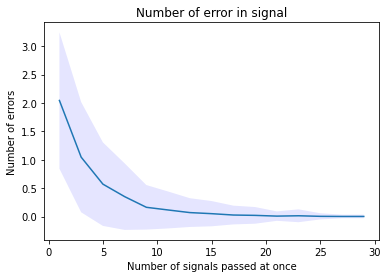

In [88]:
np.random.seed(42)
repeats = 1000
signals_cnt_rng = range(1, 30, 2)

signal = get_signal(10)
mistakes = np.zeros((repeats, len(signals_cnt_rng)))

for j, sig_cnt in enumerate(signals_cnt_rng):
    for i in range(repeats):
        rec_sig = send_signal(signal, sig_cnt)
        mistakes[i, j] = compare_signs(rec_sig, signal)


mn = mistakes.mean(axis=0)
sd = mistakes.std(axis=0)
plt.title("Number of error in signal")
plt.ylabel("Number of errors")
plt.xlabel("Number of signals passed at once")
plt.plot(signals_cnt_rng, mn)
plt.fill_between(signals_cnt_rng, mn - sd, mn+sd,  facecolor='blue',
                 alpha=0.1)


Оказывается, это имеет отношение к проблеме, с которой мы столкнулись с деревьями решений.



## Постановка задачи <a class="anchor" style="autocontent" id="Постановка-задачи"/><br>

Есть 10 объектов, в рееальности все принадлежат классу 1


<font color=blue size=30>1111111111</font>

Пусть у нас есть три **независимых** классификатора A, B и C. Каждый предсказывает 1 в 70% случаев. 


Мы хотим получить общий классификатор на основании этих трех. 



Мы хотим получить предсказание базовых классификаторов, применить к ним какую-то функцию, которая выдаст итоговой ответ. Вид этой функции задается заранее. 

## Простое голосование<a class="anchor" style="autocontent" id="Простое-голосование"/><br>
Будем просто усреднять предсказание наших классификаторов


$$ h(x) = \dfrac 1 T \sum_{i=1}^{T}a_i(x) $$


<img src ="https://edunet.kea.su/repo/src/L03_Classic_ML/img/p/simple_voting.png" width="600">


Допустим, у нас 3 классификатора, которые предсказывают независимо друг от друга. 

Посчитаем вероятность того, что:

 1. все три классификатора верны: 0.7 * 0.7 * 0.7 = 0.3429
 2. два классификатора верны: 0.7 * 0.7 * 0.3 + 0.7 * 0.3 * 0.7 + 0.3 * 0.7 * 0.7 = 0.4409
 
Таким образом, если брать большинство голосов, то мы будем в 78% случаев предсказывать верно. Мы взяли 3 классификатора, которые сами по себе были не очень хорошими, и получили классификатор лучшего качества. 
Очевидно, что если взять 4, 5, 10 классификаторов, то ситуация будет становиться лучше. 


Пусть теперь у нас три классификатора, выдающий следующие предсказания

<font color=blue size=30>11111111</font><font color=red size=30>00</font> - 80% точность

<font color=blue size=30>11111111</font><font color=red size=30>00</font> - 80% точность

<font color=blue size=30>1</font></font><font color=red size=30>0</font><font color=blue size=30>111111</font><font color=red size=30>00</font> - 70% точность

Если объединим предказания, то получим:

<font color=blue size=30>11111111</font><font color=red size=30>00</font> - 80% точность

Потому что очень **высокая зависимость предсказаний**. Выше видно, что два классификатора предсказывают абсолютно одинаково. Вероятность, что они делают это случайно, очень мала. 

А вот если возьмем такие классификаторы, то все получится:
    
<font color=blue size=30>11111111</font><font color=red size=30>00</font> - 80% точность

<font color=red size=30>0</font><font color=blue size=30>111</font><font color=red size=30>0</font><font color=blue size=30>111</font><font color=red size=30>0</font><font color=blue size=30>1</font> - 70% точность

<font color=blue size=30>1</font><font color=red size=30>000</font><font color=blue size=30>1</font><font color=red size=30>0</font><font color=blue size=30>1111</font> - 60% точность


Усреднение:

<font color=blue size=30>11111111</font><font color=red size=30>0</font><font color=blue size=30>1</font> - 90% точность

### Эксперимент: зависимость качества ансамбля от качество индивидуального предсказателя и от числа предсказателей<a class="anchor" style="autocontent" id="Эксперимент:-зависимость-качества-ансамбля-от-качество-индивидуального-предсказателя-и-от-числа-предсказателей"/><br>

In [89]:
def get_predictions(y_real, p, cnt):
    size = y_real.shape[0]
    guessed = np.random.choice([True, False], (cnt, size), p=[p, 1-p])
    y = np.repeat(y_real.reshape(1, -1), cnt, axis=0)
    y[~guessed] = 1 - y[~guessed] 
    return y 

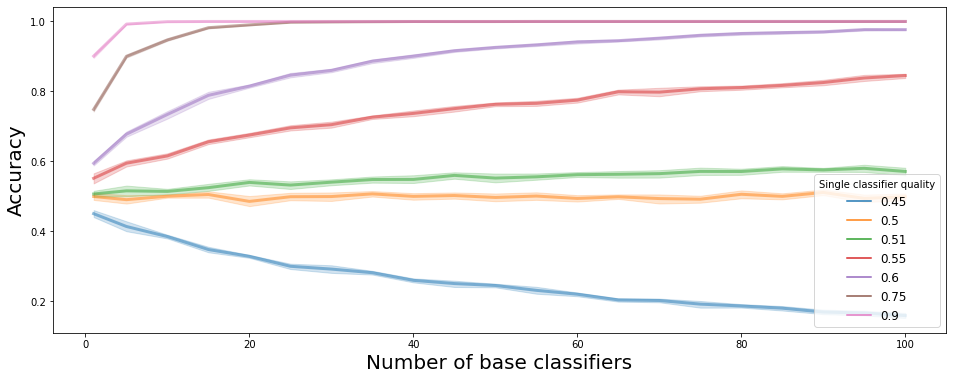

In [92]:
size = 1000
reps = 10

cnt_base_predictors = [1] + list(range(5, 105, 5))
single_qual = [0.45, 0.5, 0.51, 0.55, 0.6, 0.75, 0.9]

dt = {"cnt":[], "single_qual":[], "accuracy":[]}

for i in range(reps):
    y_real = np.random.choice([0,1], size)
    for cnt in cnt_base_predictors:
        for p in single_qual:

            preds = get_predictions(y_real, p, cnt)
            voting =  np.round(preds.mean(axis=0))
            accuracy = (y_real == voting).mean()
            dt['cnt'].append(cnt)
            dt['single_qual'].append(f"{p:.02}")
            dt['accuracy'].append(accuracy)

results = pd.DataFrame(dt)


plt.figure(figsize=(16,6))

sns.lineplot(data=results, x='cnt', y='accuracy', hue='single_qual', lw=3, alpha=0.5)
plt.xlabel("Number of base classifiers", size=20)
plt.ylabel("Accuracy", size=20)
plt.legend(loc='best', fontsize=12, title="Single classifier quality")
plt.show()

Видим:
1. чем лучше базовый классификатор, тем меньше нужно классификаторов при прочих равных для достижения большего качества;
2. если качество базового классификатора даже чуть больше 0.5, то качество ансамбля растет с увеличиением числа моделей в ансамбле;
3. если качество базового классификатора неотличимо от случайного (0.5), то качество ансамбля будет оставаться равным 0.5;
4. если качество базового классификатора ниже случайного (0.5), то качество случайного классификатора стремится к 0.

### Эксперимент: коррелированность моделей<a class="anchor" style="autocontent" id="Эксперимент:-коррелированность-моделей"/><br>

Посмотрим, как зависит качество предсказания от коррелированности предсказателей. Конкретно — от ожидаемой коррелированности вероятностей ошибиться на данном объекте для любой взятой пары классификаторов из ансамбля.

In [93]:
def get_correlated_predictions(y_real, p, cnt, r):
    size = y_real.shape[0]
    x1 = np.random.uniform(0, 1, size)
    x2 = np.random.uniform(0, 1, (cnt, size))
    q = np.sqrt(r)
    y = q * x1 + (1 - q ** 2) ** 0.5 * x2 # y variables now correlated with correlation=r 
    y_mod = np.zeros_like(y)
    for i in range(y.shape[0]):
      y_mod[i] = scipy.stats.rankdata(y[i])

    y =  y_mod / size # back to uniform, slightly affects correlations
    
    y_pred = np.repeat(y_real.reshape(1, -1), cnt, axis=0) 
    y_pred[y < 1-p ] = 1 - y_pred[y < 1-p ] # to predictions, affects correlations
    return y_pred

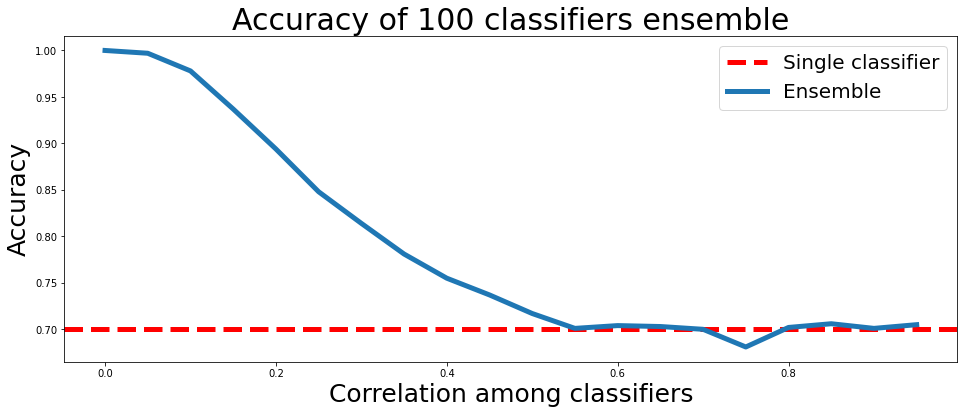

In [94]:
np.random.seed(42)
x = np.arange(0, 1, 0.05)
accuracy = np.zeros_like(x)
p = 0.7
cnt = 100
for ind, r in enumerate(x):
    preds = get_correlated_predictions(y_real, p, cnt, r)
    voting =  np.round(preds.mean(axis=0))
    accuracy[ind] =  (y_real == voting).mean()


plt.figure(figsize=(16,6))
plt.title(f"Accuracy of {cnt} classifiers ensemble", size=30)
plt.xlabel("Correlation among classifiers", size=25)
plt.ylabel("Accuracy",  size=25)
plt.axhline(y=p, color='red', lw=5, ls='--', label="Single classifier")
sns.lineplot(x=x, y=accuracy, lw=5, label='Ensemble')
plt.legend(fontsize=20)
plt.show()

Видим, что по мере увеличения коррелированности моделей, качество все больше и больше приближается к качеству одной базовой модели.

## Bagging  = Bootstrap aggregation<a class="anchor" style="autocontent" id="Bagging--=-Bootstrap-aggregation"/><br>
Нам надо откуда-то брать классификаторы, которые сами по себе предсказывают лучше, чем случайное число, при этом они должны быть не коррелированы. На самом деле это нетривиальная задача: откуда нам брать классификаторы, учитывая, что у нас 1 датасет? 


<img src ="https://edunet.kea.su/repo/src/L03_Classic_ML/img/p/bootstrap.png" width="700">

Первый вариант — нам поможет уже расмотренный bootstrap:

1. Делаем из нашего исходного датасета N выборок такого же размера с повторениями. 

2. На каждой полученной выборке (обычно их называют **псевдовыборками**) строим отдельную модель. Чтобы полученным модели были слабо зависимы, будем использовать алгоритм, который чувствителен к небольшим изменениям в выборке. 

3. Получаем N слабо зависимых моделей. 

4. Когда нам нужно сделать предсказание для нового объекта, делаем предсказание каждой из N моделей, а затем усредняем предсказание. 

В sklearn для bagging можно использовать класс BaggingClassifier из sklearn.ensemble. Мы напишем свой код для бэггинга для большей наглядности происходящего. Кроме того, это вам понадобится при выполнении заданий.

### Пишем свой bagging<a class="anchor" style="autocontent" id="Пишем-свой-bagging"/><br>

In [102]:
import sklearn

def get_bootstrap_sample(X, y):
    size = X.shape[0]
    poses = np.random.choice(size, 
                             size=size,
                             replace=True)
    X_boot = X[poses]
    y_boot = y[poses]
    return X_boot, y_boot

class BaggingBinaryClassifierEnsemble:
    def __init__(self, base_classifier, ensemble_size, random_state=42):
        self. base_classifier =  base_classifier
        self.ensemble_size = ensemble_size
        self.random_state = random_state
        self.ensemble = []
    
    def fit(self, X, y):
        np.random.seed(self.random_state)
        for est_id in range(self.ensemble_size):
            X_boot, y_boot = get_bootstrap_sample(X, y)
            model = sklearn.clone(self.base_classifier) # create new base model
            model.fit(X_boot, y_boot)
            self.ensemble.append(model)
            
    def predict_proba(self, X):
        if not self.ensemble:
            raise Exception("Unfitted model")
            
        y_pred = 0
        for est in self.ensemble:
            y_pred += est.predict(X)
        y_pred = y_pred / self.ensemble_size    
        return y_pred
        
    def predict(self, X):
        y_proba = self.predict_proba(X)
        y_pred = np.round(y_proba)
        return y_pred

### Эксперимент1:  Классифицируем людей с больным сердцем и нет<a class="anchor" style="autocontent" id="Эксперимент1:--Классифицируем-людей-с-больным-сердцем-и-нет"/><br>

Для простоты здесь и далее будем использовать параметры моделей, подобранные ранее, когда мы использовали их вне ансамбля. В данном случае это не имеет значения, но в случае разбираемых далее случайного леса и градиентного бустинга, параметры подбирают **вместе** с построением ансамбля. 

In [103]:
X = heart_dataset.drop("target", axis=1)
y = heart_dataset['target'] > 0
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

Опробуем модель:

In [104]:
bagging_dt = BaggingBinaryClassifierEnsemble(dt_model.best_estimator_, 
                                            ensemble_size=100)

bagging_logreg = BaggingBinaryClassifierEnsemble(logr_model.best_estimator_,
                                                 ensemble_size=100)

bagging_svc = BaggingBinaryClassifierEnsemble(svc_model.best_estimator_,
                                              ensemble_size=100)

In [105]:
bagging_dt.fit(X_train.values, y_train.values)
bagging_logreg.fit(X_train.values, y_train.values)
bagging_svc.fit(X_train.values, y_train.values)

In [106]:
y_pred_blr = bagging_logreg.predict_proba(X_test.values)
y_pred_bsvc = bagging_svc.predict_proba(X_test.values)
y_pred_bdt = bagging_dt.predict_proba(X_test.values) 

In [107]:
qual_blr = average_precision_score(y_true=y_test, y_score=y_pred_blr)
qual_bsvc = average_precision_score(y_true=y_test, y_score=y_pred_bsvc)
qual_bdt = average_precision_score(y_true=y_test, y_score=y_pred_bdt)
print(f"Bagged Logistic regression pr-auc: {qual_blr:.03f}")
print(f"Bagged SVC pr-auc: {qual_bsvc :.03f}")
print(f"Bagged DecisionTreeClassifier pr-auc: {qual_bdt:.03f}")

Bagged Logistic regression pr-auc: 0.868
Bagged SVC pr-auc: 0.885
Bagged DecisionTreeClassifier pr-auc: 0.880


In [108]:
boot_score_blogreg = bootstrap_metric(y_test.values, 
                                   y_pred_blr, 
                                   metric_fn=lambda x, y: average_precision_score(y_true=x, 
                                                                                  y_score=y))
boot_score_bsvc = bootstrap_metric(y_test.values,
                                   y_pred_bsvc ,
                                   metric_fn=lambda x, y: average_precision_score(y_true=x, 
                                                                                  y_score=y))
boot_score_bdt = bootstrap_metric(y_test.values,
                                   y_pred_bdt,
                                   metric_fn=lambda x, y: average_precision_score(y_true=x, 
                                                                                  y_score=y))
alpha=0.10
print("Bagged Logistic regression pr-auc 90%-ci: ", np.quantile(boot_score_blogreg, q=[alpha/2, 1 - alpha/2]))
print("Bagged SVC pr-auc 90%-ci:", np.quantile(boot_score_bsvc, q=[alpha/2, 1 - alpha/2]))
print("Bagged DecisionTreeClassifier pr-auc 90%-ci:", np.quantile(boot_score_bdt, q=[alpha/2, 1 - alpha/2]))

Bagged Logistic regression pr-auc 90%-ci:  [0.77562226 0.95204572]
Bagged SVC pr-auc 90%-ci: [0.79925722 0.96968695]
Bagged DecisionTreeClassifier pr-auc 90%-ci: [0.8038916  0.95295538]


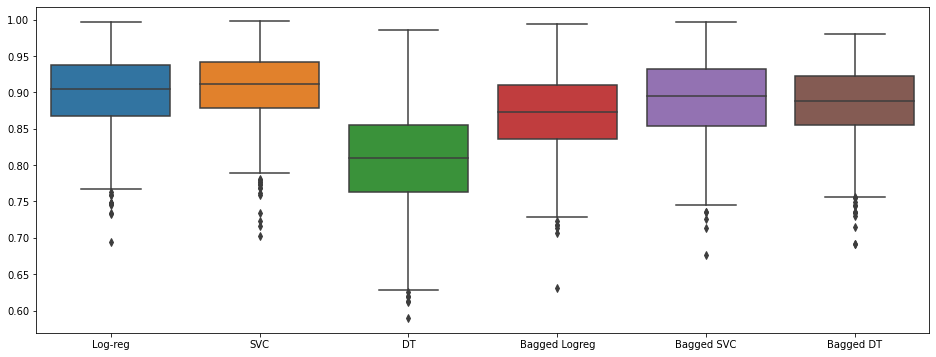

In [109]:
plt.figure(figsize=(16,6))
sns.boxplot(y=np.concatenate([boot_score_logreg,
                              boot_score_svc, 
                              boot_score_dt, 
                              boot_score_blogreg,
                              boot_score_bsvc,
                              boot_score_bdt
                             ]),
             x=["Log-reg"] * 1000 + ['SVC'] * 1000 + ['DT'] * 1000 + ["Bagged Logreg"] * 1000\
             + ["Bagged SVC"] * 1000 + ["Bagged DT"] * 1000)

Внезапно, мы видим, что главному аутсайдеру — дереву решений, в случае bagging удается побить все остальные решения и улучшить получить качество сравнимое, если не лучше, с качеством других базовых моделей.

### Эксперимент2:  Сравним разделяющие плоскости дерева решений и бэггинга на деревьях решений<a class="anchor" style="autocontent" id="Эксперимент2:--Сравним-разделяющие-плоскости-дерева-решений-и-бэггинга-на-деревьях-решений"/><br>

In [110]:
X, y = sklearn.datasets.make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

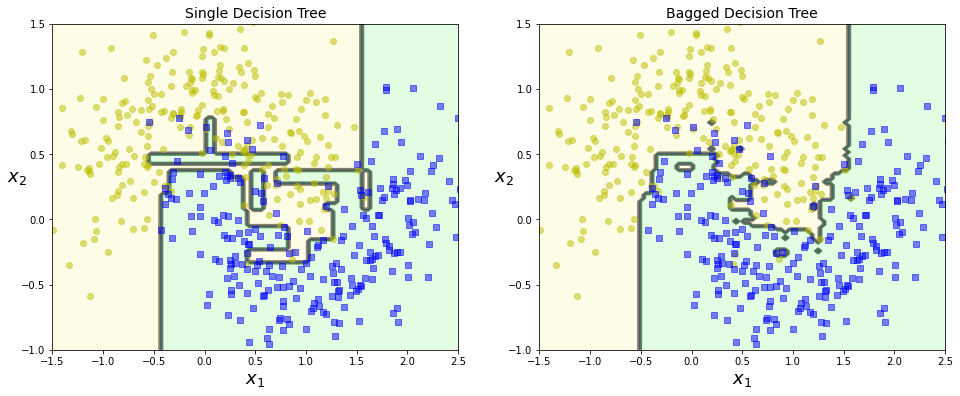

In [111]:
plt.figure(figsize=(16,6))
plt.subplot(121)
clf = DecisionTreeClassifier(max_depth = 10, 
                             random_state = 42)
clf.fit(X_train, y_train)
plot_decision_boundary(clf, X, y)
plt.title("Single Decision Tree", fontsize=14)


plt.subplot(122)
bagging_dt = BaggingBinaryClassifierEnsemble(DecisionTreeClassifier(max_depth=10), 
                                            ensemble_size=100)
bagging_dt.fit(X_train, y_train)
plot_decision_boundary(bagging_dt, X, y)
plt.title("Bagged Decision Tree", fontsize=14)
plt.show()

Видим, что разделяющая плоскость для дереве более гладкая и лучше отражает реальное разделение классов. 

До этого мы говорили (обсуждая bias-variance trade-off), мы говорили, что хорошо бы взять решающие границы большого числа деревьев,
построенных на разных  тренировочных датасетах, полученных из генеральной совокупности, и усреднить эти границы, получив более хорошую решающую границу. К сожалению, мы не можем брать бесконечное число тренировочных датасетов. Но у нас есть бутстрэп. И он тоже достаточно хорошо аппроксимирует границу, которую мы бы получили, будь у нас много разных тренировочных датасетов:


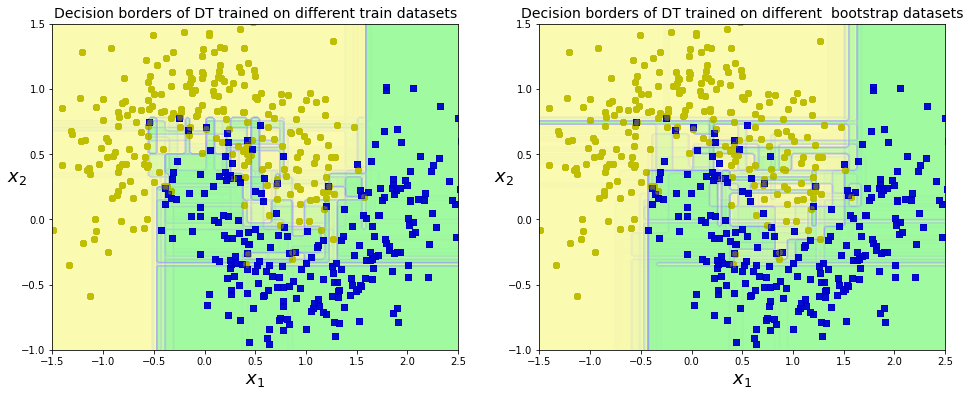

In [112]:
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.title("Decision borders of DT trained on different train datasets", fontsize=14)
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=i)
    clf = DecisionTreeClassifier(max_depth = 20, random_state = 42)
    clf.fit(X_train, y_train)
    plot_decision_boundary(clf, X, y, alpha=0.02, contour=False)

plt.subplot(122)
plt.title("Decision borders of DT trained on different  bootstrap datasets", fontsize=14)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
bagging_dt = BaggingBinaryClassifierEnsemble(DecisionTreeClassifier(max_depth=10), 
                                              ensemble_size=100, random_state=42)

bagging_dt.fit(X_train, y_train)

for base_dt in bagging_dt.ensemble:
    plot_decision_boundary(base_dt, X, y, alpha=0.02, contour=False)
plt.show()

## Метод случайных подпространств (RSM, random subspace method)<a class="anchor" style="autocontent" id="Метод-случайных-подпространств-(RSM,-random-subspace-method)"/><br>

Второй вариант получения пссевдовыборок — мы можем сэмплировать не объекты, а признаки.  При этом бесполезно иметь в выборке два одинаковых признака, потомы мы делаем выборки меньшего размера, чем исходное число признаков и без повторений. 

<img src ="https://edunet.kea.su/repo/src/L03_Classic_ML/img/p/random_subspace_method.pbm" width="900">

Обычно для каждой модели выбирают $$\sqrt{feature\_cnt}$$ для задач классификации и $$ \frac {feature\_cnt} {3}$$ для задач регрессии. Хотя строгих правил нет, этот параметр можно подбирать на кросс-валидации.

### Пишем свой RSM<a class="anchor" style="autocontent" id="Пишем-свой-RSM"/><br>

Опять же, напишем метод случайных подпространств сами:

In [113]:
import sklearn

def get_rsm_sample(X, y, f_num=None):
    size = X.shape[1]
    f_num = f_num or int(np.sqrt(size)) + 1 
    f_num = min(size, f_num)
    
    f_poses = np.random.choice(size, 
                             size=f_num,
                             replace=False)
    X_rsm = X[:, f_poses]
    y_rsm = y.copy()
    return X_rsm, y_rsm, f_poses

class RSMBinaryClassifierEnsemble:
    def __init__(self, base_classifier, ensemble_size, random_state=42, max_features=None):
        self. base_classifier =  base_classifier
        self.ensemble_size = ensemble_size
        self.random_state = random_state
        self.max_features = max_features
        
        self.ensemble = []
        self.feature_poses = [] 
        # we had to keep track of features selected. In sklearn Random Forest, discussed below, 
        # another, more stable implementation is used.
        # they use `f_num` random features but in case no good split found, they try other features too.  
    
    def fit(self, X, y):
        np.random.seed(self.random_state)
        for est_id in range(self.ensemble_size):
            X_boot, y_boot, f_poses = get_rsm_sample(X, y, f_num=self.max_features)
            self.feature_poses.append(f_poses)
            model = sklearn.clone(self.base_classifier) # create new base model
            model.fit(X_boot, y_boot)
            self.ensemble.append(model)
    
    def predict_proba(self, X):
        if not self.ensemble:
            raise Exception("Unfitted model")
            
        y_pred = 0
        for ind, est in enumerate(self.ensemble):
            y_pred += est.predict(X[:, self.feature_poses[ind]])
        y_pred = y_pred / self.ensemble_size    
        return y_pred
    
        
    def predict(self, X):
        y_proba = self.predict_proba(X)
        y_pred = np.round(y_proba)
        return y_pred
                    

### Эксперимент1: Классифицируем людей с больным сердцем и нет<a class="anchor" style="autocontent" id="Эксперимент1:-Классифицируем-людей-с-больным-сердцем-и-нет"/><br>

In [115]:
X = heart_dataset.drop("target", axis=1)
y = heart_dataset['target'] > 0
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

rsm_dt = RSMBinaryClassifierEnsemble(dt_model.best_estimator_,
                                     ensemble_size=100)

rsm_logreg = RSMBinaryClassifierEnsemble(logr_model.best_estimator_,
                                         ensemble_size=100)

rsm_svc = RSMBinaryClassifierEnsemble(svc_model.best_estimator_,
                                      ensemble_size=100)

In [116]:
rsm_dt.fit(X_train.values, y_train.values)
rsm_logreg.fit(X_train.values, y_train.values)
rsm_svc.fit(X_train.values, y_train.values)

In [117]:
y_pred_rlr = rsm_logreg.predict_proba(X_test.values)
y_pred_rsvc = rsm_svc.predict_proba(X_test.values)
y_pred_rdt = rsm_dt.predict_proba(X_test.values) 

In [118]:
boot_score_rlogreg = bootstrap_metric(y_test.values,
                                      y_pred_rlr,
                                      metric_fn=lambda x, y: 
                                      average_precision_score(y_true=x, y_score=y))

boot_score_rsvc = bootstrap_metric(y_test.values,
                                   y_pred_rsvc ,
                                   metric_fn=lambda x, y:
                                   average_precision_score(y_true=x, y_score=y))

boot_score_rdt = bootstrap_metric(y_test.values,
                                  y_pred_rdt,
                                  metric_fn=lambda x, y: 
                                  average_precision_score(y_true=x, y_score=y))

alpha=0.10
print("RSM Logistic regression pr-auc 90%-ci: ", np.quantile(boot_score_blogreg, q=[alpha/2, 1 - alpha/2]))
print("RSM SVC pr-auc 90%-ci:", np.quantile(boot_score_bsvc, q=[alpha/2, 1 - alpha/2]))
print("RSM DecisionTreeClassifier pr-auc 90%-ci:", np.quantile(boot_score_bdt, q=[alpha/2, 1 - alpha/2]))

RSM Logistic regression pr-auc 90%-ci:  [0.77562226 0.95204572]
RSM SVC pr-auc 90%-ci: [0.79925722 0.96968695]
RSM DecisionTreeClassifier pr-auc 90%-ci: [0.8038916  0.95295538]


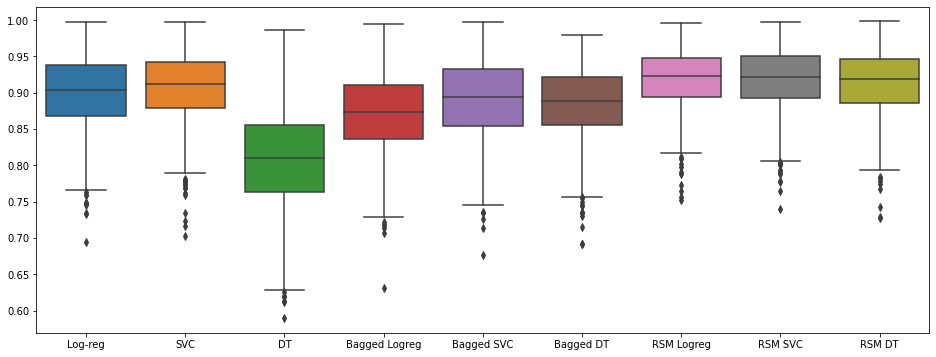

In [120]:
plt.figure(figsize=(16,6))
sns.boxplot(y=np.concatenate([boot_score_logreg,
                              boot_score_svc, 
                              boot_score_dt, 
                              boot_score_blogreg,
                              boot_score_bsvc,
                              boot_score_bdt,
                              boot_score_rlogreg,
                              boot_score_rsvc,
                              boot_score_rdt
                             ]),
             x=[x for x in  ('Log-reg', 
              'SVC',
              'DT',
              "Bagged Logreg", 
              "Bagged SVC", 
              "Bagged DT",
              "RSM Logreg", 
              "RSM SVC", 
              "RSM DT") for y in range(1000)])

Опять же, видим, что RSM помогает только дереву решений. Остальные методы не улучшают своего качества. Заметим также, что RSM Decision Tree проигрывает в данном случае Bagging Decision Tree.

## Комбинация RSM и Bagging<a class="anchor" style="autocontent" id="Комбинация-RSM-и-Bagging"/><br>


Можно объединить оба способа: применяем bootstrap к объектам (получается выборка одного размера, но с повторяющимися объектами, а каких-то объектов не будет), и, кроме этого, выкидываем часть признаков. Зачем это нужно? В этом случае мы получим еще более сильно отличающиеся друг от друга случайные выборки. 

sklearn.ensemble.BaggingClassifier и sklearn.ensemble.BaggingRegressor  вопреки названию может подддерживать оба способа.



<img src ="https://edunet.kea.su/repo/src/L03_Classic_ML/img/p/rsm_and_bagging.png" width="500">

## Почему для одних классов моделей работает, а для других - нет<a class="anchor" style="autocontent" id="Почему-для-одних-классов-моделей-работает,-а-для-других---нет"/><br>

Теперь будем использовать BaggingClassier из стандартной библиотеки:

In [121]:
from sklearn.ensemble import BaggingClassifier
models = {}


svc_model = GridSearchCV(SVC(), {'kernel':('linear', 
                                           'rbf'),
                                 'C':[0.01, 0.1, 1, 10]}
                         ).fit(X_train, y_train)
models['SVC'] = svc_model


logr_model = GridSearchCV(LogisticRegression(solver='liblinear', max_iter=100000), 
                          {'penalty':('l1', 
                                      'l2'),
                            'C':[0.01, 0.1, 1, 10, 100]}
                          ).fit(X_train, y_train)
models['LogReg'] = logr_model

#  мало объектов в листе - плохие оценки вероятностей класса - модель переобучается
dt_model = GridSearchCV(DecisionTreeClassifier(), 
                          {'max_depth':[1, 3, 5, 7, 10],
                           'min_samples_leaf': [1, 3, 5, 10]}
                        ).fit(X_train, y_train)
models['DT'] = dt_model


bagging_dt = BaggingClassifier(dt_model.best_estimator_, 
                               n_estimators=100,
                               random_state=42)
models["Bagging DT"] = bagging_dt


bagging_logr = BaggingClassifier(logr_model.best_estimator_, 
                                 n_estimators=100,
                                 random_state=42)
models["Bagging LogReg"] = bagging_logr


bagging_svc = BaggingClassifier(svc_model.best_estimator_,
                                n_estimators=100,
                                random_state=42)
models["Bagging SVC"] = bagging_svc 


sqrt_features = int(np.sqrt(X.shape[1])) + 1


rsm_dt = BaggingClassifier(dt_model.best_estimator_, 
                           n_estimators=100, 
                           bootstrap=False,
                           max_features=sqrt_features,
                           random_state=42)
models["RSM DT"] =  rsm_dt


rsm_logreg = BaggingClassifier(logr_model.best_estimator_,
                               n_estimators=100,
                               bootstrap=False,
                               max_features=sqrt_features,
                               random_state=42)
models["RSM LogReg"] = rsm_logreg


rsm_svc = BaggingClassifier(svc_model.best_estimator_, 
                            n_estimators=100, 
                            bootstrap=False,
                            max_features=sqrt_features,
                            random_state=42)
models["RSM SVC"] = rsm_svc

# Both Bagging and RSM 
bag_rsm_dt = BaggingClassifier(dt_model.best_estimator_, 
                               n_estimators=100, 
                               bootstrap=True,
                               max_features=sqrt_features,
                               random_state=42)
models["BagRSM DT"] = bag_rsm_dt


bag_rsm_logreg = BaggingClassifier(logr_model.best_estimator_, 
                                   n_estimators=100, 
                                   bootstrap=True,
                                   max_features=sqrt_features,
                                   random_state=42)
models["BagRSM LogReg"] = bag_rsm_logreg


bag_rsm_svc = BaggingClassifier(svc_model.best_estimator_, 
                                n_estimators=100, 
                                bootstrap=True,
                                max_features=sqrt_features,
                                random_state=42)
models["BagRSM SVC"] = bag_rsm_svc

In [123]:
# Trainig models
for name, model in models.items():
    model.fit(X_train, y_train)

In [124]:
predictions = {}

for name, model in models.items():
    if name != "SVC":
        y_pred = model.predict_proba(X_test)[:, 1]
    else:
        y_pred = model.decision_function(X_test)
    predictions[name] = y_pred

In [125]:
boot_scores = {}

for name, y_pred in predictions.items():
    boot_score = bootstrap_metric(y_test.values, 
                                   y_pred, 
                                   metric_fn=lambda x, y:
                                  average_precision_score(y_true=x, y_score=y))
    boot_scores[name] = boot_score

Text(0.5, 1.0, 'Quality of different models')

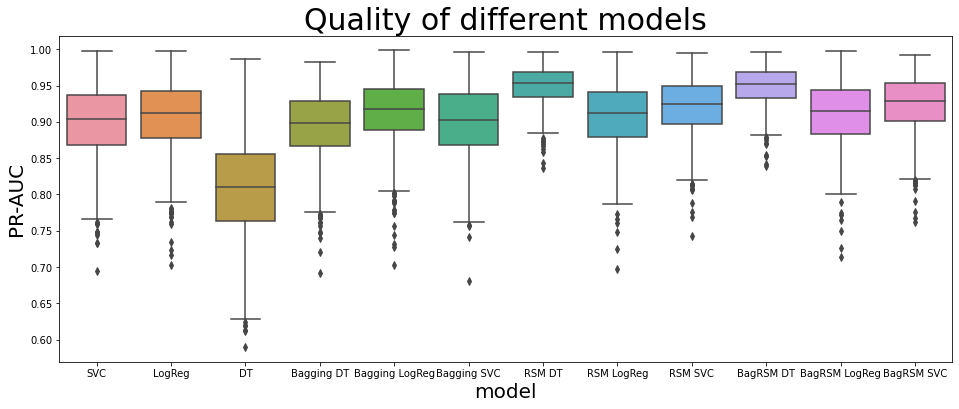

In [128]:
results = pd.DataFrame(boot_scores)
# cast to long format
results = results.melt(value_vars=results.columns,
                       value_name="prauc", 
                       var_name="model") 

plt.figure(figsize=(16,6))
sns.boxplot(data=results, y="prauc", x="model")
plt.xlabel("model", size=20)
plt.ylabel("PR-AUC", size=20)
plt.title("Quality of different models", size=30)

Видим, что, опять же, существенное улучшение качества наблюддается только, когда в качестве базовой модели мы используем дерево. 

Мы говорили о том, что важное требование того, чтобы простое голосование работало - чтобы ошибки моделей не коррелировали между собой. 

Попробуем оценить попарную коррелляцию в ошибках базовых моделей в наших ансамблях. 

In [129]:
import itertools
def base_model_pair_correlation(ensemble, X):
    corrs = []
    for (i, est1), (j, est2) in itertools.combinations(enumerate(ensemble.estimators_), 2):
        Xi_test = X.values[:, ensemble.estimators_features_[i]]
        Xj_test = X.values[:, ensemble.estimators_features_[j]]
        
        
        if not isinstance(est1, sklearn.svm.SVC): 
            ypred_t1 = est1.predict_proba(Xi_test)[:, 1]
            
            ypred_t2 = est2.predict_proba(Xj_test)[:, 1]
        else:
            ypred_t1 = est1.decision_function(Xi_test)
            Xj_test = X_test.values[:, ensemble.estimators_features_[j]]
            ypred_t2 = est2.decision_function(Xj_test)
        corrs.append(scipy.stats.pearsonr(ypred_t1, ypred_t2)[0])
    return np.array(corrs)

In [130]:
pair_correlations = {}
for name, model in models.items():
    if not "Bagging" in name and not "RSM" in name:
        continue
    pair_correlations[name] = base_model_pair_correlation(model, X_test)

In [131]:
cor_res = pd.DataFrame(pair_correlations)
cor_res = cor_res.melt(value_vars=cor_res.columns,
                       value_name="paircor", 
                       var_name="model") 

Кроме этого, давайте посчитаем качество базовых моделей, входящих в каждый из ансамблей:

In [132]:
def base_model_prauc(ensemble, X, y):
    qual = np.zeros(ensemble.n_estimators)
    for ind, est in enumerate(ensemble.estimators_):
        X_test= X.values[:, ensemble.estimators_features_[i]]
        if not isinstance(est, sklearn.svm.SVC):
            y_pred = est.predict_proba(X_test)[:, 1]
        else:
            y_pred = est.decision_function(X_test)
        qual[ind] = average_precision_score(y_score=y_pred, y_true=y)
    return qual

In [133]:
base_prauc = {}
for name, model in models.items():
    if not "Bagging" in name and not "RSM" in name:
        continue
    base_prauc[name] = base_model_prauc(model, X_test, y_test)

In [134]:
base_prauc_res = pd.DataFrame(base_prauc)
base_prauc_res = base_prauc_res.melt(value_vars=base_prauc_res.columns,
                       value_name="prauc", 
                       var_name="model") 

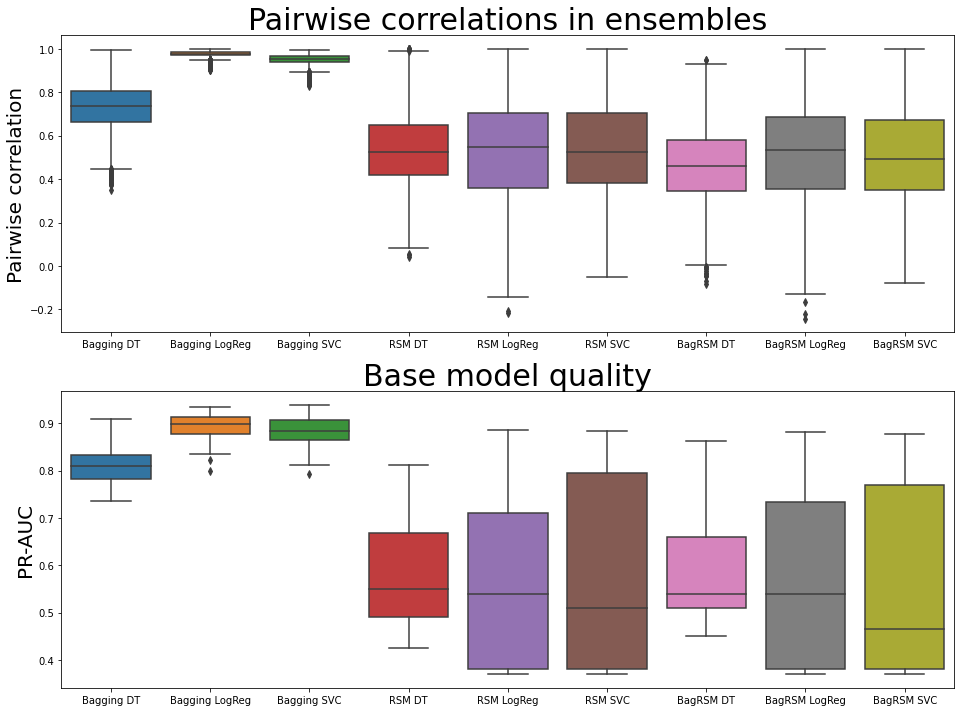

In [136]:
plt.figure(figsize=(16,12))
plt.subplot(211)
sns.boxplot(data=cor_res, y="paircor", x="model")
plt.title("Pairwise correlations in ensembles", size=30)
plt.xlabel("", size=20)
plt.ylabel("Pairwise correlation", size=20)

plt.subplot(212)
sns.boxplot(data=base_prauc_res, y="prauc", x="model")
plt.title("Base model quality", size=30)
plt.xlabel("", size=20)
plt.ylabel("PR-AUC", size=20)
plt.subplots_adjust()
plt.show()

Какие можно сделать выводы из предложенных графиков?

1. Bagging, RSM и их комбинация помогают уменьшать корреляцию между базовыми моделями. Причем, комбинация Bagging и RSM работают лучшее, чем каждый из них поодиночке;
2. В случае просто Bagging дерево решений получает существенный прирос качества за счет того, что модели на его основе коррелированы значительно слабее, нежели модели на основе логистической регрессии и машины опорных векторов;
3. В остальных случаях корреляция моделей на основе деревьев решений все равно немного ниже, чем у других моделей, при этом качество базовых моделей сравнимо. Из-за этого, опять же, ансамбль на основе дерева решений показывает лУчший результат.

## Случайный лес<a class="anchor" style="autocontent" id="Случайный-лес"/><br>

Из предыдущегй части мы увидели, что использование bagging или RSM для SVM или подобных моделей не несет большого смысла. 

И если использовать bagging или RSM для SVM, то значимого улучшения качества не будет. 

Но для деревьев решений это не так. Будем брать деревья большой глубины.  Незначительные изменения в данных приводят к значительным  изменением в топологии таких деревьев. Таким образом мы приходим к **случайному лесу** = Bagging + RSM над деревом решений.

При этом RSM в классическом случайном лесе делается не на уровне дерева , а на уровне узла. В каждом узле дерева, когда мы выбираем лучшее разбиение его на два дочерних, мы просматриваем не все признаки, а только определенное их количество. 

<img src ="https://edunet.kea.su/repo/src/L03_Classic_ML/img/p/random_forest.png" width="700">


Обычно случайный лес работает лучше, чем отдельно случайно взятое дерево. Но главное - случайный лес намного более устойчив к шуму. 
Оказывается, что это свойство до сих пор позволяет случайному лесу успешно использоваться в областях с шумными данными. Например, в биологии. 

### Зависимость качества случайного леса от числа деревьев<a class="anchor" style="autocontent" id="Зависимость-качества-случайного-леса-от-числа-деревьев"/><br> 
Для случайного леса верно следующее: когда мы берем множество базовых классификаторов (в данном случае деревьев) и усредняем их, то результат этих усреднений стремится к идеальному дереву решений. Причем построенному на идеальных, а не на исходных признаках. 

Посмотрим, действительно ли это так. Для того, чтобы не пересчитывать случайный лес для каждого числа деревьев решений, обучим один случайный лес с 1000 деревьев решений, а леса с меньшим числом решений будем 

И будем работать с для разнообразия — с задачей регрессии. Задача — предсказать цену на дом.

In [137]:
calif_housing = sklearn.datasets.fetch_california_housing()
X = calif_housing.data
y = calif_housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

И напишем функцию, которая будет автоматически обучать переданные ей модели и считать для них качество на тесте. Чтобы избавиться от необходимости копировать код между ячейками:

In [138]:
from sklearn.metrics import mean_squared_error
def train_and_test_regressor(models, X_train, y_train, X_test, y_test):
    for name, model in models.items():
        print(f"Fitting {name}")
        model.fit(X_train, y_train)
    predictions = {}
    for name, model in models.items():
        y_pred = model.predict(X_test)
        predictions[name] = y_pred
        
    boot_scores = {}

    for name, y_pred in predictions.items():
        print(f"Calculating bootstrap score for {name}")
        boot_score = bootstrap_metric(y_test, 
                                       y_pred, 
                                       metric_fn=lambda x, y: mean_squared_error(y_true=x, 
                                                                                      y_pred=y))
        boot_scores[name] = boot_score
        
    
    results = pd.DataFrame(boot_scores)
    # cast to long format
    results = results.melt(value_vars=results.columns,
                       value_name="mse", 
                       var_name="model") 
    return results
    

In [139]:
from sklearn.ensemble import RandomForestRegressor
models_rf = {}

models_rf['DT'] =  GridSearchCV(DecisionTreeRegressor(), 
                          {'max_depth':[1, 3, 5, 7, 10],
                           'min_samples_leaf': [1, 3, 5, 10]} 
                     )# add single decision tree for comparison

# this can be done faster, see warm_start parameter for this
# (https://stackoverflow.com/questions/42757892/how-to-use-warm-start)
for n_estimators in [3, 5, 10, 50, 100, 150, 250]:
    models_rf[f"RF{n_estimators}"] = RandomForestRegressor(n_estimators=n_estimators,
                                                           random_state=42, 
                                                           n_jobs=-1) # run in parallel

# Trainig models
results_rf = train_and_test_regressor(models_rf, X_train, y_train, X_test, y_test)

Fitting DT
Fitting RF3
Fitting RF5
Fitting RF10
Fitting RF50
Fitting RF100
Fitting RF150
Fitting RF250
Calculating bootstrap score for DT
Calculating bootstrap score for RF3
Calculating bootstrap score for RF5
Calculating bootstrap score for RF10
Calculating bootstrap score for RF50
Calculating bootstrap score for RF100
Calculating bootstrap score for RF150
Calculating bootstrap score for RF250


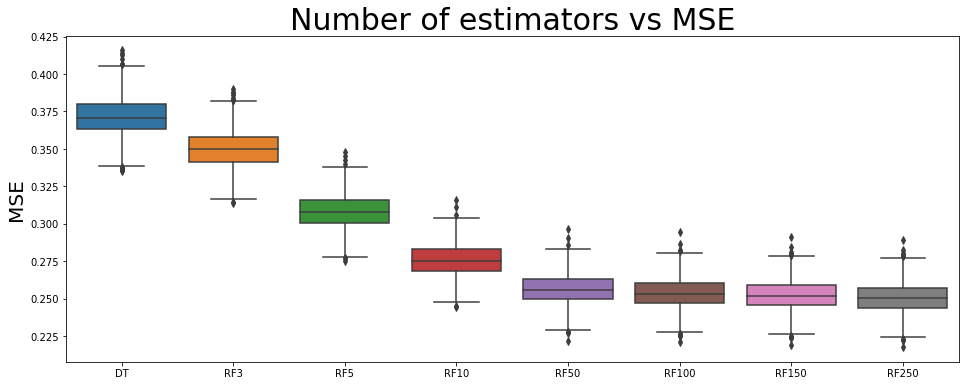

In [143]:
plt.figure(figsize=(16,6))
sns.boxplot(data=results_rf, y="mse", x="model")
plt.xlabel("", size=20)
plt.ylabel("MSE", size=20)
plt.title("Number of estimators vs MSE", size=30)
plt.show()

Видим, что действительно, с какого-то моомента число качество модели почти не изменяется, увеличение числа базовых классифакторов как минимум не ухудшает ее качество.

### Зависимость качества случайного леса от глубины дерева<a class="anchor" style="autocontent" id="Зависимость-качества-случайного-леса-от-глубины-дерева"/><br>

Мы уже обсуждали, что чем больше глубина дерева, тем большая нескорелированность базовых моделей будет получаться. По идее, в случайном лесе важно использовать именно глубокие деревья, причем, в большинстве случаев их глубину не надо ограничивать (или ограничивать большими значениями порядка 10-12). Проверим это. 

Кроме этого, будем добавлять кроме случайного леса с заданной глубиной еще одиночное дерево такой же глубины

In [144]:
models_depth = {}

for depth in [1, 3, 5, 7, 9, 11, 13, None]:

    models_depth[f"DT_depth{depth}"] = DecisionTreeRegressor(max_depth=depth,
                                                             random_state=42)
    
    models_depth[f"RF_depth{depth}"] = RandomForestRegressor(n_estimators=100,
                                                             max_depth=depth,
                                                             random_state = 42, 
                                                             n_jobs=-1) # run in parallel

# Trainig models
results_depth = train_and_test_regressor(models_depth, X_train, y_train, X_test, y_test)

Fitting DT_depth1
Fitting RF_depth1
Fitting DT_depth3
Fitting RF_depth3
Fitting DT_depth5
Fitting RF_depth5
Fitting DT_depth7
Fitting RF_depth7
Fitting DT_depth9
Fitting RF_depth9
Fitting DT_depth11
Fitting RF_depth11
Fitting DT_depth13
Fitting RF_depth13
Fitting DT_depthNone
Fitting RF_depthNone
Calculating bootstrap score for DT_depth1
Calculating bootstrap score for RF_depth1
Calculating bootstrap score for DT_depth3
Calculating bootstrap score for RF_depth3
Calculating bootstrap score for DT_depth5
Calculating bootstrap score for RF_depth5
Calculating bootstrap score for DT_depth7
Calculating bootstrap score for RF_depth7
Calculating bootstrap score for DT_depth9
Calculating bootstrap score for RF_depth9
Calculating bootstrap score for DT_depth11
Calculating bootstrap score for RF_depth11
Calculating bootstrap score for DT_depth13
Calculating bootstrap score for RF_depth13
Calculating bootstrap score for DT_depthNone
Calculating bootstrap score for RF_depthNone


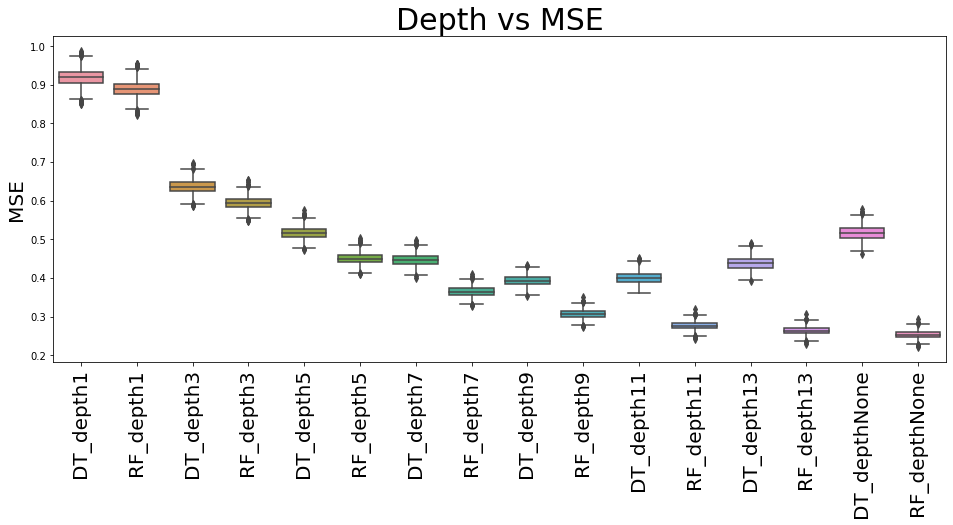

In [145]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(data=results_depth, y="mse", x="model")
plt.setp(ax.get_xticklabels(), rotation=90)
plt.xlabel("", size=20)
plt.ylabel("MSE", size=20)
plt.title("Depth vs MSE", size=30)
plt.xticks(size=20)
plt.show()

Действительно, в данном случае модель без ограничения на глубину дерева показывает наилучшие результаты. 
Модель же с малой глубиной дерева работает сильно хуже. 

Качество случайного леса с малой глубиной дерева не отличается от качества одиночного дерева той же глубины. Опять же, деревья малой глубины слабо отличаются друг от друга, потому усреднение их предсказаний не дает почти никакого выигрыша.

Стоит все же отметить, что в случае малых выборок, назначительные ограничения на глубину дерева могут дать выигрыш.


### Минимальное число объектов в листе<a class="anchor" style="autocontent" id="Минимальное-число-объектов-в-листе."/><br>
Так же иногда качество дополнительно улучшается, если поставить небольшое ограничение на минимальное число объектов в листе, чтобы запретить явно переобученные деревья.

In [146]:
models_min_samples= {}

for mn_sm in [1, 3, 5, 7, 10]:

    models_min_samples[f"DT_mnsamples{mn_sm}"] = DecisionTreeRegressor(max_depth=None,
                                                            min_samples_leaf=mn_sm,
                                                            random_state=42)
    
    models_min_samples[f"RF_mnsamples{mn_sm}"] = RandomForestRegressor(n_estimators=100,
                                                            max_depth=None,
                                                            min_samples_leaf=mn_sm,
                                                            random_state=42, 
                                                            n_jobs=-1) # run in parallel

# Trainig models
results_mn_samples = train_and_test_regressor( models_min_samples, X_train, y_train, X_test, y_test)

Fitting DT_mnsamples1
Fitting RF_mnsamples1
Fitting DT_mnsamples3
Fitting RF_mnsamples3
Fitting DT_mnsamples5
Fitting RF_mnsamples5
Fitting DT_mnsamples7
Fitting RF_mnsamples7
Fitting DT_mnsamples10
Fitting RF_mnsamples10
Calculating bootstrap score for DT_mnsamples1
Calculating bootstrap score for RF_mnsamples1
Calculating bootstrap score for DT_mnsamples3
Calculating bootstrap score for RF_mnsamples3
Calculating bootstrap score for DT_mnsamples5
Calculating bootstrap score for RF_mnsamples5
Calculating bootstrap score for DT_mnsamples7
Calculating bootstrap score for RF_mnsamples7
Calculating bootstrap score for DT_mnsamples10
Calculating bootstrap score for RF_mnsamples10


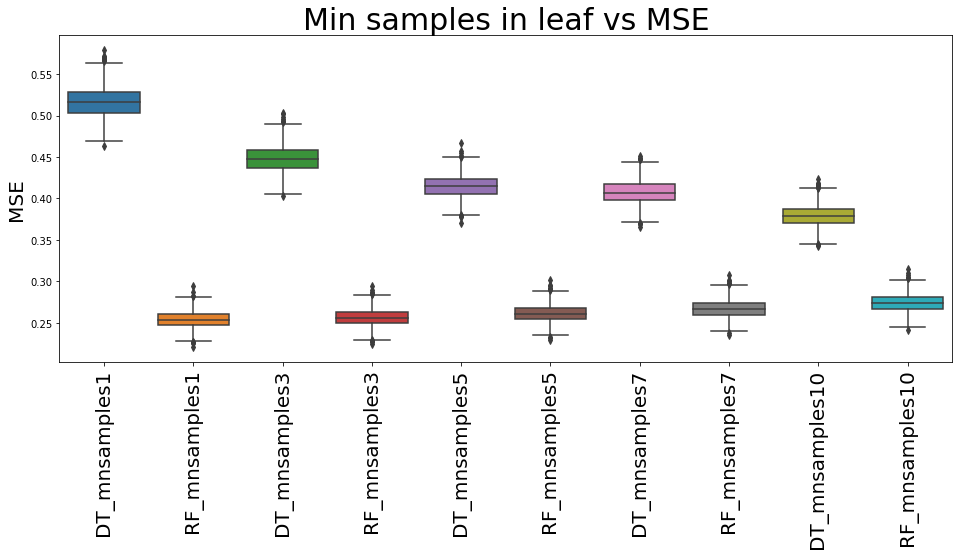

In [147]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(data=results_mn_samples, y="mse", x="model")
plt.setp(ax.get_xticklabels(), rotation=90)
plt.xlabel("", size=20)
plt.ylabel("MSE", size=20)
plt.title("Min samples in leaf vs MSE", size=30)
plt.xticks(size=20)
plt.show()

В данном случае, однако, мы это не наблюдаем. Более того, опять же, с увеличением числа ограничений на дерево, падает непохожесть деревьев друг на друга и качество случайного леса так же начинает падать.

### Переобучается ли случайный лес?<a class="anchor" style="autocontent" id="Переобучается-ли-случайный-лес?"/><br>

Существует мнение, что случайный лес не переобучается. Это не так. Можно подобрать такие два набора параметров, что первый дает лучше качество на тренировочной выборке, а второй — на тестовой. При этом увеличение числа деревьев в ансамбле с этим справиться поможет слабо.

Возьмем, к примеру, наш игрушечный пример на плоскости.

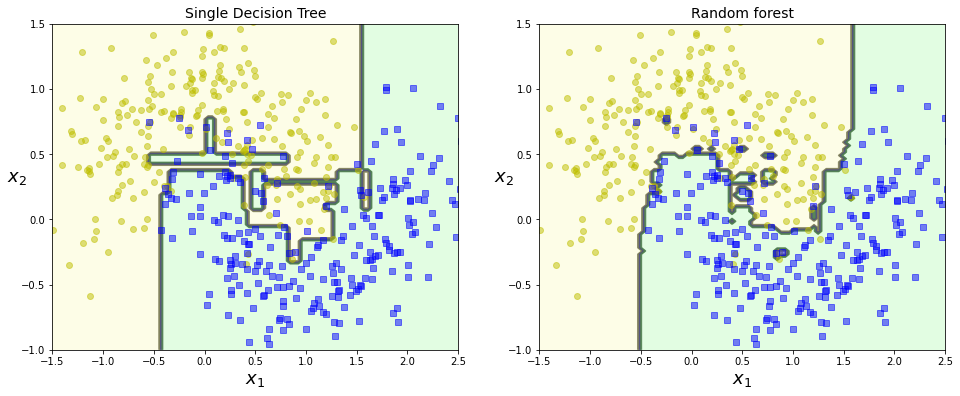

In [148]:
from sklearn.ensemble import RandomForestClassifier

X, y = sklearn.datasets.make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
plt.figure(figsize=(16,6))
plt.subplot(121)

clf = DecisionTreeClassifier(max_depth = 10, random_state = 42)
clf.fit(X_train, y_train)
plot_decision_boundary(clf, X, y)
plt.title("Single Decision Tree", fontsize=14)


plt.subplot(122)
rf = RandomForestClassifier(n_estimators=1000) 
rf.fit(X_train, y_train)
plot_decision_boundary(rf, X, y)
plt.title("Random forest", fontsize=14)
plt.show()

Очевидно видны области, в которых случайный лес переобучился.

Добавление ограничение на число объектов в листьях улучшает ситуацию.

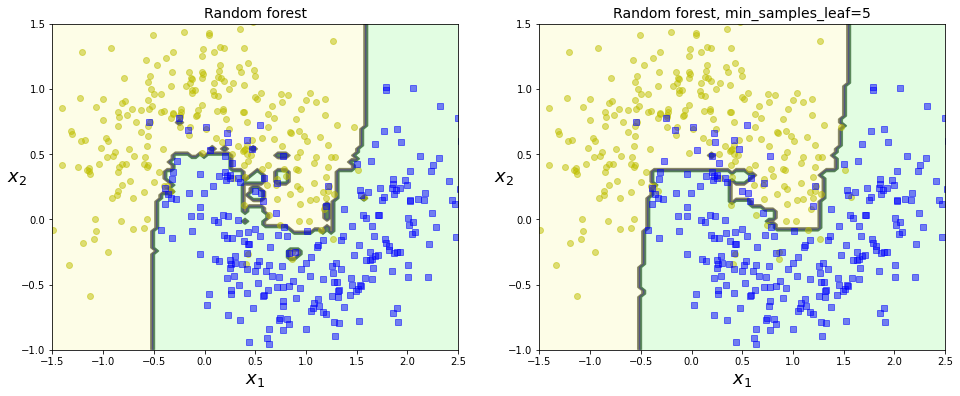

In [149]:
plt.figure(figsize=(16,6))

plt.subplot(121)
rf1 = RandomForestClassifier(n_estimators=1000) 
rf1.fit(X_train, y_train)
plot_decision_boundary(rf1, X, y)
plt.title("Random forest", fontsize=14)

plt.subplot(122)
rf2 = RandomForestClassifier(n_estimators=1000, min_samples_leaf=5) 
rf2.fit(X_train, y_train)
plot_decision_boundary(rf2, X, y)
plt.title("Random forest, min_samples_leaf=5", fontsize=14)
plt.show()

Сравним качество на трейне — у первого леса оно больше, в то время как на тесте лучше качество у второго дерева.

In [150]:
y_score = rf1.predict(X_train)
q = average_precision_score(y_true=y_train, y_score=y_score)
print(f"RF1 Train: {q:.02}")
y_score = rf1.predict(X_test)
q = average_precision_score(y_true=y_test, y_score=y_score)
print(f"RF1 Test: {q:.02}")
      
y_score = rf2.predict(X_train)
q = average_precision_score(y_true=y_train, y_score=y_score)
print(f"RF2 Train: {q:.02}")
y_score = rf2.predict(X_test)
q = average_precision_score(y_true=y_test, y_score=y_score)
print(f"RF2 Test: {q:.02}")

RF1 Train: 1.0
RF1 Test: 0.87
RF2 Train: 0.91
RF2 Test: 0.91


### Случайный лес и bias-variance tradeoff<a class="anchor" style="autocontent" id="Случайный-лес-и-variance"/><br>
Случайный лес - инструмент для уменьшения variance нашей модели. Можно показать, что при стремлении числа моделей в ансамбле к бесконечности, а их коррелированности - к 0, variance ансамбля стремится к нулю. Однако при этом bias ансамбля будет равен bias базовой модели 

Продемонстрируем это

([], [])

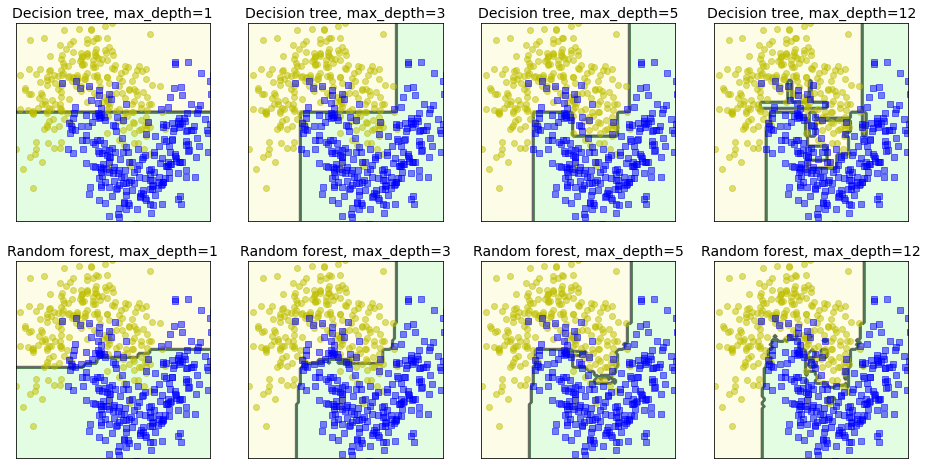

In [152]:
plt.figure(figsize=(16,8))

plt.subplot(241)
dt1 = DecisionTreeClassifier(max_depth=1) 
dt1.fit(X_train, y_train)
plot_decision_boundary(dt1, X, y)
plt.xticks([], [])
plt.yticks([], [])
plt.title("Decision tree, max_depth=1", fontsize=14)
plt.xlabel("")
plt.ylabel("")
plt.xticks([], [])
plt.yticks([], [])

plt.subplot(242)
dt3 = DecisionTreeClassifier(max_depth=3) 
dt3.fit(X_train, y_train)
plot_decision_boundary(dt3, X, y)
plt.title("Decision tree, max_depth=3", fontsize=14)
plt.xlabel("")
plt.ylabel("")
plt.xticks([], [])
plt.yticks([], [])

plt.subplot(243)
dt5 = DecisionTreeClassifier(max_depth=5) 
dt5.fit(X_train, y_train)
plot_decision_boundary(dt5, X, y)
plt.title("Decision tree, max_depth=5", fontsize=14)
plt.xlabel("")
plt.ylabel("")
plt.xticks([], [])
plt.yticks([], [])

plt.subplot(244)
dt12 = DecisionTreeClassifier(max_depth=12) 
dt12.fit(X_train, y_train)
plot_decision_boundary(dt12, X, y)
plt.title("Decision tree, max_depth=12", fontsize=14)
plt.xlabel("")
plt.ylabel("")
plt.xticks([], [])
plt.yticks([], [])

plt.subplot(245)
rf1 = RandomForestClassifier(max_depth=1, n_estimators=500, n_jobs=-1) 
rf1.fit(X_train, y_train)
plot_decision_boundary(rf1, X, y)
plt.title("Random forest, max_depth=1", fontsize=14)
plt.xlabel("")
plt.ylabel("")
plt.xticks([], [])
plt.yticks([], [])

plt.subplot(246)
rf3 = RandomForestClassifier(max_depth=3, n_estimators=500, n_jobs=-1) 
rf3.fit(X_train, y_train)
plot_decision_boundary(rf3, X, y)
plt.title("Random forest, max_depth=3", fontsize=14)
plt.xlabel("")
plt.ylabel("")
plt.xticks([], [])
plt.yticks([], [])

plt.subplot(247)
rf5 = RandomForestClassifier(max_depth=5, n_estimators=500, n_jobs=-1) 
rf5.fit(X_train, y_train)
plot_decision_boundary(rf5, X, y)
plt.title("Random forest, max_depth=5", fontsize=14)
plt.xlabel("")
plt.ylabel("")
plt.xticks([], [])
plt.yticks([], [])

plt.subplot(248)
rf12 = RandomForestClassifier(max_depth=12, n_estimators=500, n_jobs=-1) 
rf12.fit(X_train, y_train)
plot_decision_boundary(rf12, X, y)
plt.title("Random forest, max_depth=12", fontsize=14)
plt.subplots_adjust()
plt.xlabel("")
plt.ylabel("")
plt.xticks([], [])
plt.yticks([], [])

Видим, что общая сложность решающей границы меняется не сильно - bias случайного леса по сравнению с bias дерева решений не меняется. 
А вот гладкость границы увеличивается, тем самым, уменьшается variance

## Взвешенное голосование<a class="anchor" style="autocontent" id="Взвешенное-голосование"/><br>


$$ h(x) = \sum_i b_i a_i (x) $$

<img src ="https://edunet.kea.su/repo/src/L03_Classic_ML/img/p/weighted_democracy.jpeg" width="500">


Не все модели предсказывают что-то одинаково хорошо. В случайном лесе у нас были деревья решений, которые мы обучали на равнозначных выборках, поэтому могли усреднять их предсказания. 

Теперь представим, что у нас есть нейросеть, которую мы обучали на огромной выборке, есть линейная модель, которую мы учили на 200 объектах, есть случайный лес, который мы учили на выборке с множеством пропущенных признаков. Очевидно, что эти модели будут давать разное качество. 

Разумно эти модели учитывать с каким-то весом класса. На основе этого построен метод под названием boosting.


## Boosting<a class="anchor" style="autocontent" id="Boosting"/><br>

Вы наверняка слышали о нем, потому что градиентный boosting — предмет большого количества мемов про машинное обучение, потому что он помогает получить решение, которое сложно побить другими видами моделей.

В то время как случайный лес представлял собой попытку стрелять по мишени много раз в надежде, что в среднем мы попадем в нее попадем, идея бустинга больше похожа на игру в гольф. Пусть каждая модель будет представлять собой один слабенький удар клюшкой. А последующие удары — будут корректировать результаты этого удара, постепенно приближаясь к лунке. 

<img src ="https://edunet.kea.su/repo/src/L03_Classic_ML/img/p/bag_vs_boost.png" width="900">


 

Бустинг позволяет нам на основе большого числа слабых моделей получить одну сильную. Опять же, в качестве модели используется дерево решений, но не большой высоты, а наоборот, маленькой. Чтобы оно само по себе в принципе не могло выучить выборку хорошо. 

<img src ="https://edunet.kea.su/repo/src/L03_Classic_ML/img/p/learners.png" width="700">


Цель i-й модели в ансамбле — скорректировать ошибки предыдущих i-1 моделей. В результате, когда мы суммируем вклады всех моделей ансамбля, получается хорошее предсказание.

<img src ="https://edunet.kea.su/repo/src/L03_Classic_ML/img/p/golf-MSE-gbm.png" width="700">


## AdaBoost (Freund & Schapire, 1996)<a class="anchor" style="autocontent" id="AdaBoost-(Freund-&-Schapire,-1996)"/><br>
Первый бустинг был предложен Фреундом и назывался AdaBoost. На нем легче всего объяснить всю идею бустинга.



Допустим, у нас есть выборка (плюсы и минусы). Мы хотим различать их между собой. Назначим вес каждому плюсу и минусу. Важно классифицировать их одинаково, поэтому их вес=1÷N, где N — число (суммарный объект).

<img src ="http://edunet.kea.su/repo/src/L03_Classic_ML/img/L03_Classic_ML-55.png" width="450">


Построим первый предсказатель. 

<img src ="https://edunet.kea.su/repo/src/L03_Classic_ML/img/p/boost1.png" >

Он классифицировал объекты плохо, но лучше, чем если бы он это делал случайно. Некоторые объекты он определил верно, а на некоторых (три плюса) ошибся. 

Тогда мы скажем, что эти плюсы важнее, чем все остальное, потому что на них мы уже научились всё предсказывать. 
Дальше обучим еще одну модель на той же выборке, но скажем, что эти плюсы важнее, чем все остальное ообъекты.

<img src ="https://edunet.kea.su/repo/src/L03_Classic_ML/img/p/boost2.png" >


 Новая модель будет ошибаться уже на минусах. Добавляем веса этим минусам. 

<img src ="https://edunet.kea.su/repo/src/L03_Classic_ML/img/p/boost3.png" >

Строим еще один классификатор, который правильно классифицирует важные для нас объекты, а на неважные не обращают внимания. Получилось три классификатора, которые по-разному ошибаются на обучающей выборке.

Но если сложить эти классификаторы с правильными весами, которые можно подсчитать по специальной формуле, то полученная модель будет решать нашу задачу классификации идеально

<img src ="https://edunet.kea.su/repo/src/L03_Classic_ML/img/p/boost4.png" >



### Переобучается ли AdaBoost?<a class="anchor" style="autocontent" id="Переобучается-ли-AdaBoost?"/><br>
Сложился миф о том, что он не переобучается. На самом деле это нет так, просто когда он появился, для переобучения не хватало вычислительных мощностей (нужно сделать много итераций, чтобы переобучение увидеть).

Но у него было интересное свойство, которое унаследовали все последующие бустинги: вы можете идеально выучить обучающую выборку, но при этом вы добавляете новые деревья, и качество на тестовой выборке становится лучше. Это обусловлено тем, что каждое последующее дерево, которое мы добавляем, уточняет границу разделения, делает ее более плавной, и это зачастую помогает нашему классификатору. 


<img src ="https://edunet.kea.su/repo/src/L03_Classic_ML/img/p/learn_then_train0.png" width="500">


### Применимость AdaBoost<a class="anchor" style="autocontent" id="Применимость-AdaBoost"/><br>
AdaBoost реализован в sklearn и он может использовать в качестве базовой любую модель, которая умеет работать с весами объектов в выборке. 

На данный момент, тем не менее, AdaBoost уступил место градиентному бустингу и почти не используется. 
Мы обсудили его в образовательных целях — на нем легче всего понять основную идею бустинга.

## Gradient boosting (градиентный бустинг)<a class="anchor" style="autocontent" id="Gradient-boosting-(градиентный-бустинг)"/><br>

Создатель продолжения AdaBoost — градиентного бустинга —  Leo Breiman заметил, что бустинг можно рассматривать как итеративную минимизацию некой целевой функции ошибки. 

Как нейронные сети в ходе своего обучения, так и бустинг (с помощью добавленных слабых моделей) минимизируют функции ошибки.

<img src ="https://edunet.kea.su/repo/src/L03_Classic_ML/img/p/gradient_descent.png" width="650">


Как он их минимизирует? Точно также, как нейронная сеть. Он использует градиентный спуск. 
Можно сделать следующее: у нас есть исходное приближение. Мы как-то ошибаемся. Считаем градиент ошибки, дальше пытаемся его аппроксимировать. Делаем новое приближение. Опять как-то ошибаемся — и повторяем все еще и еще. 

Для объекта из тестовой выборки:

 1. Первая модель обеспечивает нам исходное приближение.
 2. Вторая модель пытается предсказать градиент ошибки. Зная градиент ошибки для тестового объекта, мы можем эту ошибку уменьшить, получив новое приближение.
 3. Третья модель пытается предсказать градиент ошибки нового приближения. Опять, зная его можем получить еще одно, более точное приближение.
 4. Повторяем, пока не пройдем все N моделей.

Оказывается, такой подход позволяет достигать state-of-the art результатов при работе с табличными данными.

Например, запустим градиентный бустинг "почти" от балды:

In [153]:
X = calif_housing.data
y = calif_housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [155]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

models = {}
models['RF'] = RandomForestRegressor(n_estimators=250,  # for better result set to 1000
                                     max_depth=None, 
                                     min_samples_leaf=1, 
                                     n_jobs=-1, 
                                     random_state=42)
models['LinReg'] = LinearRegression(normalize=True)
models['GradientBoostingRegressor'] = GradientBoostingRegressor(learning_rate=0.1, # for better result set to 0.05
                                                                n_estimators=250, # for better result set to 1000
                                                                random_state=42)

# Training models
results_boost = train_and_test_regressor(models, X_train, y_train, X_test, y_test)

Fitting RF
Fitting LinReg
Fitting GradientBoostingRegressor
Calculating bootstrap score for RF
Calculating bootstrap score for LinReg
Calculating bootstrap score for GradientBoostingRegressor


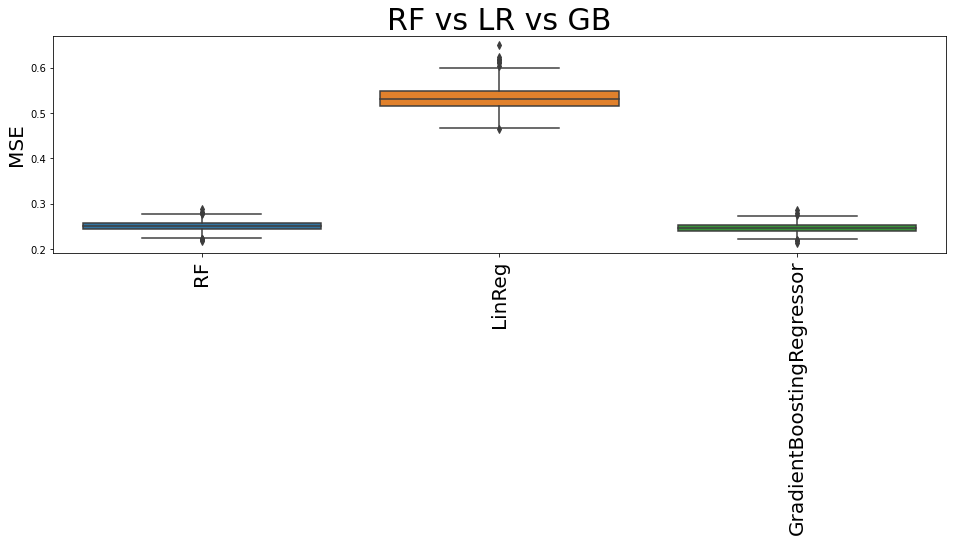

In [159]:
plt.figure(figsize=(16,4))
ax = sns.boxplot(data=results_boost , y="mse", x="model")
plt.setp(ax.get_xticklabels(), rotation=90)
plt.xlabel("", size=20)
plt.ylabel("MSE", size=20)
plt.title("RF vs LR vs GB", size=30)
plt.xticks(size=20)
plt.show()

Видим, что сходу мы побили случайный лес и линейную регрессию. 

### Переобучение<a class="anchor" style="autocontent" id="Переобучение"/><br>

В то же время, **Gradient boosting**, в отличии от случайного леса, может сильно переобучиться. Это важно понимать. Для небольших датасетов часто может оказаться, что случайный лес дает более надежные результаты. 

<img src ="https://edunet.kea.su/repo/src/L03_Classic_ML/img/p/boost_overfitting.png" width="500">





In [157]:
gbtree = GradientBoostingRegressor(n_estimators=300, 
                                   learning_rate=1 # faster learning rate to force ovefitting
                                   )
gbtree.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Используем метод, который есть во многих реализациях бустинга в том или ином виде — staged_predict, который получать предсказание от первых i деревьев ансамбля, что позволяет быстро строить график качества градиентного бустинга в зависимости от числа базовых моделей:

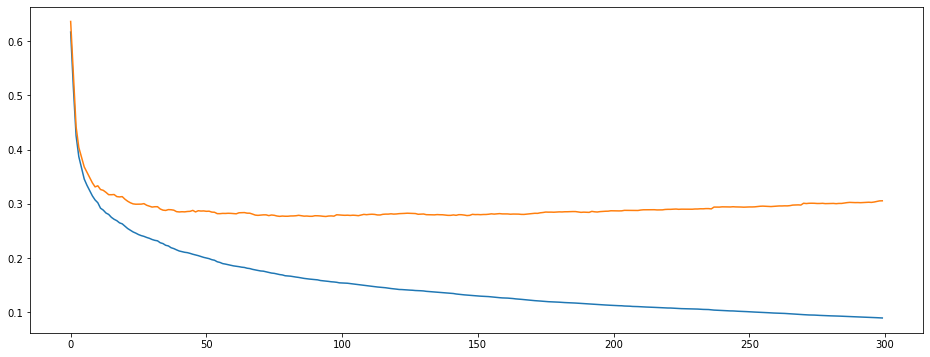

In [158]:
error_train = []
error_test = []
for it, (y_train_pred, y_test_pred) in enumerate(zip(gbtree.staged_predict(X_train), 
                                                     gbtree.staged_predict(X_test))):
    ertr = mean_squared_error(y_true=y_train, y_pred=y_train_pred)
    error_train.append(ertr)
    erte = mean_squared_error(y_true=y_test, y_pred=y_test_pred)
    error_test.append(erte)
    

plt.figure(figsize=(16,6))
plt.plot(error_train)
plt.plot(error_test)

Здесь мы *немного* схитрили, сильно увеличив learning rate нашей модели — дополнительный множитель к весу, с которым добаляются в нее новые модели. Из-за этого даже на таком простом датасете мы в состоянии увидеть явное переобучение. 

Давайте об этом learning rate и поговорим.


### Shrinkage (learning rate)<a class="anchor" style="autocontent" id="Shrinkage-(learning-rate)"/><br>

Как у градиентного спуска есть learning rate, который определяет силу каждого нашего следующего шага,  так и у градиентного бустинга есть параметр, который называется shrinkage или learning rate — это дополнительный параметр, на который мы домножаем вес, с которым мы добавляем новые модели в ансамбль. 


Мы не хотим сильно скакать по пространству решений, мы хотим спускаться медленно и сойтись к какому-то хорошему минимуму. Потому мы берем и вес каждой модели, которую мы рассчитываем по специальному алгоритму, еще домножаем на маленький коэффициент, который называется shrinkage или learning rate. Фактически мы берем и умножаем градиент на некий альфа (это то же, что было в градиентном спуске, ничего нового мы не добавили).

Если не домножать вес каждой модели дополнительно на этот параметр, то мы можем попасть в ситуацию, которая будем пролетать мимо минимума функции ошибки (та же опасность, что и в обычном градиентном спуске).

<img src ="https://edunet.kea.su/repo/src/L03_Classic_ML/img/p/bad_descent.png" width="800">




Как и в случае с градиентным спуском, **learning rate** влияет не только на то, как быстро мы станем переобучаться, но и на глубину минимума, который мы найдем.

In [160]:
# here anb below in the cell can be set to 1000 for better visualization
gbtree1 = GradientBoostingRegressor(n_estimators=500, learning_rate=1)
gbtree1.fit(X_train, y_train)

gbtree2 = GradientBoostingRegressor(n_estimators=500, learning_rate=0.5)
gbtree2.fit(X_train, y_train)

gbtree3 = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1)
gbtree3.fit(X_train, y_train)

gbtree4 = GradientBoostingRegressor(n_estimators=500, learning_rate=0.05)
gbtree4.fit(X_train, y_train)

gbtree4 = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01)
gbtree4.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

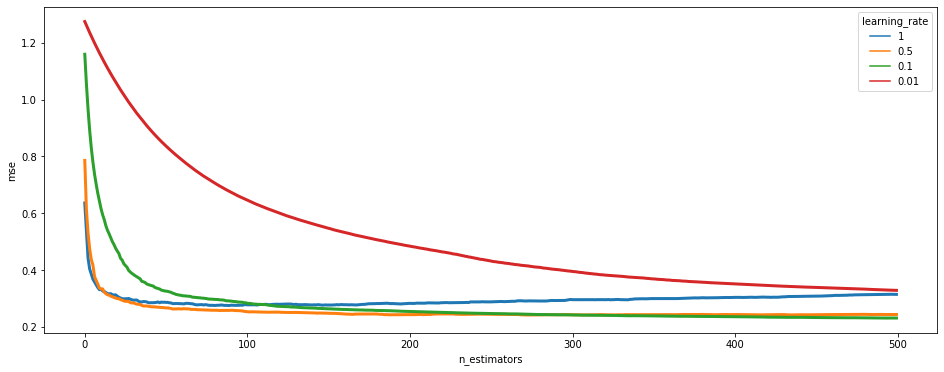

In [162]:
lr = []
step = []
mse = []
for gb_tree in (gbtree1, gbtree2, gbtree3, gbtree4):
    
    for it, y_test_pred in enumerate(gb_tree.staged_predict(X_test)):

        erte = mean_squared_error(y_true=y_test, y_pred=y_test_pred)
        mse.append(erte)
        lr.append(str(gb_tree.learning_rate))
        step.append(it)

df = pd.DataFrame({"learning_rate":lr, 
                   "n_estimators": step,
                   "mse": mse})

plt.figure(figsize=(16,6))
sns.lineplot(data=df, x='n_estimators', y='mse', hue='learning_rate', lw=3)

В данном случае мы видим, что значение learning rate, установленного по-умолчанию, позволяет получить наименьшую ошибку на валидации. 
В то же время слишком большие значения learning rate (1 и 0.5) привоят к тому, что мы не достигаем таких глубоких минимумов и, более того, начинаем переобучаться. 
При этом слишком маленькое значение learning rate может привести к тому, что нам понадобится очень большое число деревьев, чтобы достигнуть минимума (если мы его вообще достигнем).

### Число деревьев в ансамбле<a class="anchor" style="autocontent" id="Число-деревьев-в-ансамбле"/><br>

Число деревьев, как было видно из предыдущего графика, зависит от установленного learning rate. 
Потому обычно ставят learning_rate равным 0.1 и подбирают оптимальное значение числа деревьев в ансамбле.
Делают это на кросс-валидации, но для экономии времени просто дополнительно разобьем train датасет:

In [163]:
X_learn, X_valid, y_learn, y_valid = train_test_split(X_train, y_train, random_state=42)

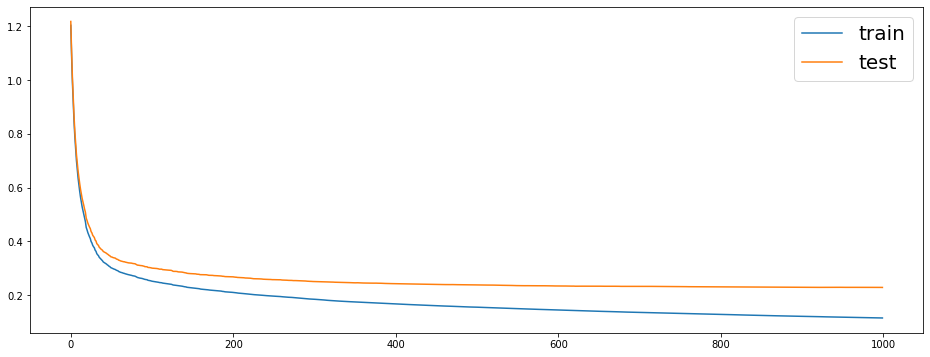

In [164]:
gbtree = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1)
gbtree.fit(X_learn, y_learn)

error_train = []
error_test = []
for it, (y_learn_pred, y_valid_pred) in enumerate(zip(gbtree.staged_predict(X_learn), 
                                                     gbtree.staged_predict(X_valid))):
    ertr = mean_squared_error(y_true=y_learn, y_pred=y_learn_pred)
    error_train.append(ertr)
    erte = mean_squared_error(y_true=y_valid, y_pred=y_valid_pred)
    error_test.append(erte)
    

plt.figure(figsize=(16,6))
plt.plot(error_train, label='train')
plt.plot(error_test, label='test')
plt.legend(fontsize=20)

Видим, что ошибка продолжает медленно уменьшаться, но в принципе увеличение идет очень маленькое, потому в целях  демонстрации выберем число деревьев равным 500.

### Глубина деревьев в градиентном бустинге<a class="anchor" style="autocontent" id="Глубина-деревьев-в-градиентном-бустинге"/><br>

В случае бустинга нам нужны **слабые модели**. Потому очень глубокие деревья в бустинге встречаются редко — бустинг с ними проиграет по качеству. 
Обычно глубина дерева выбирается вместе с минимальным числом объектов в листе (min_samples_leaf) или весе листа (min_weight_fraction_leaf), так как эти параметры взаимосвязаны и вместе влияют на сложность полученных деревьев.
Здесь же, опять, в целях демонстрации мы подберем сначала глубину дерева, а потом минимальное число объектов. 

In [165]:
models = {}
for depth in (1, 2, 3, 5, 10): 
    models[f"GB_depth{depth}"] = GradientBoostingRegressor(n_estimators=500, 
                                   learning_rate=0.1, 
                                   max_depth=depth, 
                                   random_state=42)

# Train model
depth_boost = train_and_test_regressor(models, X_learn, y_learn, X_valid, y_valid)

Fitting GB_depth1
Fitting GB_depth2
Fitting GB_depth3
Fitting GB_depth5
Fitting GB_depth10
Calculating bootstrap score for GB_depth1
Calculating bootstrap score for GB_depth2
Calculating bootstrap score for GB_depth3
Calculating bootstrap score for GB_depth5
Calculating bootstrap score for GB_depth10


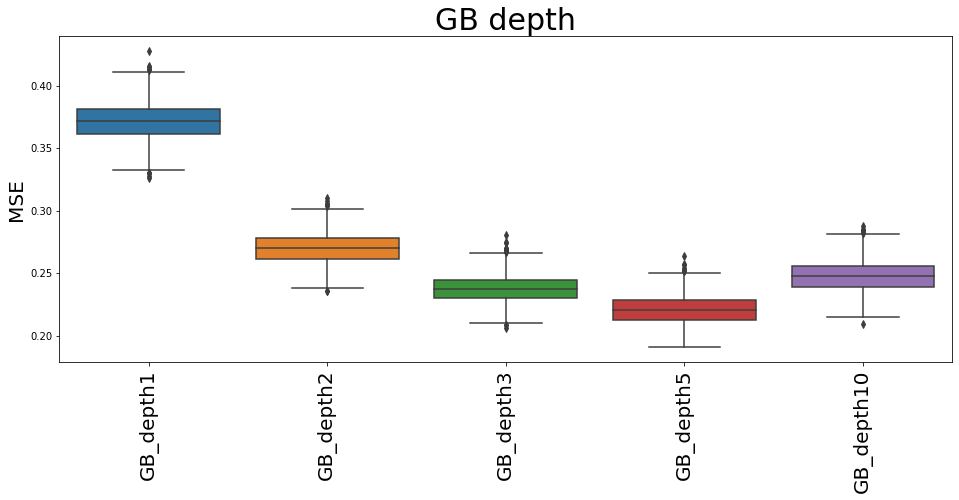

In [166]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(data=depth_boost , y="mse", x="model")
plt.setp(ax.get_xticklabels(), rotation=90)
plt.xlabel("", size=20)
plt.ylabel("MSE", size=20)
plt.title("GB depth", size=30)
plt.xticks(size=20)
plt.show()

Искомая глубина находится между 4 и 10. Проверим 4, 6 и 7. 

In [167]:
models_add = {}
for depth in (4, 6, 7): 
    models_add[f"GB_depth{depth}"] = GradientBoostingRegressor(n_estimators=500,
                                    learning_rate=0.1, 
                                    max_depth=depth, 
                                    random_state=42)

# Train model
depth_boost_add = train_and_test_regressor(models_add, X_learn, y_learn, X_valid, y_valid)

Fitting GB_depth4
Fitting GB_depth6
Fitting GB_depth7
Calculating bootstrap score for GB_depth4
Calculating bootstrap score for GB_depth6
Calculating bootstrap score for GB_depth7


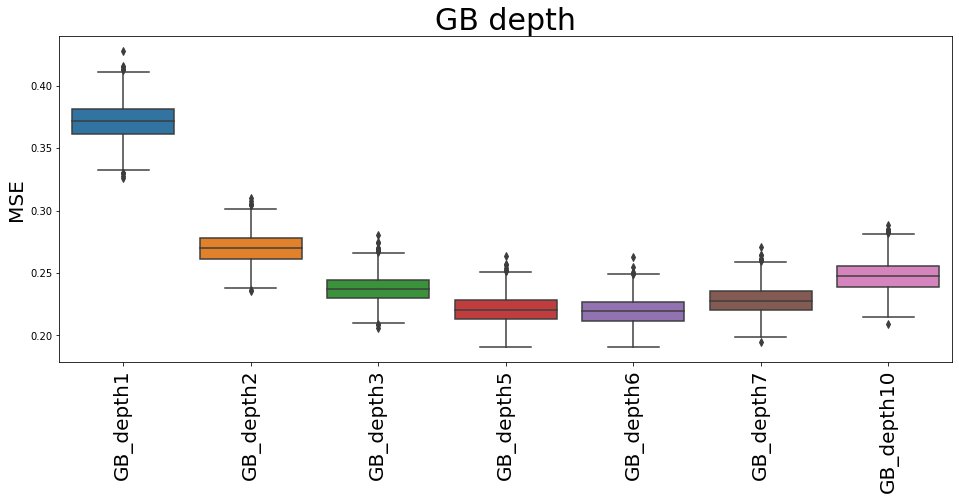

In [168]:
depth_boost_joined = pd.concat([depth_boost, depth_boost_add])

plt.figure(figsize=(16,6))
ax = sns.boxplot(data=depth_boost_joined , y="mse", x="model", order=[f"GB_depth{i}" for i in (1, 2, 3, 5, 6, 7, 10)])
plt.setp(ax.get_xticklabels(), rotation=90)
plt.xlabel("", size=20)
plt.ylabel("MSE", size=20)
plt.title("GB depth", size=30)
plt.xticks(size=20)
plt.show()

Значит, оптимальная глубина — 6.

### Минимальное число объектов в листе<a class="anchor" style="autocontent" id="Минимальное-число-объектов-в-листе"/><br>
Опять же, этот параметр влияет на сложность полученных деревьев. Как уже отмечалось ранее, стоит подбирать его вместе с глубиной, но мы ограничены по времени.

In [169]:
models = {}
for min_samples_leaf in (1, 3, 5, 7, 9, 11): 
    models[f"GB_mns{min_samples_leaf}"] = GradientBoostingRegressor(n_estimators=500, 
                                   learning_rate=0.1, 
                                   max_depth=6, 
                                   min_samples_leaf=min_samples_leaf, 
                                   random_state=42)

# Train model
mns_boost = train_and_test_regressor(models, X_learn, y_learn, X_valid, y_valid)

Fitting GB_mns1
Fitting GB_mns3
Fitting GB_mns5
Fitting GB_mns7
Fitting GB_mns9
Fitting GB_mns11
Calculating bootstrap score for GB_mns1
Calculating bootstrap score for GB_mns3
Calculating bootstrap score for GB_mns5
Calculating bootstrap score for GB_mns7
Calculating bootstrap score for GB_mns9
Calculating bootstrap score for GB_mns11


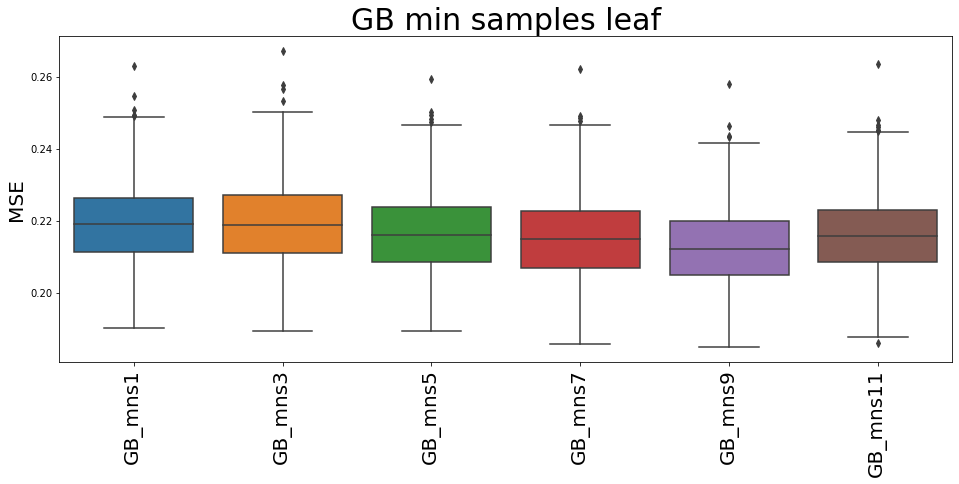

In [170]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(data=mns_boost , y="mse", x="model")
plt.setp(ax.get_xticklabels(), rotation=90)
plt.xlabel("", size=20)
plt.ylabel("MSE", size=20)
plt.title("GB min samples leaf", size=30)
plt.xticks(size=20)
plt.show()

Поставим число детей равное 9.

### Subsampling-and-max_features-and-max_features and max_features <a class="anchor" style="autocontent" id="Subsampling-and-max_features-and-max_features"/><br>

Можно каждому дереву в ансамбле давать только часть объектов из выборки — получим стохастический градиентный бустинг. За это отвечает параметр subsample. 
Аналогично, можно давать каждому дереву в ансамбле лишь часть признаков — max_feeatures.
Это может давать дополнительный прирост качества. Сейчас мы этот этап опускаем, так как у нас мало признаков и не очень много объектов, а также в целях экономии времени.

<img src ="https://edunet.kea.su/repo/src/L03_Classic_ML/img/p/boost_subsampling.png" width="600">


Кроме того, мы можем каждое дерево еще немножко рандомизировать. Можем давать ему не всю выборку, не все признаки. Это работает не всегда, гиперпараметры, контролирующие это поведение, нужно подбирать. 

### Понижение learning rate<a class="anchor" style="autocontent" id="Понижение-learning-rate"/><br>
После того, как мы подобрали остальные параметры, можно попытаться выиграть дополнительное качество за счет понижения learning_rate и одновременное увеличение числа деревьев ансамбля. 

Опять же, этот этап пропустим.

Построим график качества для текущего learning rate — мы же брали не оптимальное число предсказателей, посмотрим, можно ли уже на финальном этапе взять побольше.

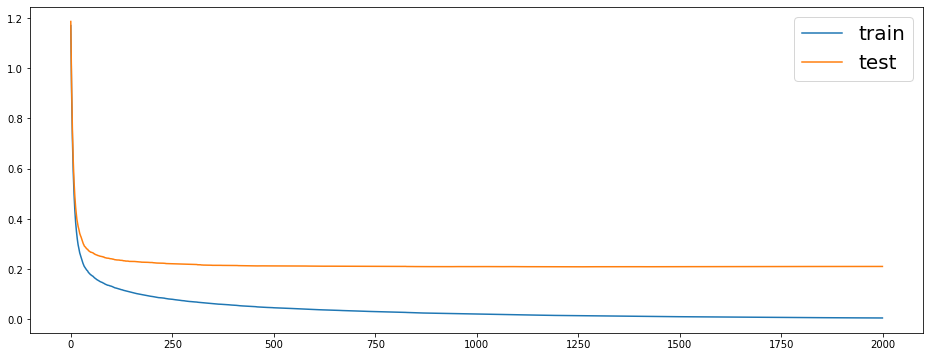

In [171]:
gbtree = GradientBoostingRegressor(n_estimators=1000,
                                   max_depth=6,
                                   min_samples_leaf=9,
                                   learning_rate=0.1,
                                   random_state=42)
gbtree.fit(X_learn, y_learn)

error_train = []
error_test = []
for it, (y_learn_pred, y_valid_pred) in enumerate(zip(gbtree.staged_predict(X_learn), 
                                                     gbtree.staged_predict(X_valid))):
    ertr = mean_squared_error(y_true=y_learn, y_pred=y_learn_pred)
    error_train.append(ertr)
    erte = mean_squared_error(y_true=y_valid, y_pred=y_valid_pred)
    error_test.append(erte)
    

plt.figure(figsize=(16,6))
plt.plot(error_train, label='train')
plt.plot(error_test, label='test')
plt.legend(fontsize=20)

Ок, возьмем 500 деревьев.

In [181]:
models = {}

models['RF'] = RandomForestRegressor(n_estimators=250, 
                                     max_depth=None, 
                                     min_samples_leaf=1, 
                                     n_jobs=-1, 
                                     random_state=42)

models['LinReg'] = LinearRegression(normalize=True)

models['GBR'] = GradientBoostingRegressor(learning_rate=0.1, 
                                          n_estimators=250, 
                                          random_state=42)

models['GBR tuned'] = GradientBoostingRegressor(learning_rate=0.1, 
                                                n_estimators=500, 
                                                max_depth=6,
                                                min_samples_leaf=9,
                                                random_state=42)

# Train models
tuned_boost = train_and_test_regressor(models, X_train, y_train, X_test, y_test)

Fitting RF
Fitting LinReg
Fitting GBR
Fitting GBR tuned
Calculating bootstrap score for RF
Calculating bootstrap score for LinReg
Calculating bootstrap score for GBR
Calculating bootstrap score for GBR tuned


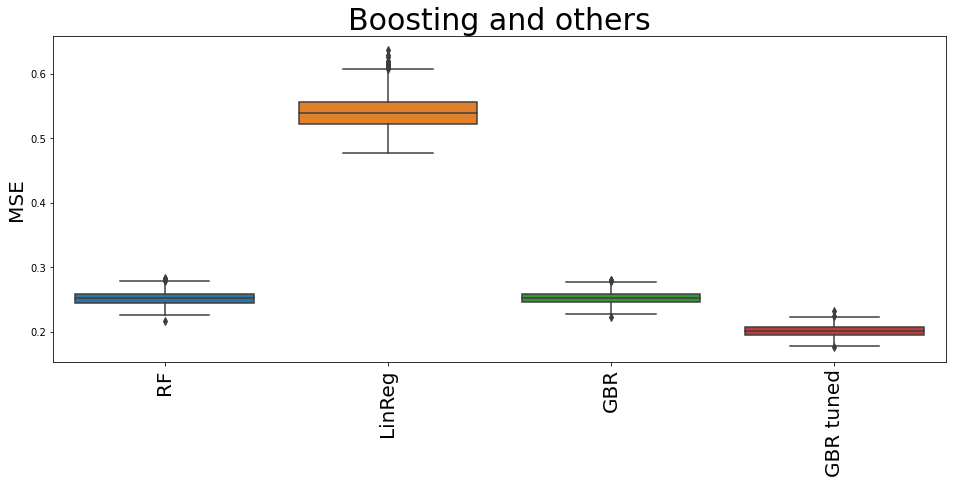

In [182]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(data=tuned_boost , y="mse", x="model")
plt.setp(ax.get_xticklabels(), rotation=90)
plt.xlabel("", size=20)
plt.ylabel("MSE", size=20)
plt.title("Boosting and others", size=30)
plt.xticks(size=20)
plt.show()

Видим, что мы дополнительно умньшили ошибку нашего метода 

## Градиентный бустинг и bias-variance tradeoff

В то время как случайный лес только уменьшал variance модели, бустинг стремится уменьшить и bias, и variance. 

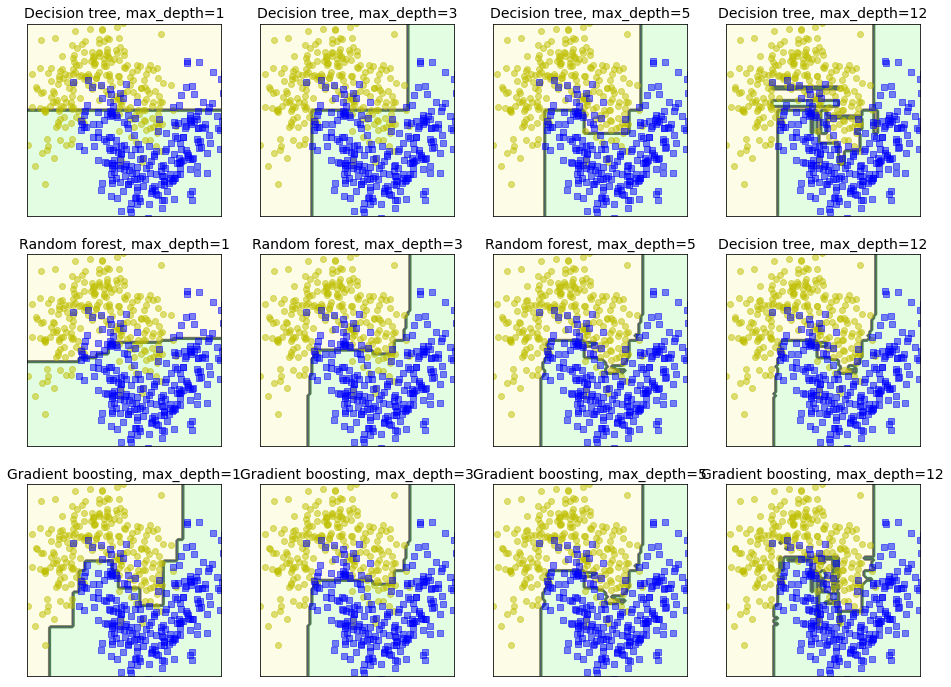

In [184]:
from sklearn.ensemble import GradientBoostingClassifier

X, y = sklearn.datasets.make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


plt.figure(figsize=(16,12))
plt.subplot(341)
dt1 = DecisionTreeClassifier(max_depth=1) 
dt1.fit(X_train, y_train)
plot_decision_boundary(dt1, X, y)
plt.xticks([], [])
plt.yticks([], [])

plt.title("Decision tree, max_depth=1", fontsize=14)
plt.xlabel("")
plt.ylabel("")
plt.xticks([], [])
plt.yticks([], [])

plt.subplot(342)
dt3 = DecisionTreeClassifier(max_depth=3) 
dt3.fit(X_train, y_train)
plot_decision_boundary(dt3, X, y)
plt.title("Decision tree, max_depth=3", fontsize=14)
plt.xlabel("")
plt.ylabel("")
plt.xticks([], [])
plt.yticks([], [])

plt.subplot(343)
dt5 = DecisionTreeClassifier(max_depth=5) 
dt5.fit(X_train, y_train)
plot_decision_boundary(dt5, X, y)
plt.title("Decision tree, max_depth=5", fontsize=14)
plt.xlabel("")
plt.ylabel("")
plt.xticks([], [])
plt.yticks([], [])

plt.subplot(344)
dt12 = DecisionTreeClassifier(max_depth=12) 
dt12.fit(X_train, y_train)
plot_decision_boundary(dt12, X, y)
plt.title("Decision tree, max_depth=12", fontsize=14)
plt.xlabel("")
plt.ylabel("")
plt.xticks([], [])
plt.yticks([], [])

plt.subplot(345)
rf1 = RandomForestClassifier(max_depth=1, n_estimators=500, n_jobs=-1) 
rf1.fit(X_train, y_train)
plot_decision_boundary(rf1, X, y)
plt.title("Random forest, max_depth=1", fontsize=14)
plt.xlabel("")
plt.ylabel("")
plt.xticks([], [])
plt.yticks([], [])

plt.subplot(346)
rf3 = RandomForestClassifier(max_depth=3, n_estimators=500, n_jobs=-1) 
rf3.fit(X_train, y_train)
plot_decision_boundary(rf3, X, y)
plt.title("Random forest, max_depth=3", fontsize=14)
plt.xlabel("")
plt.ylabel("")
plt.xticks([], [])
plt.yticks([], [])

plt.subplot(347)
rf5 = RandomForestClassifier(max_depth=5, n_estimators=500, n_jobs=-1) 
rf5.fit(X_train, y_train)
plot_decision_boundary(rf5, X, y)
plt.title("Random forest, max_depth=5", fontsize=14)
plt.xlabel("")
plt.ylabel("")
plt.xticks([], [])
plt.yticks([], [])

plt.subplot(348)
rf12 = RandomForestClassifier(max_depth=5, n_estimators=500, n_jobs=-1) 
rf12.fit(X_train, y_train)
plot_decision_boundary(rf12, X, y)
plt.title("Decision tree, max_depth=12", fontsize=14)
plt.subplots_adjust()
plt.xlabel("")
plt.ylabel("")
plt.xticks([], [])
plt.yticks([], [])

plt.subplot(349)
boost1 = GradientBoostingClassifier(max_depth=1, n_estimators=250)
boost1.fit(X_train, y_train)
plot_decision_boundary(boost1, X, y)
plt.title("Gradient boosting, max_depth=1", fontsize=14)
plt.xlabel("")
plt.ylabel("")
plt.xticks([], [])
plt.yticks([], [])

plt.subplot(3, 4, 10)
boost3 =  GradientBoostingClassifier(max_depth=3, n_estimators=250) 
boost3.fit(X_train, y_train)
plot_decision_boundary(rf3, X, y)
plt.title("Gradient boosting, max_depth=3", fontsize=14)
plt.xlabel("")
plt.ylabel("")
plt.xticks([], [])
plt.yticks([], [])

plt.subplot(3, 4, 11)
boost5 =  GradientBoostingClassifier(max_depth=5, n_estimators=250) 
boost5.fit(X_train, y_train)
plot_decision_boundary(rf5, X, y)
plt.title("Gradient boosting, max_depth=5", fontsize=14)
plt.xlabel("")
plt.ylabel("")
plt.xticks([], [])
plt.yticks([], [])

plt.subplot(3, 4, 12)
boost12 =  GradientBoostingClassifier(max_depth=5, n_estimators=250) 
boost12.fit(X_train, y_train)
plot_decision_boundary(boost12, X, y)
plt.title("Gradient boosting, max_depth=12", fontsize=14)
plt.subplots_adjust()
plt.xlabel("")
plt.ylabel("")
plt.xticks([], [])
plt.yticks([], [])
plt.show()

## Модификации градиентного бустинга<a class="anchor" style="autocontent" id="Модификации-градиентного-бустинга"/><br>

Есть много модификаций градиентного бустинга. В отличии от реализации в sklearn, большая часть из них умеет параллелиться на CPU или даже на GPU. 

Потому при работе с реальными данными использовать градиентный бустинг из sklearn не стоит. XGBoost и/или LigthGBM дадут результат как правило лучше и быстрее. 

### XGBoost<a class="anchor" style="autocontent" id="XGBoost"/><br>
Мы хотим спускаться медленно и не хотим, чтобы модели по пути были сложными. Пусть минимально отличающиеся от случайного, но при этом не очень сложными. 

Поэтому XGBoost вводит специальный штраф за сложные деревья (большей глубины, чем 2 — 3). За счет того, что в градиентном бустинге можно минимизировать любую дифференцируемую функцию ошибок, мы просто добавляем штраф напрямую в функцию ошибок исходного градиентного бустинга.

<img src ="http://edunet.kea.su/repo/src/L03_Classic_ML/img/L03_Classic_ML-69.png" width="550">

In [176]:
import xgboost

calif_housing = sklearn.datasets.fetch_california_housing()
X = calif_housing.data
y = calif_housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Скопируем параметры, которые совпадают между градиентным бустингом и XGBoost. Посмотрим, вдруг с нахрапа получиться еще улучшить качество.

In [177]:
models_add = {}
models_add['xgb'] = xgboost.XGBRegressor(n_estimators=500,  
                     learning_rate=0.1, 
                     max_depth=6, 
                     random_state=42,
                     min_child_weight=9, # not exact analogue for min_samples_leaf
                     n_jobs=-1) # can be constructed in parrallel, much!!! faster) 

# Train models
xgb_add = train_and_test_regressor(models_add, X_train, y_train, X_test, y_test)

Fitting xgb
[17:54:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Calculating bootstrap score for xgb


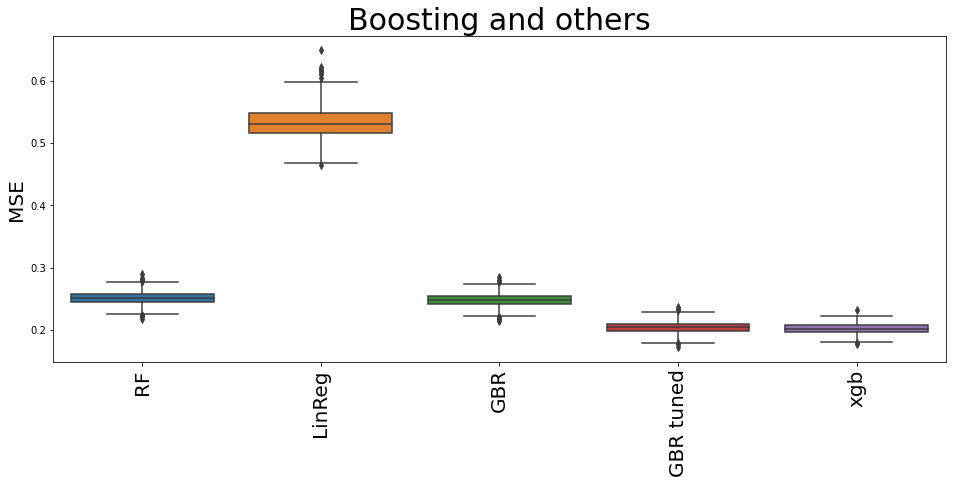

In [178]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(data=pd.concat([tuned_boost, xgb_add]) , y="mse", x="model")
plt.setp(ax.get_xticklabels(), rotation=90)
plt.xlabel("", size=20)
plt.ylabel("MSE", size=20)
plt.title("Boosting and others", size=30)
plt.xticks(size=20)
plt.show()

Пусть и незначимо, но xgboost с полоборота лучше GBR. И, главное — в разы быстрее.

### min_child_weight<a class="anchor" style="autocontent" id="min_child_weight"/><br>
XGBoost немного иначе определяет важность листа — не сколько именно объектов в лист попало, а насколько объекты в листе имеют сильно разные предсказания. Из-за этого способа определения, min_child_weight может принимать нецелые значения, в том числе меньше 1 (к примеру, в случае задачи классификации)

Попробуем затюнить только этот параметр. Заметьте, мы можем спокойно использовать 2000 естиматоров, не боясь ждать результата рассчетов долгое время 

In [179]:
models = {}
for min_child_weight in (1, 2, 3, 5, 7, 9, 11, 13, 15): 
    models[f"XGB_mnw{min_child_weight}"] = xgboost.XGBRegressor(n_estimators=500,  
                     learning_rate=0.1, 
                     max_depth=6, 
                     random_state=42,
                     min_child_weight=min_child_weight,                                          
                     n_jobs=-1)

# Train models
xgb_mw = train_and_test_regressor(models, X_learn, y_learn, X_valid, y_valid)

Fitting XGB_mnw1
[17:54:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting XGB_mnw2
[17:54:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting XGB_mnw3
[17:54:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting XGB_mnw5
[17:54:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting XGB_mnw7
[17:54:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting XGB_mnw9
[17:55:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting XGB_mnw11
[17:55:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squar

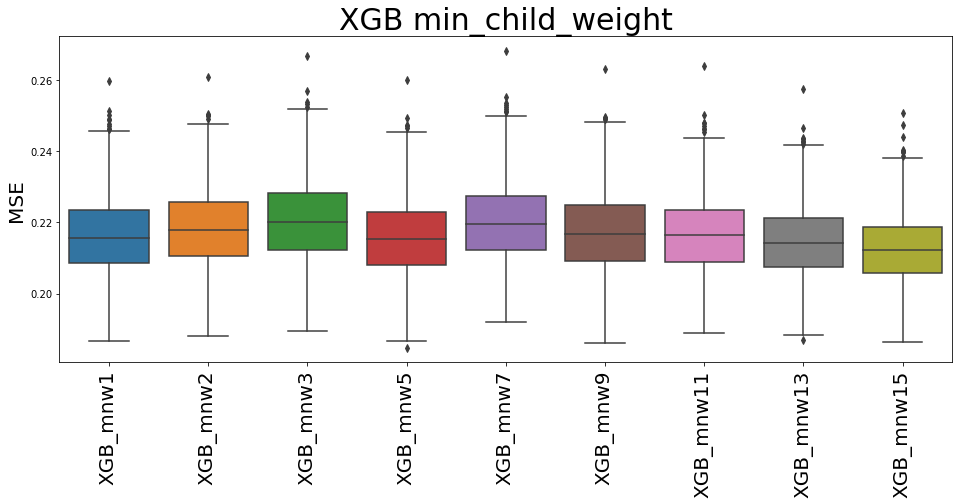

In [180]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(data=xgb_mw, y="mse", x="model")
plt.setp(ax.get_xticklabels(), rotation=90)
plt.xlabel("", size=20)
plt.ylabel("MSE", size=20)
plt.title("XGB min_child_weight", size=30)
plt.xticks(size=20)
plt.show()

Возьмем равное 7 (в принципе, можно было бы подобрать чуть точнее)

In [185]:
models_add2 = {}
models_add2['xgb_mcw'] = xgboost.XGBRegressor(n_estimators=2000,  
                     learning_rate=0.1, 
                     max_depth=6, 
                     random_state=42,
                     min_child_weight=7,
                     n_jobs=-1)

# Traing modelы
xgb_add2 = train_and_test_regressor(models_add2, X_train, y_train, X_test, y_test)

Fitting xgb_mcw
[17:58:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Calculating bootstrap score for xgb_mcw


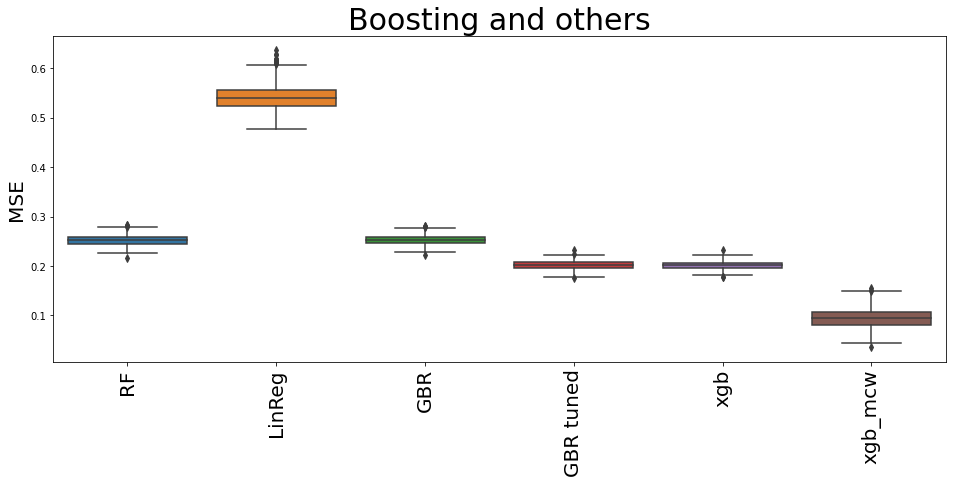

In [186]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(data=pd.concat([tuned_boost, xgb_add, xgb_add2]) , y="mse", x="model")
plt.setp(ax.get_xticklabels(), rotation=90)
plt.xlabel("", size=20)
plt.ylabel("MSE", size=20)
plt.title("Boosting and others", size=30)
plt.xticks(size=20)
plt.show()

Почти ничего не изменилось.

### LightGBM <a class="anchor" style="autocontent" id="LightGBM"/><br>


Он был изначально разработан для того, чтобы работать очень быстро. В него добавили много ухищрений, связанных с этим. Кроме этого, LightGBM по-умолчанию строит дерево немного иначе, нежели XGBoost.

XGBoost по-умолчанию строит дерево по уровням - на каждом уровне, если узел можно разбить так, чтобы улучшить значение функции ошибки, то мы это делаем. Ограничены мы только максимальной глубиной дерева. 

LightGBM же строит дерево по-узлам. На каждом шаге бьется тот узел, разбиение которого сильнее всего минимизирует функцию ошибки. И ограничения на глубину нет. В LightGBM вводится ограничение не на глубину дерева, а на общее число листьев в итоговом дереве. 



<img src ="http://edunet.kea.su/repo/src/L03_Classic_ML/img/L03_Classic_ML-71.png" width="450">

In [187]:
import lightgbm

По-умолчанию он **еще** быстрее (хотя в xgboost тоже есть опции для ускорения)

Из-за особенностей построения им деревьев, надо задавать не высоту дерева, а максимальное число листьев. Поставим пока так, чтобы число листьев было равно числу листьев в дереве высоты 6

In [188]:
models_add3 = {}
models_add3['lightgbm'] = lightgbm.LGBMRegressor(n_estimators=2000, # can use more estimators due to SPEEEEEED 
                     learning_rate=0.1, 
                     max_depth=-1,
                     num_leaves=2**6,                       
                     random_state=42,
                     min_child_weight=7,
                     n_jobs=-1)

# Train modals
lgb_add = train_and_test_regressor(models_add3, X_train, y_train, X_test, y_test)

Fitting lightgbm
Calculating bootstrap score for lightgbm


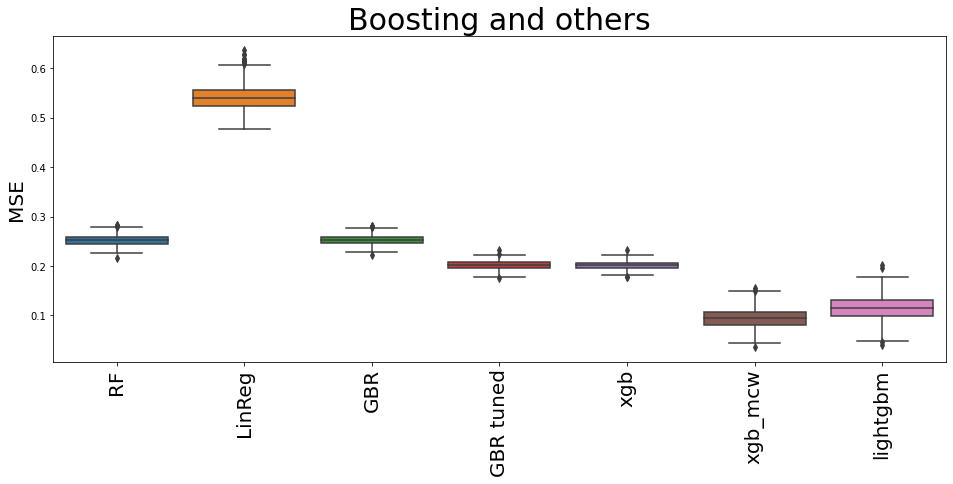

In [189]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(data=pd.concat([tuned_boost, xgb_add, xgb_add2, lgb_add]) , y="mse", x="model")
plt.setp(ax.get_xticklabels(), rotation=90)
plt.xlabel("", size=20)
plt.ylabel("MSE", size=20)
plt.title("Boosting and others", size=30)
plt.xticks(size=20)
plt.show()

На уровне с xgboost. Зато быстрее)

### Максимальное число листьев в дереве<a class="anchor" style="autocontent" id="Максимальное-число-листьев-в-дереве"/><br>
Попробуем все же отдельно подобрать ограничение на число листьев. По словам создателей, оно не должно быть больше числа листьев в соответствующем дереве глубины 5, то есть 32. 

In [190]:
models = {}
for num_leaves in (8, 16, 24, 32, 40): 
    models[f"LGB_lvn{num_leaves}"] =  lightgbm.LGBMRegressor(n_estimators=2000,  
                     learning_rate=0.1, 
                     max_depth=-1,
                     num_leaves=num_leaves,                       
                     random_state=42,
                     min_child_weight=10,
                     n_jobs=-1)

# Train models
lgb_nl = train_and_test_regressor(models, X_learn, y_learn, X_valid, y_valid)

Fitting LGB_lvn8
Fitting LGB_lvn16
Fitting LGB_lvn24
Fitting LGB_lvn32
Fitting LGB_lvn40
Calculating bootstrap score for LGB_lvn8
Calculating bootstrap score for LGB_lvn16
Calculating bootstrap score for LGB_lvn24
Calculating bootstrap score for LGB_lvn32
Calculating bootstrap score for LGB_lvn40


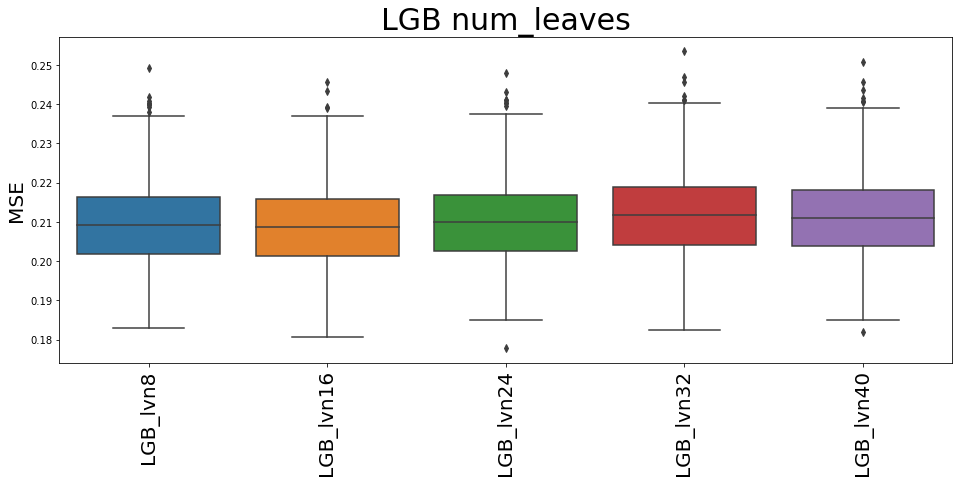

In [191]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(data=lgb_nl, y="mse", x="model")
plt.setp(ax.get_xticklabels(), rotation=90)
plt.xlabel("", size=20)
plt.ylabel("MSE", size=20)
plt.title("LGB num_leaves", size=30)
plt.xticks(size=20)
plt.show()

Исходя из этого графика, оптимальное число листьев - в районе 16

In [192]:
models = {}
for num_leaves in (8, 12, 16, 20): 
    models[f"LGB_nl{num_leaves}"] =  lightgbm.LGBMRegressor(n_estimators=2000,  
                     learning_rate=0.1, 
                     max_depth=-1,
                     num_leaves=num_leaves,                       
                     random_state=42,
                     min_child_weight=10,
                     n_jobs=-1) 

# Train models
lgb_nl = train_and_test_regressor(models, X_learn, y_learn, X_valid, y_valid)

Fitting LGB_nl8
Fitting LGB_nl12
Fitting LGB_nl16
Fitting LGB_nl20
Calculating bootstrap score for LGB_nl8
Calculating bootstrap score for LGB_nl12
Calculating bootstrap score for LGB_nl16
Calculating bootstrap score for LGB_nl20


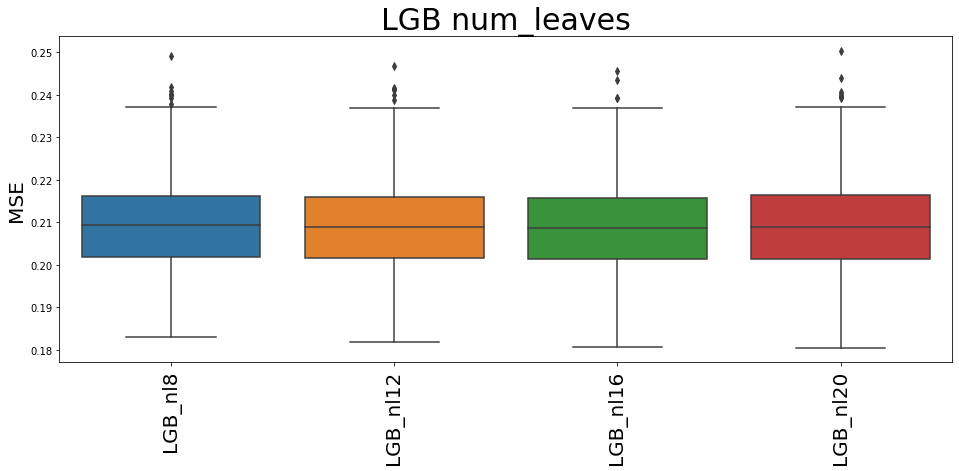

In [193]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(data=lgb_nl, y="mse", x="model")
plt.setp(ax.get_xticklabels(), rotation=90)
plt.xlabel("", size=20)
plt.ylabel("MSE", size=20)
plt.title("LGB num_leaves", size=30)
plt.xticks(size=20)
plt.show()

Выберем 12 листьев

In [194]:
models_add4 = {}
models_add4['lightgbm lv12'] = lightgbm.LGBMRegressor(n_estimators=2000,  
                     learning_rate=0.1, 
                     max_depth=-1,
                     num_leaves=12,                       
                     random_state=42,
                     min_child_weight=7,
                     n_jobs=-1) 

# Train models
lgb_add2 = train_and_test_regressor(models_add4, X_train, y_train, X_test, y_test)

Fitting lightgbm lv12
Calculating bootstrap score for lightgbm lv12


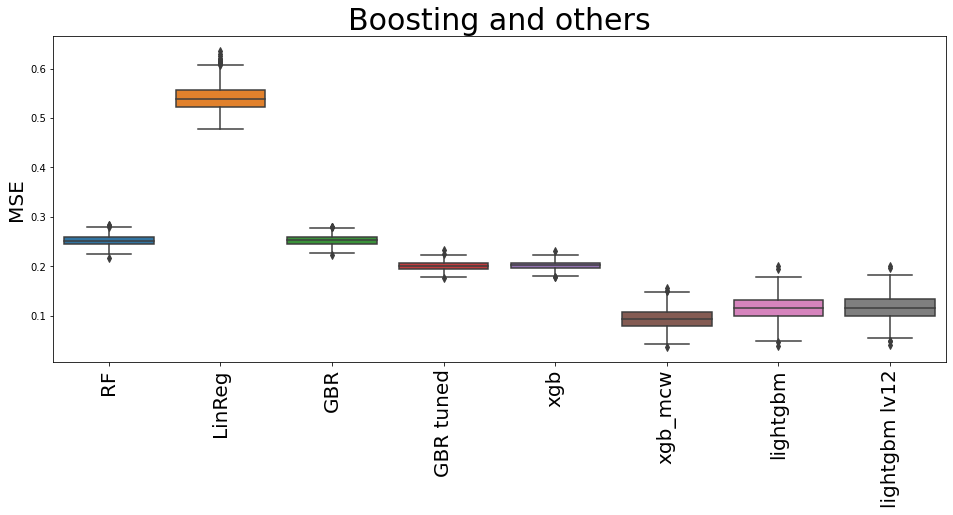

In [195]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(data=pd.concat([tuned_boost, xgb_add, xgb_add2, lgb_add, lgb_add2]) , y="mse", x="model")
plt.setp(ax.get_xticklabels(), rotation=90)
plt.xlabel("", size=20)
plt.ylabel("MSE", size=20)
plt.title("Boosting and others", size=30)
plt.xticks(size=20)
plt.show()

Качество незначительно улучшилось

### CatBoost-(Categorical-Boosting)-(Categorical-Boosting) (Categorical Boosting)<a class="anchor" style="autocontent" id="CatBoost-(Categorical-Boosting)-(Categorical-Boosting)"/><br>
Разработал Яндекс.  

CatBoost:

1. хорошо умеет работать с категориальными признаками. Если у вас много категориальных признаков - он может дать сушественный выигрыш. 
2. по-умолчанию использует в качестве модели модификацию обычного дерева решения - Symmetric Tree - которое менее склонно к переобучению

In [196]:
!pip install catboost

     |████████████████████████████████| 67.4 MB 45 kB/s 


In [197]:
import catboost

In [198]:
models_add4 = {}
models_add4['catboost'] = catboost.CatBoostRegressor(iterations=2000,  
                     learning_rate=0.1, 
                     depth=6,                       
                     random_state=42,
                     min_data_in_leaf=7,
                     verbose=0)
                     #task_type="GPU") # can use gpu, but no parallel-cpu option

# Train models
cat_add = train_and_test_regressor(models_add4, X_train, y_train, X_test, y_test)

Fitting catboost
Calculating bootstrap score for catboost


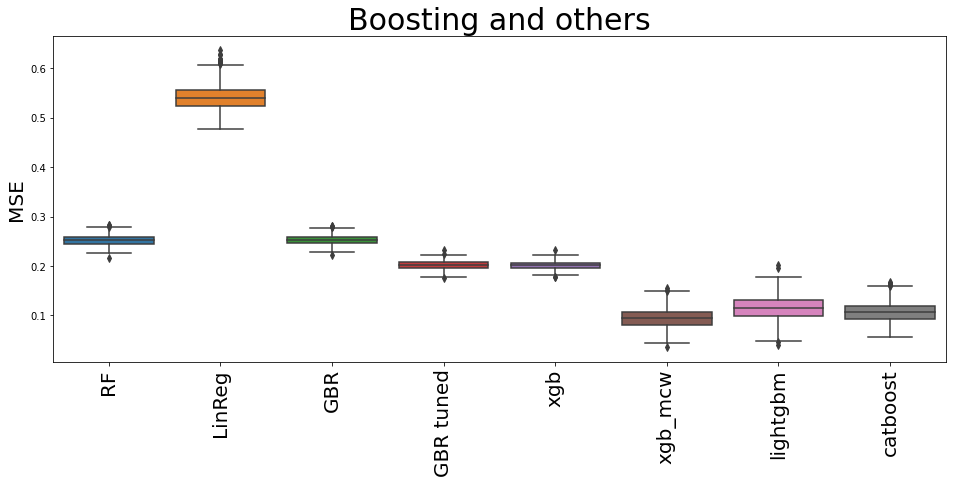

In [199]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(data=pd.concat([tuned_boost, xgb_add, xgb_add2, lgb_add, cat_add]) , y="mse", x="model")
plt.setp(ax.get_xticklabels(), rotation=90)
plt.xlabel("", size=20)
plt.ylabel("MSE", size=20)
plt.title("Boosting and others", size=30)
plt.xticks(size=20)
plt.show()

Стало еще лучше

### Про другие реализации случайного леса<a class="anchor" style="autocontent" id="Про-другие-реализации-случайного-леса"/><br>
В xgboost и lightgbm есть свои, более быстрые и иногда более эффективные реализации случайного леса. Но их надо дополнительно настраивать

In [201]:
models_rf = {}

models_rf["xgb_rf"] = xgboost.XGBRFRegressor(n_estimators=250, 
                                             colsample_bytree=0.8, 
                                             subsample=0.8,
                                             reg_lambda=0.001, # to get deeper, less regularized trees
                                             max_depth=20, # trees must be deep
                                n_jobs=-1)

models_rf["lgb_rf"] = lightgbm.LGBMRegressor(n_estimators=250,
                            bagging_freq=1, # for lgb random forest must be set to 1
                            num_leaves=2**14, # don't forget to change the number of leaves to smth big
                            boosting_type="rf", # set boosteer type
                            feature_fraction=0.8, # for lgb random forest must be less then 1
                            bagging_fraction=0.8, # for lgb random forest must be less then 1
                            min_child_samples=1, # to get deeper trees 
                            n_jobs=-1)

# Train models
rf_add = train_and_test_regressor(models_rf, X_train, y_train, X_test, y_test)

Fitting xgb_rf
[18:03:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting lgb_rf
Calculating bootstrap score for xgb_rf
Calculating bootstrap score for lgb_rf


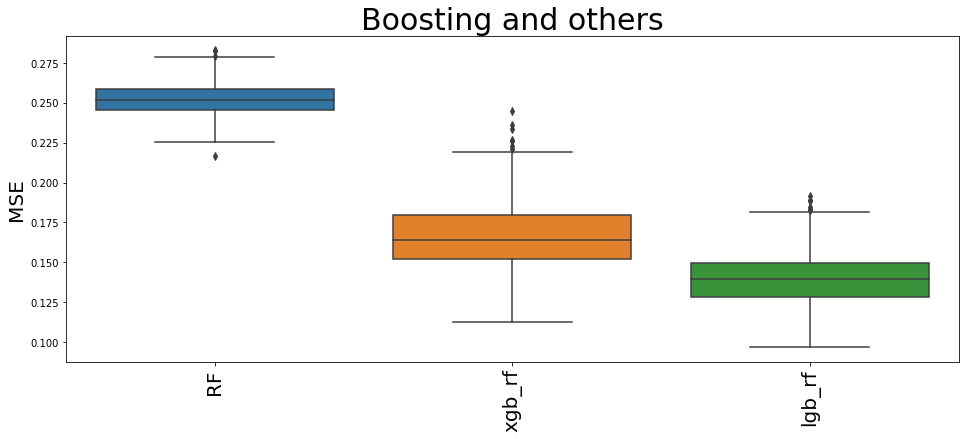

In [202]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(data=pd.concat([tuned_boost.query('model == "RF"'), rf_add]) , y="mse", x="model")
plt.setp(ax.get_xticklabels(), rotation=90)
plt.xlabel("", size=20)
plt.ylabel("MSE", size=20)
plt.title("Boosting and others", size=30)
plt.xticks(size=20)
plt.show()

Заметьте, что в данном случае они показывают себя иначе, нежели sklearn RandomForest. Это частое явление - так как деревья в пакетах xgboost и lightgbm строятся отличным от sklearn образом. Это может как улучшать качество, так и ухудшать

### Про подбор параметров модифицированных бустингов<a class="anchor" style="autocontent" id="Про-подбор-параметров-модифицированных-бустингов"/><br>
Каждый из модифицированных бустингов имеет свои особые параметры и рекомендации от создателей и участников Kaggle, как и в каком порядке выбирать параметры для конкретнго бустинга. Если вы решили использовать тот или иной вид бустинга в своей задача - ОЗНАКОМЬТЕСЬ c этими советами. 

Все три бустинга, к примеру, позволяет задавать не только число признаков, использующихся в каждом узле, но и число признаков, использующщихся в каждом дереве в целом. 

Кроме того, все три бустинга имеют настройки, ускоряющие их работу (у lightgbm эти настройки выставлены по-умолчанию) и все три бустинга умеют работать на GPU

Здесь мы бегло пробежались по самым верхам, копируя подобранные на предудущих этапах параметры

##  Смесь экспертов<a class="anchor" style="autocontent" id="Смесь-экспертов"/><br>

До этого мы использовали два подхода. Первый подход — берем много предсказаний большого количества моделей и усредняем (считаем, что модели равноправны).

$$ h(x) = \dfrac 1 k \sum_{i=i}^k  a_i (x) $$
Потом задумываемся о том, что каждая модель предсказывает в целом по-разному. Одна модель ошибается в 10% случаях, другая — в 15% и так далее. Неплохо бы к предсказаниям этих моделей подобрать веса. Так рождается идея того же бустинга.

$$ h(x) = \dfrac 1 k \sum_{i=i}^k b_i a_i (x) $$


Следующий логичный шаг — подумать о том, что каждая модель может ошибаться на каких-то своих объектах. Например, при предсказании, насколько велика вероятность, что человек серьезно заболеет, одна модель будет плохо работать для европейцев, а другая — для жителей Новой Гвинеи. 

$$ h(x) = \dfrac 1 k \sum_{i=i}^k b_i(x) a_i (x) $$

Получается ситуация, в которой то, насколько хорошо будет предсказывать модель, зависит от самого объекта. Фактически это означает то, что мы бы хотели для каждого объекта получать какой-то вектор весов, а дальше суммировать предсказания моделей $a_i$, используя эти веса. 

Как получать эти веса для каждого объекта? 
Обучим еще одну модель, который явно или неявно предсказывает веса алгоритмов и аггрегирует их предсказания. Называться она будет **метаалгоритмом**.

Обычно для металгоритма используется сравнительно простые модели, например, линейную модель (в этом случае веса предсказаний базовых моделей не будут зависеть от объекта) или 

Как получить такую модель? Есть два распространенных подхода - **stacking** и **blending**

### Blending (Блендинг)<a class="anchor" style="autocontent" id="Blending-(Блендинг)"/><br>

На соревновании Netflix Prize была поставлена задача - предсказать , как люди оценят тот или иной фильм. 
Победил подход, основанный на таком объединении модели, при котором у вас каждая модель получает вес в зависимости от объекта. Подход называется **блендинг**.

<img src ="https://edunet.kea.su/repo/src/L03_Classic_ML/img/p/netflix.png" width="600">

 

У нас есть **обучающая и тестовая выборка**.

1. Бьем обучающую выборку на две подвыборки - A (побольше) и B

2. Обучаем набор базовых алгоритмов на подвыборке A. 

3. Получаем предсказания этих базовых алгоритмов на объектах из выборки B

4. Используем эти предсказания в качестве признаков для метаалгоритма, который будет предсказывать веса алгоритмов. Обучаем его на выборке B.

5. Для того, чтобы сделать предказание на тесте:
  1. Получаем предсказания базовых моделей на тесте
  2. Аггрегируем их при помощи метаалгоритма


Тестовую выборку не трогаем. Дополнительно **разбиваем обучение и обучаем алгоритмы на разбиении**, каждый алгоритм дает какое-то предсказание. На отложенной части обучения делаем то же предсказание, то есть используем предсказания алгоритмов как дополнительные признаки. Получается датасет, в котором есть изначальные признаки и предсказания моделей. Дальше можно **обучить мета-алгоритм либо на объединении всех этих признаков, либо только на этих признаках**. Получится, что алгоритм будет брать предсказания других алгоритмов, обрабатывать их внутри себя и выдавать итоговое предсказание. 
<img src ="https://edunet.kea.su/repo/src/L03_Classic_ML/img/p/blending.png" width="800">



Недостатком блендинга является то, что мы дополнительно разбиваем обучающую выборку - нельзя учить и базовые алгоритмы, и основной на одних и тех же данных. 

Для улучшения качество можно сделать несколько блендингов (по-разному разбивая обуучающую выборку на выборки A и B), а дальше усреднять предсказания разных блендингов. 

Попробуем сделать простой блендинг. Единственное - немного схитрим, для обучения метаалгоритма будем использовать датасет, который использовали при подборе гиперпараметров алгоритмов

In [203]:
class BlendingRegressor:
    def __init__(self, 
                 first_layer_models, 
                 second_layer_model):
        self.first_layer_models = {name : sklearn.clone(model) for name, model in first_layer_models.items()}
        self.second_layer_model = sklearn.clone(second_layer_model)
    
    def fit_1st_layer(self, X, y):
        for name, model in self.first_layer_models.items():
            print(f"Fitting {name}")
            model.fit(X, y)
        
    def predict_1st_layer(self, X):
        features = np.zeros((X.shape[0], len(self.first_layer_models)) )
        for ind, model in enumerate(self.first_layer_models.values()):
            features[:, ind] = model.predict(X)
        return features 
        
    def fit_2st_layer(self, X, y):
        features = self.predict_1st_layer(X)
        self.second_layer_model.fit(features, y)
    
    def predict(self, X):
        features = self.predict_1st_layer(X)
        y_pred = self.second_layer_model.predict(features)
        return y_pred

In [204]:
first_layer_models = {}
first_layer_models['linreg'] = LinearRegression(normalize=True)


first_layer_models['rf'] = RandomForestRegressor(n_estimators=250, 
                                    max_depth=None, 
                                     min_samples_leaf=1, 
                                     n_jobs=-1, 
                                    random_state=42)

# too long 
#first_layer_models['gbr'] = GradientBoostingRegressor(learning_rate=0.05, 
#                                 n_estimators=1000, 
#                                 random_state=42)
#first_layer_models['gbr_tuned'] = GradientBoostingRegressor(learning_rate=0.1, 
#                                      n_estimators=2000, 
#                                      max_depth=5,
#                                      min_samples_leaf=5,
#                                      random_state=42)


first_layer_models['xgb'] = xgboost.XGBRegressor(n_estimators=500,  
                     learning_rate=0.1, 
                     max_depth=5, 
                     random_state=42,
                     min_child_weight=10,
                     n_jobs=-1) 


first_layer_models['lgb_tuned'] = lightgbm.LGBMRegressor(n_estimators=2000,  
                     learning_rate=0.1, 
                     max_depth=-1,
                     num_leaves=12,                       
                     random_state=42,
                     min_child_weight=7,
                     n_jobs=-1) 

first_layer_models['catboost'] = catboost.CatBoostRegressor(iterations=2000, 
                                                            verbose=0,
                                                            learning_rate=0.1, 
                                                            depth=5,                       
                                                            random_state=42,
                                                            min_data_in_leaf=5)

In [205]:
X_learn, X_valid, y_learn, y_valid = train_test_split(X_train, y_train, random_state=42)
blend_reg = BlendingRegressor(first_layer_models, LinearRegression())

blend_reg.fit_1st_layer(X_learn, y_learn)
blend_reg.fit_2st_layer(X_valid, y_valid)
y_pred = blend_reg.predict(X_test)
blend_boot = bootstrap_metric(y_test, 
                 y_pred, 
                 metric_fn=lambda x, y: mean_squared_error(y_true=x, y_pred=y))

Fitting linreg
Fitting rf
Fitting xgb
[18:04:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting lgb_tuned
Fitting catboost


In [206]:
blend_data = pd.DataFrame({"mse": blend_boot})
blend_data['model'] = 'SingleBlending'

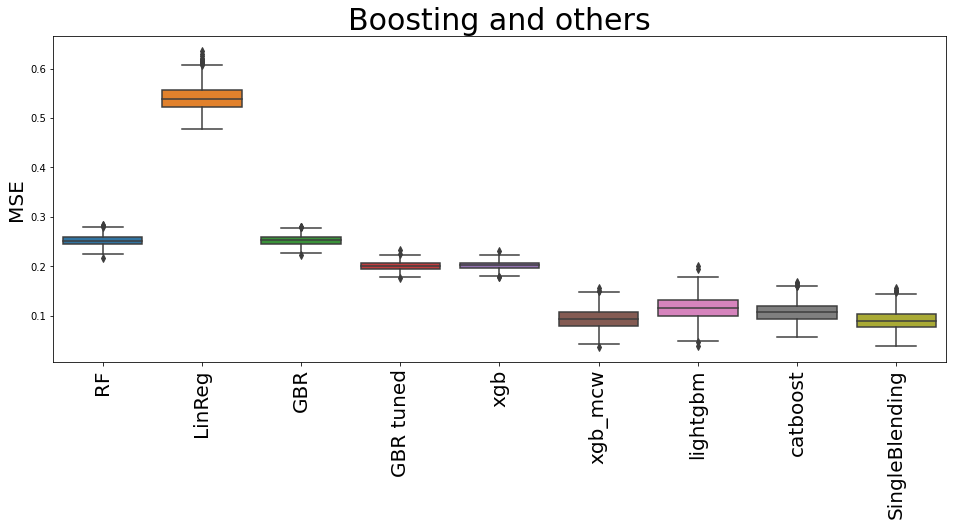

In [207]:
plt.figure(figsize=(16, 6))
ax = sns.boxplot(data=pd.concat([tuned_boost, xgb_add, xgb_add2, lgb_add, cat_add, blend_data]) , y="mse", x="model")
plt.setp(ax.get_xticklabels(), rotation=90)
plt.xlabel("", size=20)
plt.ylabel("MSE", size=20)
plt.title("Boosting and others", size=30)
plt.xticks(size=20)
plt.show()

Одиночный блендинг работае даже хуже, чем один catboost

Попробуем обучить 10 блендингов с разными разбиениями X_train на X_learn и X_valid

In [208]:
blending_ensemble = []

# takes some time to run
for i in range(1, 11):
    print(f"Training blender {i}")
    X_learn, X_valid, y_learn, y_valid = train_test_split(X_train, y_train, random_state=i * 7 % 13)
    blend_reg = BlendingRegressor(first_layer_models, 
                                  LinearRegression())

    blend_reg.fit_1st_layer(X_learn, y_learn)
    blend_reg.fit_2st_layer(X_valid, y_valid)
    blending_ensemble.append(blend_reg)

Fitting xgb
[18:06:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting lgb_tuned
Fitting catboost
Training blender 10
Fitting linreg
Fitting rf
Fitting xgb
[18:06:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting lgb_tuned
Fitting catboost


In [209]:
y_pred = 0
for blend_reg in blending_ensemble:
    y_pred += blend_reg.predict(X_test)
y_pred /= len(blending_ensemble)


eblend_boot = bootstrap_metric(y_test, 
                 y_pred, 
                 metric_fn=lambda x, y: mean_squared_error(y_true=x, y_pred=y))
eblend_data = pd.DataFrame({"mse": eblend_boot})
eblend_data['model'] = 'EnsembleBlending'

In [210]:
np.quantile(eblend_boot, q=[0.025, 0.975])

array([0.05486125, 0.1102656 ])

In [211]:
np.quantile(cat_add['mse'], q=[0.025, 0.975])

array([0.07045187, 0.1474295 ])

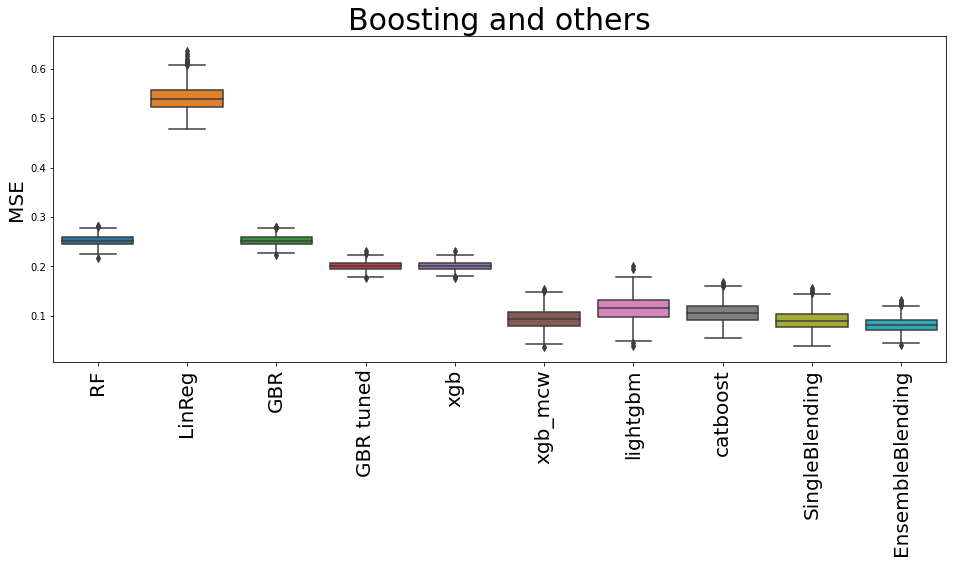

In [212]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(data=pd.concat([tuned_boost, xgb_add, xgb_add2, lgb_add, cat_add, blend_data, eblend_data]) , y="mse", x="model")
plt.setp(ax.get_xticklabels(), rotation=90)
plt.xlabel("", size=20)
plt.ylabel("MSE", size=20)
plt.title("Boosting and others", size=30)
plt.xticks(size=20)
plt.show()

Качество по сравнению с лучшей моделью (catboost) существенно не отличается

### Стэкинг<a class="anchor" style="autocontent" id="Стэкинг"/><br>

Так же можно использовать другой способ, который позволяет использовать всю обучающую выборку

Вместо того, чтобы бить обучающую выборкуу на выборки А и Б случайным образом, давайте использовать кросс-валидацию. 

* 1. Для каждого из базовых алгоритмов, которые хотим объединять: 
  * 1.1  Бьем обучающую выборку на блоки
  * 1.2  На каждом кросс-валидационном разбиении учим базовый алгоритм. На блоке, который не вошел в обучение делаем предсказание.
  * 1.3. В результате получаем предсказания для всей обучающей выборки.
  * 1.4  Для предсказания на тестовой выборке, обучаем наш базовый алгоритм на всей выборке
* 2. Обучаем на полученных предсказаниях мета-алгоритм

 <img src ="https://edunet.kea.su/repo/src/L03_Classic_ML/img/p/stacking_1.png" width="800">

* 3. Для того, чтобы сделать предсказание на тесте, делаем предсказания моделями, полученными на шаге 1.4. И аггрегируем их предсказания при помощи мета-алгоритма, полученного на шаге 2
 
 <img src ="https://edunet.kea.su/repo/src/L03_Classic_ML/img/p/stacking_2.png" width="800">

Стэкинг, в отличии от блендинга, использует все обучение - мы не теряем часть объектов безвозвратно.
Но этим мы вносим несколько проблем, одной из которых является то, что модели, на предсказаниях которых мы учили мета-алгоритм и модели, предсказаниях которых мы в итоге им аггрегируем, немного отличаются. Если в одном случае вероятность <font color=red>0.2</font>, предсказанная моделью, значила: «я не совсем уверена в предсказании», то теперь это может значить «я очень уверена в предсказании». 


Кроме того, по наблюдениям, такой подход более склоннен к переобучению. Для борьбы с ним можно, к примеру, подмешивать к предсказаниям базовых моделей шум. 

Так же, по причине того, что нам надо делать предсказание на кроссвалидации, и работать этот метод будет дольше Blending. Зато иногда он работает лучше 

В sklearn уже реализован свой StackingRegressor, потому в этой лекции мы его реализовывать не будем. 

Можете посмотреть пример реализации, например, [здесь](https://github.com/Dyakonov/ml_hacks/blob/master/dj_stacking.ipynb). В принципе, если вам действительно понадобится стэкинг, полезно иметь свою собственную реализацию, чтобы легко менять в ней некоторые детали (вариантов стекинга - великое множество)

In [214]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
import xgboost
import catboost
import lightgbm

Возьмем в нашу новую модель только быстро учащиеся модели 

In [215]:
base_models = []

base_models.append(["linreg", LinearRegression(normalize=True)])

base_models.append(["xgb", xgboost.XGBRegressor(n_estimators=500,  
                     learning_rate=0.1, 
                     max_depth=5, 
                     random_state=42,
                     min_child_weight=10,
                     n_jobs=-1)])

base_models.append(["lgb", lightgbm.LGBMRegressor(n_estimators=2000,  
                     learning_rate=0.1, 
                     max_depth=-1,
                     num_leaves=12,                       
                     random_state=42,
                     min_child_weight=7,
                     n_jobs=-1)])

base_models.append(["cgb", catboost.CatBoostRegressor(iterations=2000, 
                                                            verbose=0,
                                                            learning_rate=0.1, 
                                                            depth=5,                       
                                                            random_state=42,
                                                            min_data_in_leaf=5)])

In [216]:
stacking_reg = StackingRegressor(base_models,
                   LinearRegression(), # level-two model is Linear Regression
                   cv=3)

stacking_reg.fit(X_train, y_train)

[18:07:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:07:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:07:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:07:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


StackingRegressor(cv=3,
                  estimators=[['linreg',
                               LinearRegression(copy_X=True, fit_intercept=True,
                                                n_jobs=None, normalize=True)],
                              ['xgb',
                               XGBRegressor(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            importance_type='gain',
                                            learning_rate=0.1, max_delta_step=0,
                                            max_depth=5, min_child_weight=10,
                                            missing=None, n_estim...
                                             n_estimators=2000, n_jobs=-1,
                                             num_leaves=12, objective=None,
          

In [217]:
y_pred = stacking_reg.predict(X_test)
print(mean_squared_error(y_true=y_test, y_pred=y_pred))

0.08371203236866817


In [218]:
stack_boot = bootstrap_metric(y_test, 
                 y_pred, 
                 metric_fn=lambda x, y: mean_squared_error(y_true=x, y_pred=y))

stack_data = pd.DataFrame({"mse": stack_boot})
stack_data['model'] = 'Stacking'

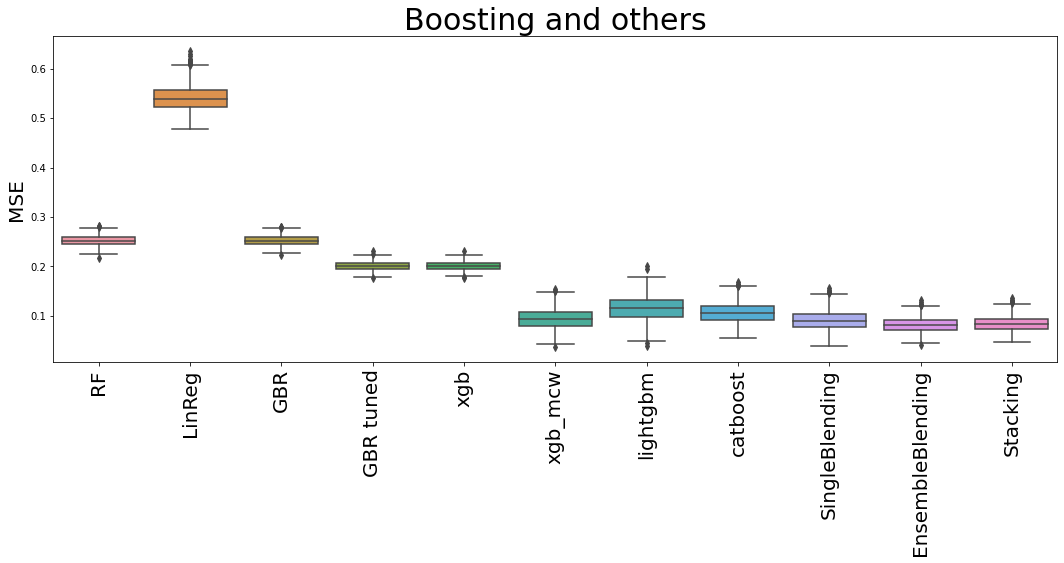

In [221]:
plt.figure(figsize=(18,6))
ax = sns.boxplot(data=pd.concat([tuned_boost, 
                                 xgb_add, 
                                 xgb_add2,
                                 lgb_add, 
                                 cat_add, 
                                 blend_data, 
                                 eblend_data,
                                 stack_data]) , y="mse", x="model")
plt.setp(ax.get_xticklabels(), rotation=90)
plt.xlabel("", size=20)
plt.ylabel("MSE", size=20)
plt.title("Boosting and others", size=30)
plt.xticks(size=20)
plt.show()

In [222]:
np.quantile(stack_data['mse'], 
            q=[0.025, 0.975])

array([0.0568845 , 0.11468349])

In [223]:
np.quantile(cat_add['mse'], 
            q=[0.025, 0.975])

array([0.07045187, 0.1474295 ])

Опять же, видим, что стэкинг на данной задаче не принес существенного улучшения

### Стэкинг vs блендинг<a class="anchor" style="autocontent" id="Стэкинг-vs-блендинг"/><br>
На самом деле, подходы часто объединяют в один или путают местами. Например, улучшая блендинг в сторону использования всей обучающей выборки можно получить стэкинг. И т.д. 

Оба подхода имеют множество модификаций, к примеру, с добавлением к признаков-предсказаний базовых моделей изначальных признаков и тд. 
Оба подзода показывают схожие результаты. И оба подхода улучшают свое качество по мере увеличения размера обучающей выборки. 




Пример того, как выглядит решающая граница для стэкинга и блендинга 

Задача — разделить синее и красное облако точек. На изображении выше показано, как разные алгоритмы справляются с этим — есть K-Nearest Neighbors, ridge регрессия и случайный лес с разной глубиной деревьев. 
Все три алгоритма как-то справляются, но лучшие результаты показывает K-Nearest Neighbors. Ridge регрессия работает не очень хорошо потому, что разделение не линейное. Случайный лес угадал тенденцию, но ему либо недостаточно данных, либо надо добавить ещё деревья, либо поменять настройки параметров.


Но если мы берем блендинг и стэкинг этих моделей, то оба этих подхода проводят  хорошую разделяющую границу (намного лучше, чем эти подходы по отдельности).

<img src ="http://edunet.kea.su/repo/src/L03_Classic_ML/img/L03_Classic_ML-86.png" width="400">


Известно, что нейронные сети хорошо работают с изображениями, зачастую поступают следующим образом: учат много разных нейросетей на изображениях, либо берут уже обученные архитектуры, затем делают с ними блендинг или стэкинг на какой-то отложенной выборке. Результаты получаются лучше, чем от использования одной только нейросети


# Нейронные сети пытаются в табличные данные<a class="anchor" style="autocontent" id="Нейронные-сети-пытаются-в-табличные-данные"/><br>

Есть попытки построить архитектуры нейронных сетей таким образом, чтобы они могли работать с табличными данными. 
Из недавних можно отметить архитектуру NODE от яндекса (https://arxiv.org/pdf/1909.06312.pdf) и TabNet от Гугл (https://arxiv.org/pdf/1908.07442.pdf, https://github.com/dreamquark-ai/tabnet). 
Вторая работа особенно удачна и уже активно используется в соревнованиях на Kaggle. Стоит отметить, что победы над древесными моделями не одержано. Но полученная модель иногда достигает их качества и обладает рядом интересных особенностей:

1. Как и любая другая нейросетевая архитектура - она дифференцируема. Можно вставить обученную нейросеть как часть другой и использовать transfer learning и прочее
2. Нейросеть автоматически выбирает признаки, потому feature importance можно получить без дополнительных ухищрений.
3. Ее можно обучать в semisupervised манере - сначала предобучить на неразмеченных данных, а потом уже использовать размеченные.

Установим пакет, реализующий эту нейросеть на pytorch

Так как это нейросеть, возможно вам захочется сначала поменять среду исполнения на среду с GPU (если поменять после установленные пакеты в Colab слетят)

In [224]:
!pip install pytorch-tabnet 

In [225]:
import sklearn
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from pytorch_tabnet.tab_model import  TabNetRegressor

In [226]:
calif_housing = sklearn.datasets.fetch_california_housing()
X = calif_housing.data
y = calif_housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_learn, X_valid, y_learn, y_valid = train_test_split(X_train, y_train, random_state=42)

Запустим с параметрами по-умолчанию, передав датасет для валидации - нам нужно узнать, когда нейросеть начнет переобучаться.

 Заметьте, что у xgboost и lightgbm тоже есть такая возможность (early_stopping), которая позволяет легко подбирать число базовых моделей. Подробнее - смотрите в документации

Нейросеть принимает y в формате (предсказываемая величина, число предсказываемых величин), потому нам потребуется reshape

In [227]:
tabnet = TabNetRegressor()
tabnet.fit(X_learn, y_learn.reshape(-1, 1),
           eval_set = [(X_valid,  y_valid.reshape(-1, 1))])

Device used : cuda
epoch 0  | loss: 3.67046 | val_0_mse: 255.99187|  0:00:00s
epoch 1  | loss: 0.89092 | val_0_mse: 1932.7213|  0:00:01s
epoch 2  | loss: 0.61004 | val_0_mse: 695.21611|  0:00:02s
epoch 3  | loss: 0.52337 | val_0_mse: 384.69949|  0:00:03s
epoch 4  | loss: 0.47835 | val_0_mse: 98.87313|  0:00:03s
epoch 5  | loss: 0.44826 | val_0_mse: 727.57244|  0:00:04s
epoch 6  | loss: 0.44169 | val_0_mse: 159.08188|  0:00:05s
epoch 7  | loss: 0.42192 | val_0_mse: 396.413 |  0:00:05s
epoch 8  | loss: 0.40843 | val_0_mse: 307.52239|  0:00:06s
epoch 9  | loss: 0.41064 | val_0_mse: 431.38403|  0:00:07s
epoch 10 | loss: 0.40562 | val_0_mse: 575.69151|  0:00:08s
epoch 11 | loss: 0.3912  | val_0_mse: 837.13702|  0:00:08s
epoch 12 | loss: 0.39313 | val_0_mse: 476.71085|  0:00:09s
epoch 13 | loss: 0.39626 | val_0_mse: 216.21123|  0:00:10s
epoch 14 | loss: 0.38491 | val_0_mse: 171.03774|  0:00:10s

Early stopping occurred at epoch 14 with best_epoch = 4 and best_val_0_mse = 98.87313
Best weight

Обучим теперь на всем тренировочном датасете, поставив число эпох обучения равным тому, что нам сообщила выдача функции

In [228]:
tabnet = TabNetRegressor()
tabnet.fit(X_train, y_train.reshape(-1, 1), max_epochs=53) 

Device used : cuda
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 3.25513 |  0:00:00s
epoch 1  | loss: 0.86888 |  0:00:01s
epoch 2  | loss: 0.60374 |  0:00:02s
epoch 3  | loss: 0.53069 |  0:00:03s
epoch 4  | loss: 0.49547 |  0:00:04s
epoch 5  | loss: 0.47602 |  0:00:05s
epoch 6  | loss: 0.4433  |  0:00:06s
epoch 7  | loss: 0.42025 |  0:00:06s
epoch 8  | loss: 0.41067 |  0:00:07s
epoch 9  | loss: 0.40289 |  0:00:08s
epoch 10 | loss: 0.39081 |  0:00:09s
epoch 11 | loss: 0.39849 |  0:00:10s
epoch 12 | loss: 0.38716 |  0:00:11s
epoch 13 | loss: 0.3991  |  0:00:11s
epoch 14 | loss: 0.39137 |  0:00:12s
epoch 15 | loss: 0.37435 |  0:00:13s
epoch 16 | loss: 0.3673  |  0:00:14s
epoch 17 | loss: 0.36321 |  0:00:15s
epoch 18 | loss: 0.3622  |  0:00:16s
epoch 19 | loss: 0.35695 |  0:00:17s
epoch 20 | loss: 0.35213 |  0:00:17s
epoch 21 | loss: 0.35175 |  0:00:18s
epoch 22 | loss: 0.34701 |  0:00:19s
epoch 23 | loss: 0.35599 |  0:00:20s
epoch 24 | loss: 0.3

In [229]:
y_pred = tabnet.predict(X_test)
print(mean_squared_error(y_true=y_test, y_pred=y_pred))

0.4448845178079719


Видим, что качество сильно хуже, чем у топ-моделей бустинга. Возможно, надо попробовать не параметры по-умолчанию нейросети, или нейронную сеть другой архитектуры! 

Однако пока создатели не предоставили точных рекомендаций по подбору этих параметров. Можете попробовать улучшить качество модели для интереса. 

По сообщениям участников Kaggle, модель все же чаще всего уступает хорошо затюненным бустингам(

# Ссылки на материалы для самостоятельного изучения<a class="anchor" style="autocontent" id="Ссылки-на-материалы-для-самостоятельного-изучения"/><br>

## Общие источники<a class="anchor" style="autocontent" id="Общие-источники"/><br>
[Про разделение на классическое и глубокое машинное обучение ](https://www.deeplearningbook.org/contents/intro.html) 

[Один из лучших учебников по классическому машинному обучению](https://web.stanford.edu/~hastie/ElemStatLearn/)

[Хорошая книга по машинному обучению](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646) - можно скачать через http://libgen.rs

## Про деревья решений<a class="anchor" style="autocontent" id="Про-деревья-решений"/><br>

[Деревья решений](https://www.kaggle.com/kashnitsky/topic-3-decision-trees-and-knn)


## Про ансамбли<a class="anchor" style="autocontent" id="Про-ансамбли"/><br>

[https://mlwave.com/kaggle-ensembling-guide/](https://mlwave.com/kaggle-ensembling-guide/)

[https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/](https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/)

[Цикл лекций по обучению ансамблей](https://medium.com/ml-research-lab/ensemble-learning-relation-with-bias-and-variance-431cdc0a3fc9)

[Про стэкинг и блендинг](https://dyakonov.org/2017/03/10/c%D1%82%D0%B5%D0%BA%D0%B8%D0%BD%D0%B3-stacking-%D0%B8-%D0%B1%D0%BB%D0%B5%D0%BD%D0%B4%D0%B8%D0%BD%D0%B3-blending/)


## XGBoost<a class="anchor" style="autocontent" id="XGBoost1"/><br>
[отличие XGBoost от обычного градиентного бустинга](https://stats.stackexchange.com/questions/202858/xgboost-loss-function-approximation-with-taylor-expansion)

[оригинальная статья](https://arxiv.org/pdf/1603.02754.pdf)

[как подбирать параметры xgboost](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/)


## CatBoost<a class="anchor" style="autocontent" id="CatBoost"/><br>

[Лекции по правильному использованию CatBoost](https://www.youtube.com/watch?v=OpQpYi_LtTQ&list=PLTCAIq2KPpjOZlYxURPsDoIJEPxHRRora)

[Официальная документация](https://catboost.ai/docs/concepts/parameter-tuning.html#rand-str)

## LightGBM<a class="anchor" style="autocontent" id="LightGBM1"/><br>

[Очень подробная и удобная документация](https://lightgbm.readthedocs.io/en/latest/ )


[Описание параметров](https://neptune.ai/blog/lightgbm-parameters-guide?utm_source=datacamp&utm_medium=post&utm_campaign=blog-lightgbm-parameters-guide&utm_campaign=News&utm_medium=Community&utm_source=DataCamp.com)

[Новый бустинг с деревьями, содержащими в листах линейные регрессии](https://arxiv.org/pdf/1802.05640.pdf)

## Дисбаланс классов<a class="anchor" style="autocontent" id="Дисбаланс-классоов"/><br>
[Обучение в случае дисбаланса классов](http://www.svds.com/learning-imbalanced-classes/)

[Bagging и случайные леса для обучения с имбалансом классов](https://machinelearningmastery.com/bagging-and-random-forest-for-imbalanced-classification/)

[Коэффициент корреляции Мэтьюса](https://bmcgenomics.biomedcentral.com/articles/10.1186/s12864-019-6413-7)

## Нейронные сети и бустинг<a class="anchor" style="autocontent" id="Нейронные-сети-и-бустинг"/><br>
[TabNet](https://arxiv.org/pdf/1908.07442.pdf)

[TabNet, реализация на pytorch](https://github.com/dreamquark-ai/tabnet)

[NODE](https://arxiv.org/pdf/1909.06312.pdf)
